<a href="https://colab.research.google.com/github/Swayamprakashpatel/IR_Tablet/blob/main/IR_Tablet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Assuming you have the dataset in a CSV file named 'data.csv'
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.',], axis = 1)


In [8]:


# Splitting the dataset into features (X) and targets (y)
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2]
X2 = X.iloc[:, 2:8].apply(pd.to_numeric, errors='coerce') / 100
X3 = X.iloc[:,8:9].apply(pd.to_numeric, errors='coerce') / 1000

y1 = df.iloc[:, -3].apply(pd.to_numeric, errors='coerce') / 100  # Output column 1 = Hardness(kg/cm2)
y2 = df.iloc[:, -2].apply(pd.to_numeric, errors='coerce') / 100  # Output column 2 = % Friability
y3 = df.iloc[:, -1].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disin. Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2,X3], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X_encoded, y1, y2, y3, test_size=0.4, random_state=42)

# Linear Regression for y1
linear_reg_y1 = LinearRegression()
linear_reg_y1.fit(X_train, y1_train)
y1_pred_linear = linear_reg_y1.predict(X_test)
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)

# Linear Regression for y2
linear_reg_y2 = LinearRegression()
linear_reg_y2.fit(X_train, y2_train)
y2_pred_linear = linear_reg_y2.predict(X_test)
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)

# Linear Regression for y3
linear_reg_y3 = LinearRegression()
linear_reg_y3.fit(X_train, y3_train)
y3_pred_linear = linear_reg_y3.predict(X_test)
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)

# Support Vector Machine (SVM) for y1
svm_y1 = SVR()
svm_y1.fit(X_train, y1_train)
y1_pred_svm = svm_y1.predict(X_test)
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)

# Support Vector Machine (SVM) for y2
svm_y2 = SVR()
svm_y2.fit(X_train, y2_train)
y2_pred_svm = svm_y2.predict(X_test)
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)

# Support Vector Machine (SVM) for y3
svm_y3 = SVR()
svm_y3.fit(X_train, y3_train)
y3_pred_svm = svm_y3.predict(X_test)
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)

# k-Nearest Neighbors (k-NN) for y1
knn_y1 = KNeighborsRegressor()
knn_y1.fit(X_train, y1_train)
y1_pred_knn = knn_y1.predict(X_test)
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)

# k-Nearest Neighbors (k-NN) for y2
knn_y2 = KNeighborsRegressor()
knn_y2.fit(X_train, y2_train)
y2_pred_knn = knn_y2.predict(X_test)
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)

# k-Nearest Neighbors (k-NN) for y3
knn_y3 = KNeighborsRegressor()
knn_y3.fit(X_train, y3_train)
y3_pred_knn = knn_y3.predict(X_test)
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)

# Artificial Neural Network (ANN) for y1
filepath_y1 = '/content/drive/My Drive/y1.hdf5'
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath_y1, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 1),
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=369, verbose =1)]

ann_y1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
                             tf.keras.layers.Dense(369, activation='relu'),
                             tf.keras.layers.Dense(369, activation='relu'),
                             tf.keras.layers.Dense(1, activation ='relu')])

ann_y1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = ann_y1.fit(X_train, y1_train, epochs= 10, callbacks=[checkpoint],validation_data=(X_test, y1_test), batch_size= None)
y1_pred_ann = ann_y1.predict(X_test)

# Artificial Neural Network (ANN) for y2
filepath_y2 = '/content/drive/My Drive/y2.hdf5'
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath_y2, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 1),
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=369, verbose =1)]

ann_y2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
                             tf.keras.layers.Dense(369, activation='relu'),
                             tf.keras.layers.Dense(369, activation='relu'),
                             tf.keras.layers.Dense(1, activation ='relu')])

ann_y2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = ann_y2.fit(X_train, y2_train, epochs= 10, callbacks=[checkpoint],validation_data=(X_test, y2_test), batch_size= None)
y2_pred_ann = ann_y2.predict(X_test)

# Artificial Neural Network (ANN) for y3
filepath_y3 = '/content/drive/My Drive/y3.hdf5'
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath_y3, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 1),
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=369, verbose =1)]

ann_y3 = tf.keras.Sequential([
                             tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
                             tf.keras.layers.Dense(369, activation='relu'),
                             tf.keras.layers.Dense(369, activation='relu'),
                            # tf.keras.layers.Dense(65, activation='relu'),
                             tf.keras.layers.Dense(1, activation ='tanh')])

ann_y3.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.1), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = ann_y3.fit(X_train, y3_train, epochs= 10000, callbacks=[checkpoint],validation_data=(X_test, y3_test), batch_size= None)
y3_pred_ann = ann_y3.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
15/17 [=========================>....] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0441
Epoch 1: val_root_mean_squared_error improved from inf to 0.03661, saving model to /content/drive/My Drive/y1.hdf5
17/17 [==============================] - 1s 34ms/step - loss: 0.0019 - root_mean_squared_error: 0.0433 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0366
Epoch 2/10
10/17 [================>.............] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0343

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_root_mean_squared_error improved from 0.03661 to 0.03500, saving model to /content/drive/My Drive/y1.hdf5
17/17 [==============================] - 0s 14ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0350
Epoch 3/10
10/17 [================>.............] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0352
Epoch 3: val_root_mean_squared_error improved from 0.03500 to 0.03331, saving model to /content/drive/My Drive/y1.hdf5
17/17 [==============================] - 0s 15ms/step - loss: 0.0012 - root_mean_squared_error: 0.0347 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 4/10
13/17 [=====================>........] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0347
Epoch 4: val_root_mean_squared_error did not improve from 0.03331
17/17 [==============================] - 0s 15ms/step - loss: 0.0012 - root_mean_squared_error: 0.0341 - val_loss: 0.0011 - val_root_mean_squared_error: 0.03

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/17 [==================>...........] - ETA: 0s - loss: 2.3146e-04 - root_mean_squared_error: 0.0152
Epoch 3: val_root_mean_squared_error improved from 0.01649 to 0.01626, saving model to /content/drive/My Drive/y2.hdf5
17/17 [==============================] - 0s 9ms/step - loss: 2.1648e-04 - root_mean_squared_error: 0.0147 - val_loss: 2.6440e-04 - val_root_mean_squared_error: 0.0163
Epoch 4/10
14/17 [=======================>......] - ETA: 0s - loss: 2.0821e-04 - root_mean_squared_error: 0.0144
Epoch 4: val_root_mean_squared_error improved from 0.01626 to 0.01596, saving model to /content/drive/My Drive/y2.hdf5
17/17 [==============================] - 0s 8ms/step - loss: 2.0855e-04 - root_mean_squared_error: 0.0144 - val_loss: 2.5456e-04 - val_root_mean_squared_error: 0.0160
Epoch 5/10
11/17 [==================>...........] - ETA: 0s - loss: 1.9128e-04 - root_mean_squared_error: 0.0138
Epoch 5: val_root_mean_squared_error improved from 0.01596 to 0.01578, saving model to /content/driv

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Streaming output truncated to the last 5000 lines.
17/17 [==============================] - 0s 21ms/step - loss: 9.6271e-04 - root_mean_squared_error: 0.0310 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0340
Epoch 1508/10000
17/17 [==============================] - ETA: 0s - loss: 9.5622e-04 - root_mean_squared_error: 0.0309
Epoch 1508: val_root_mean_squared_error did not improve from 0.03316
17/17 [==============================] - 0s 21ms/step - loss: 9.5622e-04 - root_mean_squared_error: 0.0309 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0341
Epoch 1509/10000
14/17 [=======================>......] - ETA: 0s - loss: 9.1360e-04 - root_mean_squared_error: 0.0302
Epoch 1509: val_root_mean_squared_error did not improve from 0.03316
17/17 [==============================] - 0s 25ms/step - loss: 8.8663e-04 - root_mean_squared_error: 0.0298 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0358
Epoch 1510/10000
14/17 [=======================>......] - ETA: 0s - loss: 8.7472e

In [ ]:
print(X_encoded)
print(y3)

     Binder Type_PS630  Binder Type_PVP  Binder Type_SDL  \
0                  0.0              1.0              0.0   
1                  0.0              1.0              0.0   
2                  0.0              1.0              0.0   
3                  0.0              1.0              0.0   
4                  0.0              1.0              0.0   
..                 ...              ...              ...   
859                0.0              0.0              0.0   
860                0.0              0.0              0.0   
861                0.0              0.0              0.0   
862                0.0              0.0              0.0   
863                0.0              0.0              0.0   

     Disintegration Type_CP  Disintegration Type_S1500  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                    

Linear Regression MSE for y1: 0.00039741541067427787
Linear Regression MSE for y2: 6.672579279359607e-05
Linear Regression MSE for y3: 0.0019562261842522638
SVM MSE for y1: 0.0012757225433526016
SVM MSE for y2: 0.0006555003034682083
SVM MSE for y3: 0.0038759416942022195
k-NN MSE for y1: 0.0010604236300578035
k-NN MSE for y2: 0.00010147512485549133
k-NN MSE for y3: 0.003163782543352601
ANN MSE for y1: 0.001595791796478215
ANN MSE for y2: 0.0002358054733124505
ANN MSE for y3: 0.0010991863570885025


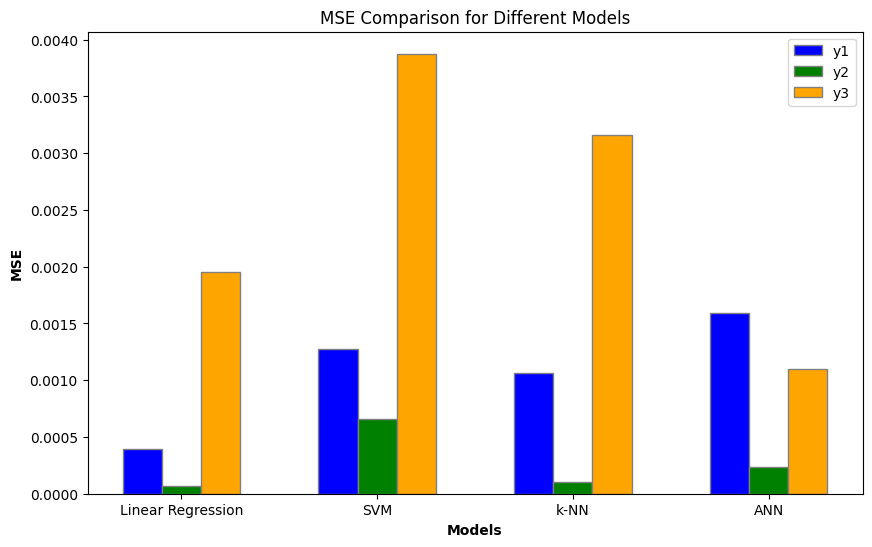

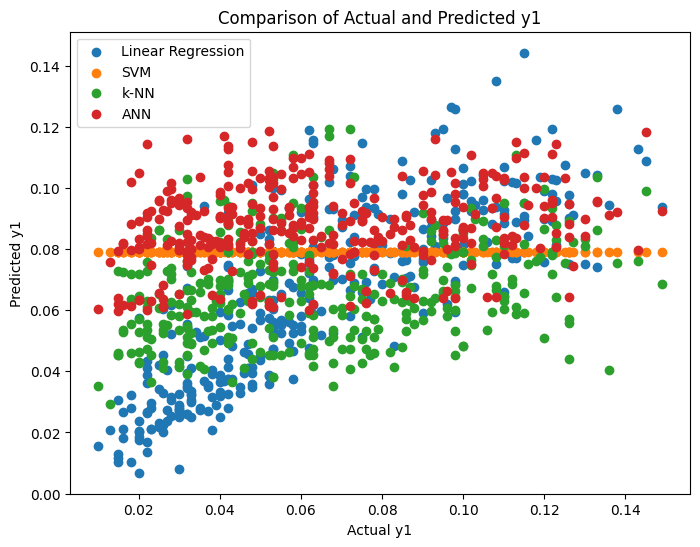

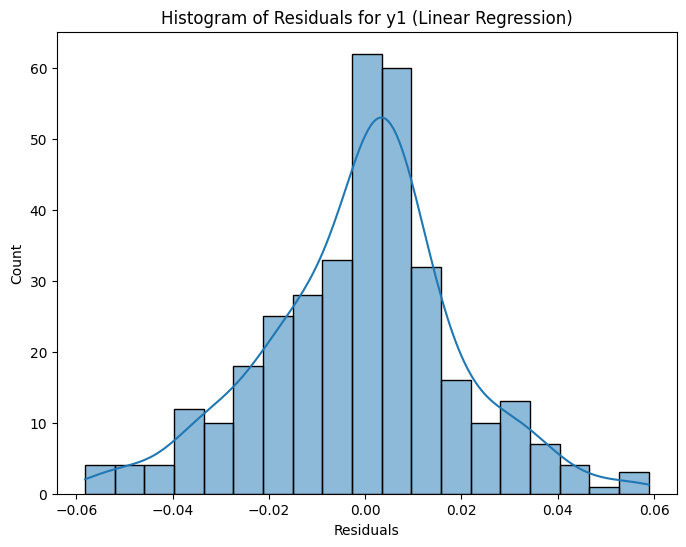

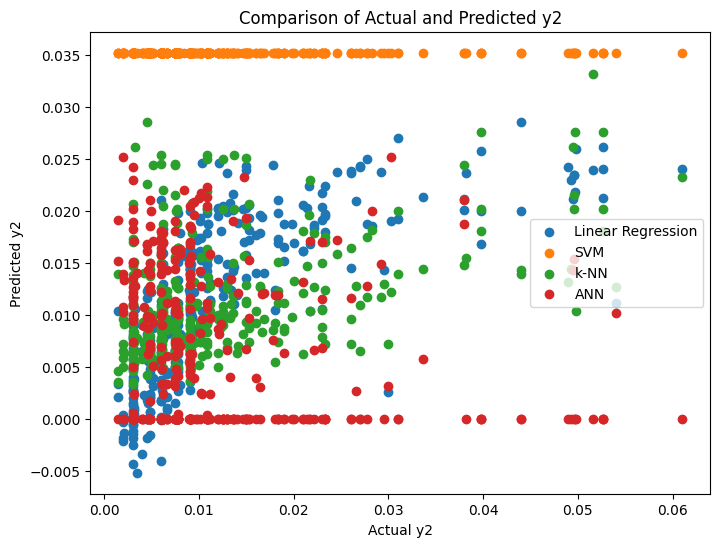

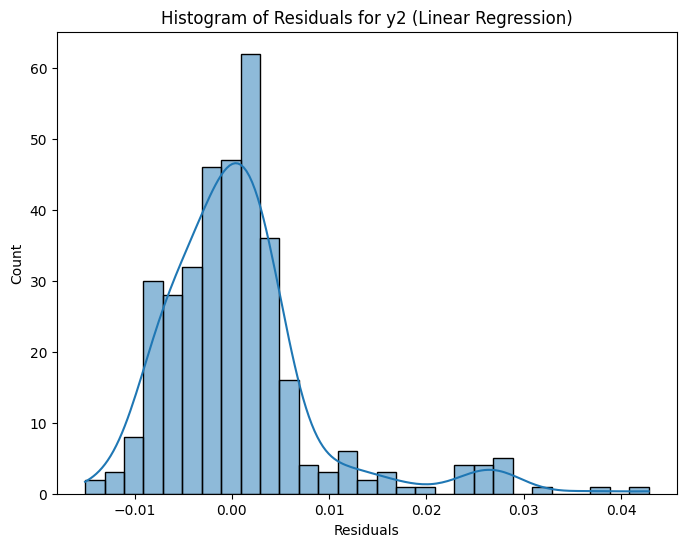

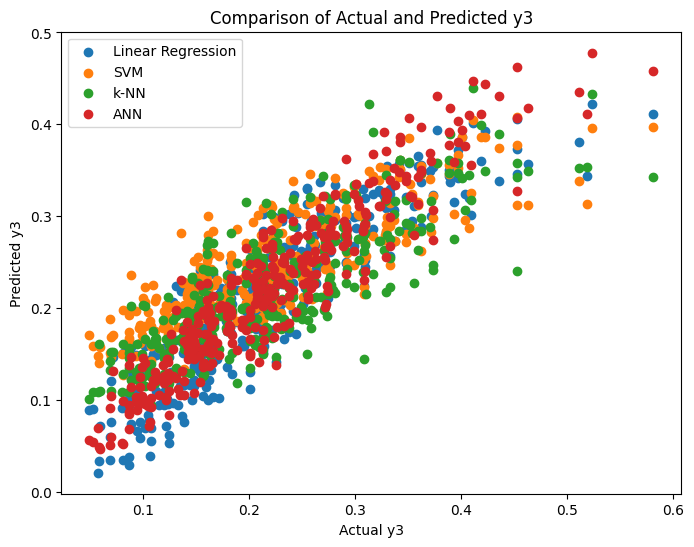

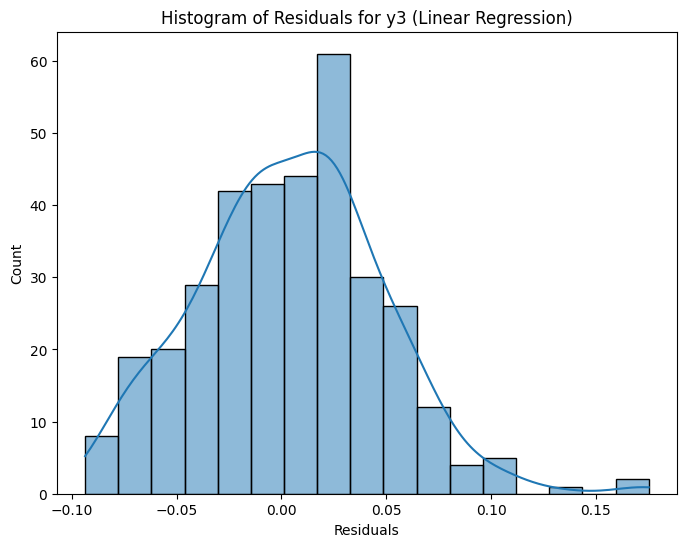

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate Linear Regression model for y1
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)
print("Linear Regression MSE for y1:", linear_mse_y1)

# Evaluate Linear Regression model for y2
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)
print("Linear Regression MSE for y2:", linear_mse_y2)

# Evaluate Linear Regression model for y3
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)
print("Linear Regression MSE for y3:", linear_mse_y3)

# Evaluate Support Vector Machine (SVM) model for y1
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)
print("SVM MSE for y1:", svm_mse_y1)

# Evaluate Support Vector Machine (SVM) model for y2
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)
print("SVM MSE for y2:", svm_mse_y2)

# Evaluate Support Vector Machine (SVM) model for y3
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)
print("SVM MSE for y3:", svm_mse_y3)

# Evaluate k-Nearest Neighbors (k-NN) model for y1
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)
print("k-NN MSE for y1:", knn_mse_y1)

# Evaluate k-Nearest Neighbors (k-NN) model for y2
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)
print("k-NN MSE for y2:", knn_mse_y2)

# Evaluate k-Nearest Neighbors (k-NN) model for y3
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)
print("k-NN MSE for y3:", knn_mse_y3)

# Evaluate Artificial Neural Network (ANN) model for y1
ann_mse_y1 = mean_squared_error(y1_test, y1_pred_ann)
print("ANN MSE for y1:", ann_mse_y1)

# Evaluate Artificial Neural Network (ANN) model for y2
ann_mse_y2 = mean_squared_error(y2_test, y2_pred_ann)
print("ANN MSE for y2:", ann_mse_y2)

# Evaluate Artificial Neural Network (ANN) model for y3
ann_mse_y3 = mean_squared_error(y3_test, y3_pred_ann)
print("ANN MSE for y3:", ann_mse_y3)

# Create a bar plot of MSE values for each model
models = ['Linear Regression', 'SVM', 'k-NN', 'ANN']
mse_values_y1 = [linear_mse_y1, svm_mse_y1, knn_mse_y1, ann_mse_y1]
mse_values_y2 = [linear_mse_y2, svm_mse_y2, knn_mse_y2, ann_mse_y2]
mse_values_y3 = [linear_mse_y3, svm_mse_y3, knn_mse_y3, ann_mse_y3]

# Set width of bar
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create grouped bar plot for MSE values for each model for y1, y2, and y3
plt.figure(figsize=(10, 6))
plt.bar(r1, mse_values_y1, color='b', width=bar_width, edgecolor='grey', label='y1')
plt.bar(r2, mse_values_y2, color='g', width=bar_width, edgecolor='grey', label='y2')
plt.bar(r3, mse_values_y3, color='orange', width=bar_width, edgecolor='grey', label='y3')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add ylabel
plt.ylabel('MSE', fontweight='bold')

# Add title
plt.title('MSE Comparison for Different Models')
plt.legend()
plt.show()


#plt.figure(figsize=(10, 6))
#plt.bar(models, mse_values_y1, label='y1')
#plt.bar(models, mse_values_y2, label='y2')
#plt.bar(models, mse_values_y3, label='y3')
#plt.xlabel('Models')
#plt.ylabel('MSE')
#plt.title('MSE Comparison for Different Models')
#plt.legend()
#plt.show()

# Create a scatter plot to compare predicted and actual values for y1
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y1_pred_linear, label='Linear Regression')
plt.scatter(y1_test, y1_pred_svm, label='SVM')
plt.scatter(y1_test, y1_pred_knn, label='k-NN')
plt.scatter(y1_test, y1_pred_ann, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.show()

# Create a histogram of residuals for y1
residuals_y1 = y1_test - y1_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y1, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y1 (Linear Regression)')
plt.show()

# Create a scatter plot to compare predicted and actual values for y2
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y2_pred_linear, label='Linear Regression')
plt.scatter(y2_test, y2_pred_svm, label='SVM')
plt.scatter(y2_test, y2_pred_knn, label='k-NN')
plt.scatter(y2_test, y2_pred_ann, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.show()

# Create a histogram of residuals for y2
residuals_y2 = y2_test - y2_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y2, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y2 (Linear Regression)')
plt.show()

# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3_test, y3_pred_linear, label='Linear Regression')
plt.scatter(y3_test, y3_pred_svm, label='SVM')
plt.scatter(y3_test, y3_pred_knn, label='k-NN')
plt.scatter(y3_test, y3_pred_ann, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.show()

# Create a histogram of residuals for y3
residuals_y3 = y3_test - y3_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y3, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y3 (Linear Regression)')
plt.show()



27/27 [==============================] - 0s 2ms/step


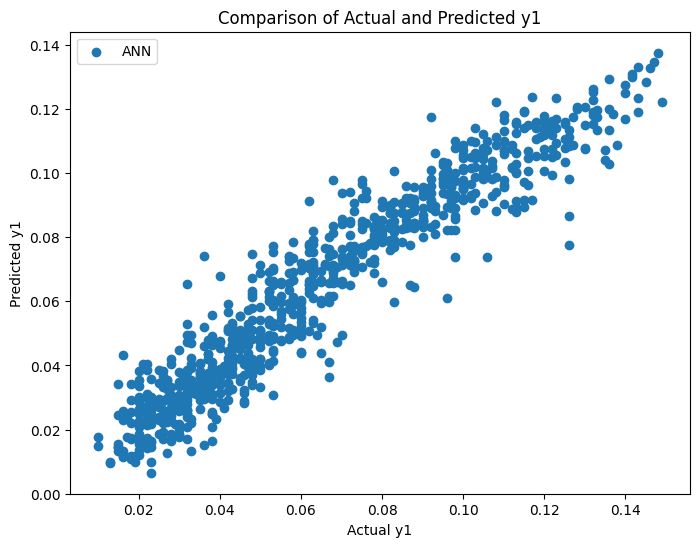

27/27 [==============================] - 0s 2ms/step


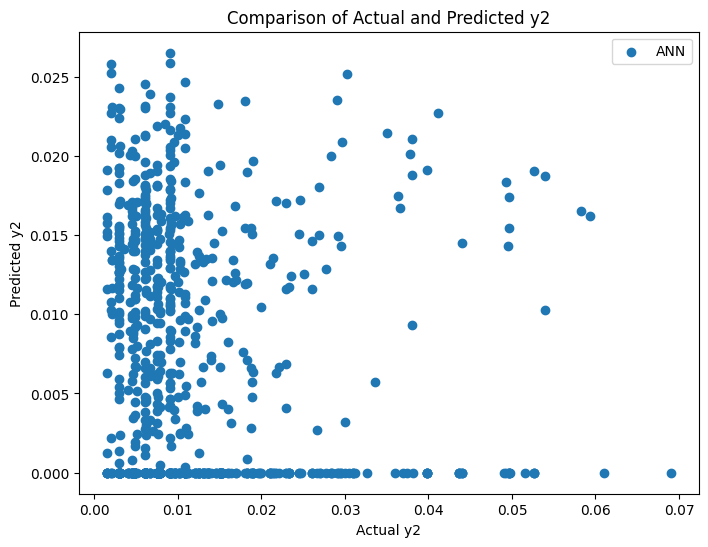

27/27 [==============================] - 0s 2ms/step


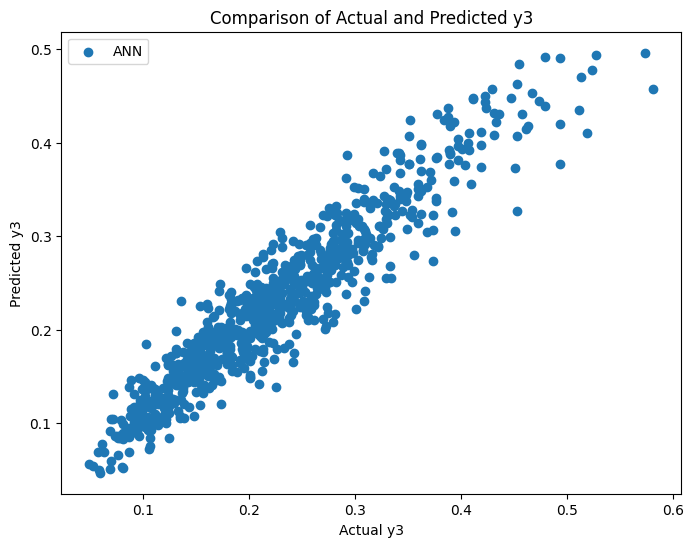

In [26]:
y1_pred_ann_all = ann_y1.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y1, y1_pred_ann_all, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.show()


y2_pred_ann_all = ann_y2.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y2, y2_pred_ann_all, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.show()

y3_pred_ann_all = ann_y3.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3, y3_pred_ann_all, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import r2_score

r2_y1_ann_all = r2_score(y1, y1_pred_ann_all)
r2_y2_ann_all = r2_score(y2, y2_pred_ann_all)
r2_y3_ann_all = r2_score(y3, y3_pred_ann_all)
print('R_Square_y1 =', r2_y1_ann_all)
print('R_Square_y2 =', r2_y2_ann_all)
print('R_Square_y3 =', r2_y3_ann_all)

R_Square_y1 = -0.377650913659616
R_Square_y2 = -0.7896314078361317
R_Square_y3 = 0.895292572817902


In [25]:
# Calculate R-squared value for each model and output variable
r2_y1_linear = linear_reg_y1.score(X_test, y1_test)
r2_y2_linear = linear_reg_y2.score(X_test, y2_test)
r2_y3_linear = linear_reg_y3.score(X_test, y3_test)

r2_y1_svm = svm_y1.score(X_test, y1_test)
r2_y2_svm = svm_y2.score(X_test, y2_test)
r2_y3_svm = svm_y3.score(X_test, y3_test)

r2_y1_knn = knn_y1.score(X_test, y1_test)
r2_y2_knn = knn_y2.score(X_test, y2_test)
r2_y3_knn = knn_y3.score(X_test, y3_test)

r2_y1_ann = ann_y1.evaluate(X_test, y1_test)
r2_y1_ann = ann_y2.evaluate(X_test, y2_test)
r2_y3_ann = ann_y3.evaluate(X_test, y3_test)
# Predict using the trained ANN model
y1_pred_ann = ann_y1.predict(X_test)
y2_pred_ann = ann_y2.predict(X_test)
y3_pred_ann = ann_y3.predict(X_test)

# Calculate R-squared value for y1,y2 and y3
from sklearn.metrics import r2_score
r2_y1_ann = r2_score(y1_test, y1_pred_ann)
r2_y2_ann = r2_score(y2_test, y2_pred_ann)
r2_y3_ann = r2_score(y3_test, y3_pred_ann)


# Calculate residuals for each model and output variable
residuals_y1_linear = y1_test - y1_pred_linear
residuals_y2_linear = y2_test - y2_pred_linear
residuals_y3_linear = y3_test - y3_pred_linear

residuals_y1_svm = y1_test - y1_pred_svm
residuals_y2_svm = y2_test - y2_pred_svm
residuals_y3_svm = y3_test - y3_pred_svm

residuals_y1_knn = y1_test - y1_pred_knn
residuals_y2_knn = y2_test - y2_pred_knn
residuals_y3_knn = y3_test - y3_pred_knn


y1_test_1d = y1_test.ravel()
y1_pred_ann_1d = y1_pred_ann.ravel()
residuals_y1_ann = y1_test_1d - y1_pred_ann_1d

y2_test_1d = y2_test.ravel()
y2_pred_ann_1d = y2_pred_ann.ravel()
residuals_y2_ann = y2_test_1d - y2_pred_ann_1d

y3_test_1d = y3_test.ravel()
y3_pred_ann_1d = y3_pred_ann.ravel()
residuals_y3_ann = y3_test_1d - y3_pred_ann_1d

# Print the mean of residuals for y1
mean_residuals_y1_ann = np.mean(residuals_y1_ann)



# Store the evaluation metrics in a DataFrame
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'SVM', 'k-NN', 'ANN'],
    'MSE y1': [linear_mse_y1, svm_mse_y1, knn_mse_y1, ann_mse_y1],
    'MSE y2': [linear_mse_y2, svm_mse_y2, knn_mse_y2, ann_mse_y2],
    'MSE y3': [linear_mse_y3, svm_mse_y3, knn_mse_y3, ann_mse_y3],
    'R^2 y1': [r2_y1_linear, r2_y1_svm, r2_y1_knn, r2_y1_ann],
    'R^2 y2': [r2_y2_linear, r2_y2_svm, r2_y2_knn, r2_y2_ann],
    'R^2 y3': [r2_y3_linear, r2_y3_svm, r2_y3_knn, r2_y3_ann],
    'Residuals y1': [np.mean(residuals_y1_linear), np.mean(residuals_y1_svm),
                     np.mean(residuals_y1_knn), np.mean(residuals_y1_ann)],
    'Residuals y2': [np.mean(residuals_y2_linear), np.mean(residuals_y2_svm),
                     np.mean(residuals_y2_knn), np.mean(residuals_y2_ann)],
    'Residuals y3': [np.mean(residuals_y3_linear), np.mean(residuals_y3_svm),
                     np.mean(residuals_y3_knn), np.mean(residuals_y3_ann)]
})

# Print the evaluation metrics
print("Evaluation Metrics:")
print(metrics)

#SEE RESULTS IN TABLE FORM

import numpy as np
import pandas as pd

# Calculate R-squared value for y1,y2 and y3
from sklearn.metrics import r2_score
r2_y1_ann = r2_score(y1_test, y1_pred_ann)
r2_y2_ann = r2_score(y2_test, y2_pred_ann)
r2_y3_ann = r2_score(y3_test, y3_pred_ann)

# Print the mean of residuals for y1
mean_residuals_y1_ann = np.mean(residuals_y1_ann)

# Create a DataFrame to store the evaluation metrics
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'SVM', 'k-NN', 'ANN'],
    'MSE y1': [linear_mse_y1, svm_mse_y1, knn_mse_y1, ann_mse_y1],
    'MSE y2': [linear_mse_y2, svm_mse_y2, knn_mse_y2, ann_mse_y2],
    'MSE y3': [linear_mse_y3, svm_mse_y3, knn_mse_y3, ann_mse_y3],
    'R^2 y1': [r2_y1_linear, r2_y1_svm, r2_y1_knn, r2_y1_ann],
    'R^2 y2': [r2_y2_linear, r2_y2_svm, r2_y2_knn, r2_y2_ann],
    'R^2 y3': [r2_y3_linear, r2_y3_svm, r2_y3_knn, r2_y3_ann],
    'Mean Residuals y1': [np.mean(residuals_y1_linear), np.mean(residuals_y1_svm),
                          np.mean(residuals_y1_knn), mean_residuals_y1_ann],
    'Mean Residuals y2': [np.mean(residuals_y2_linear), np.mean(residuals_y2_svm),
                          np.mean(residuals_y2_knn), np.mean(residuals_y2_ann)],
    'Mean Residuals y3': [np.mean(residuals_y3_linear), np.mean(residuals_y3_svm),
                          np.mean(residuals_y3_knn), np.mean(residuals_y3_ann)]
})

# Print the evaluation metrics
print("Evaluation Metrics:")
display(metrics)



11/11 [==============================] - 0s 2ms/step
Evaluation Metrics:
               Model    MSE y1    MSE y2    MSE y3    R^2 y1    R^2 y2  \
0  Linear Regression  0.000397  0.000067  0.001956  0.627093  0.461243   
1                SVM  0.001276  0.000656  0.003876 -0.197048 -4.292638   
2               k-NN  0.001060  0.000101  0.003164  0.004973  0.180670   
3                ANN  0.001596  0.000236  0.001099  0.861011 -0.903940   

     R^2 y3  Residuals y1  Residuals y2  Residuals y3  
0  0.784934     -0.000789      0.000741      0.004124  
1  0.573882     -0.014491     -0.023058     -0.025875  
2  0.652176     -0.002021      0.001005     -0.000271  
3  0.879156      0.000919      0.005592     -0.001272  
Evaluation Metrics:


Model    MSE y1    MSE y2    MSE y3    R^2 y1    R^2 y2  \
0  Linear Regression  0.000397  0.000067  0.001956  0.627093  0.461243   
1                SVM  0.001276  0.000656  0.003876 -0.197048 -4.292638   
2               k-NN  0.001060  0.000101  0.003164  0.004973  0.180670   
3                ANN  0.001596  0.000236  0.001099  0.861011 -0.903940   

     R^2 y3  Mean Residuals y1  Mean Residuals y2  Mean Residuals y3  
0  0.784934          -0.000789           0.000741           0.004124  
1  0.573882          -0.014491          -0.023058          -0.025875  
2  0.652176          -0.002021           0.001005          -0.000271  
3  0.879156           0.000919           0.005592          -0.001272

**FIND IMPORTANCE OF INDEPENDENT FACTORS**

In [ ]:
# Feature importances for y1
y1_feature_importances = np.abs(linear_reg_y1.coef_)
y1_feature_names = X_encoded.columns
y1_feature_importance_df = pd.DataFrame({'Feature': y1_feature_names, 'Importance': y1_feature_importances})
y1_feature_importance_df = y1_feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importances for y2
y2_feature_importances = np.abs(linear_reg_y2.coef_)
y2_feature_names = X_encoded.columns
y2_feature_importance_df = pd.DataFrame({'Feature': y2_feature_names, 'Importance': y2_feature_importances})
y2_feature_importance_df = y2_feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importances for y3
y3_feature_importances = np.abs(linear_reg_y3.coef_)
y3_feature_names = X_encoded.columns
y3_feature_importance_df = pd.DataFrame({'Feature': y3_feature_names, 'Importance': y3_feature_importances})
y3_feature_importance_df = y3_feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances for y1, y2, and y3
print("Feature Importances for y1:")
print(y1_feature_importance_df)
print("\nFeature Importances for y2:")
print(y2_feature_importance_df)
print("\nFeature Importances for y3:")
print(y3_feature_importance_df)


Feature Importances for y1:
                      Feature  Importance
11    Compressional Force(kN)    1.754829
10             Punch Size(mm)    1.335844
9                       A_MCC    0.355142
7            Binder Amount(%)    0.176444
12          Tablet Weight(mg)    0.081667
8                         A_M    0.044919
6      Disintegrant Amount(%)    0.018302
0           Binder Type_PS630    0.011707
5     Disintegration Type_SSG    0.010753
3      Disintegration Type_CP    0.010099
1             Binder Type_PVP    0.008576
2             Binder Type_SDL    0.001620
4   Disintegration Type_S1500    0.000345

Feature Importances for y2:
                      Feature  Importance
10             Punch Size(mm)    0.425536
11    Compressional Force(kN)    0.410421
7            Binder Amount(%)    0.340294
8                         A_M    0.267999
6      Disintegrant Amount(%)    0.251075
9                       A_MCC    0.243861
5     Disintegration Type_SSG    0.003485
3      Disintegrati

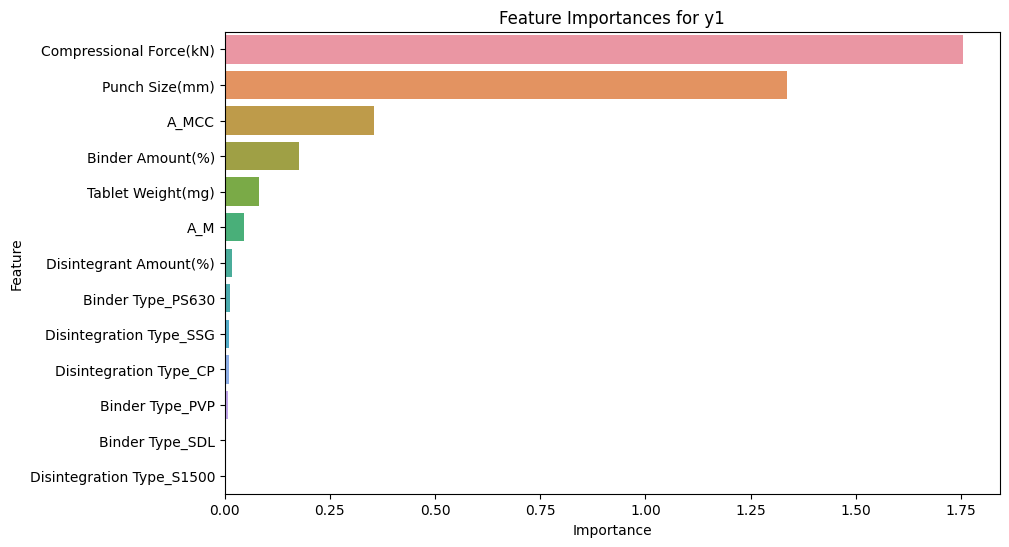

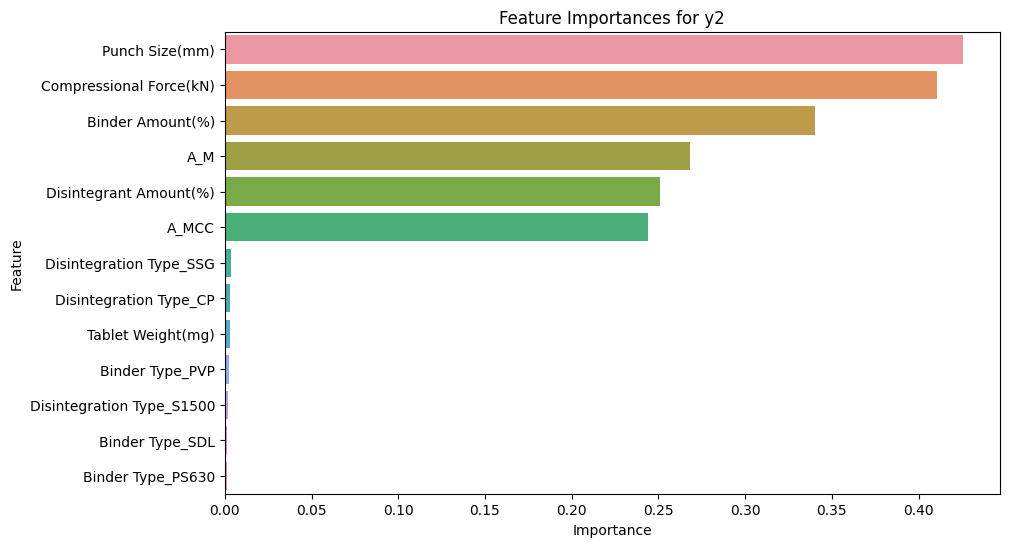

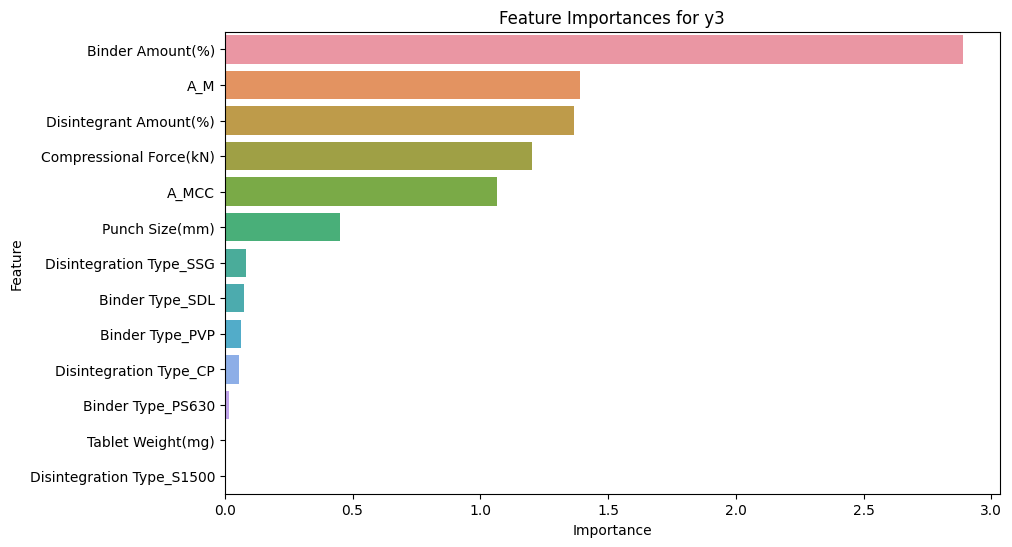

In [ ]:
# Import necessary libraries for visualization
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the feature importances for y1
sns.barplot(x='Importance', y='Feature', data=y1_feature_importance_df)
plt.title('Feature Importances for y1')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the feature importances for y2
sns.barplot(x='Importance', y='Feature', data=y2_feature_importance_df)
plt.title('Feature Importances for y2')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the feature importances for y3
sns.barplot(x='Importance', y='Feature', data=y3_feature_importance_df)
plt.title('Feature Importances for y3')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Feature Importances for y1:


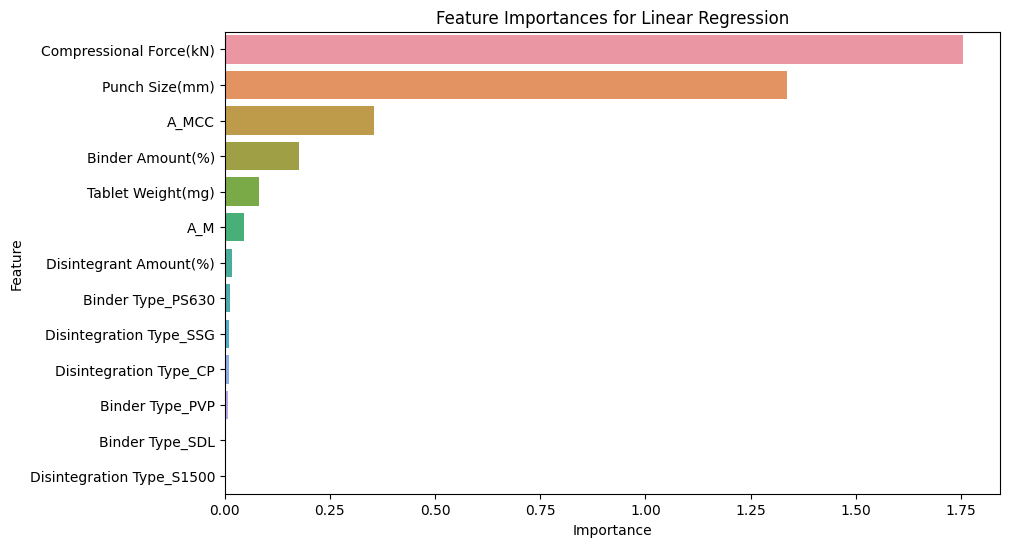

Feature importances are not available for Support Vector Machine.
Feature importances are not available for k-Nearest Neighbors.
Feature importances are not available for Artificial Neural Network.
Feature Importances for y2:


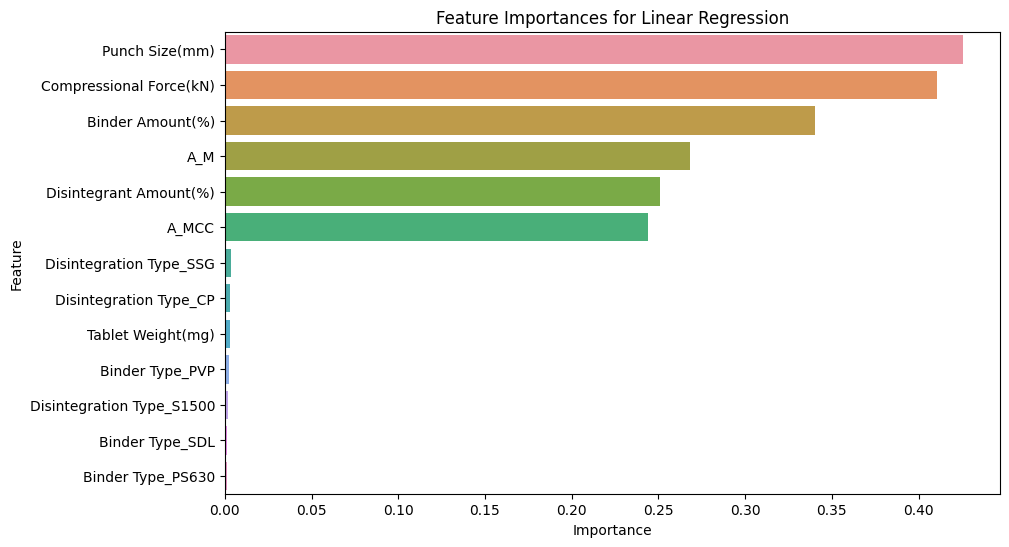

Feature importances are not available for Support Vector Machine.
Feature importances are not available for k-Nearest Neighbors.
Feature importances are not available for Artificial Neural Network.
Feature Importances for y3:


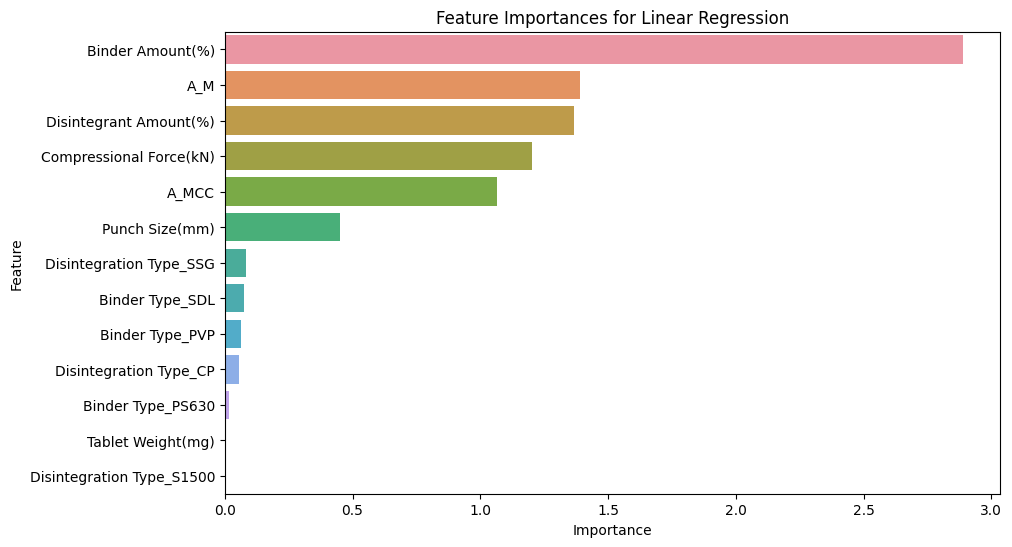

Feature importances are not available for Support Vector Machine.
Feature importances are not available for k-Nearest Neighbors.
Feature importances are not available for Artificial Neural Network.


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# ... (previous code to load and preprocess the data)

# Function to calculate and visualize feature importances
def calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate feature importances for Linear Regression model
    if isinstance(model, LinearRegression):
        feature_importances = np.abs(model.coef_)
    # Calculate feature importances for SVM, k-NN, and ANN models
    else:
        feature_importances = None

    if feature_importances is not None:
        feature_names = X_train.columns
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        # Visualization of feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title(f'Feature Importances for {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    else:
        print(f"Feature importances are not available for {model_name}.")

# Models for y1, y2, and y3
models_y1 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y2 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y3 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

model_names = ['Linear Regression', 'Support Vector Machine', 'k-Nearest Neighbors', 'Artificial Neural Network']

# Loop through all models and visualize feature importances for y1
print("Feature Importances for y1:")
for model, model_name in zip(models_y1, model_names):
    calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y1_train, y1_test)

# Loop through all models and visualize feature importances for y2
print("Feature Importances for y2:")
for model, model_name in zip(models_y2, model_names):
    calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y2_train, y2_test)

# Loop through all models and visualize feature importances for y3
print("Feature Importances for y3:")
for model, model_name in zip(models_y3, model_names):
    calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y3_train, y3_test)


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import shap

# ... (previous code to load and preprocess the data)

# Function to calculate and visualize feature importances
def calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate feature importances for Linear Regression model
    if isinstance(model, LinearRegression):
        feature_importances = np.abs(model.coef_)
        feature_names = X_train.columns
    # Calculate feature importances for SVM and k-NN using permutation feature importance
    elif isinstance(model, (SVR, KNeighborsRegressor)):
        feature_importances = permutation_feature_importance(model, X_test, y_test, mean_squared_error)
        feature_names = X_train.columns
    # Calculate feature importances for ANN using SHAP values
    else:
        explainer = shap.DeepExplainer(model, X_train)
        shap_values = explainer.shap_values(X_test)
        feature_importances = np.abs(shap_values).mean(axis=0)
        feature_names = X_train.columns

    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Visualization of feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Feature Importances for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Function to calculate permutation feature importance
def permutation_feature_importance(model, X, y, metric):
    baseline = metric(y, model.predict(X))
    imp = []
    for col in X.columns:
        save = X[col].copy()
        X[col] = np.random.permutation(X[col])
        m = metric(y, model.predict(X))
        X[col] = save
        imp.append(baseline - m)
    return np.array(imp)

# Splitting the dataset into features (X) and targets (y)
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2]
X2 = X.iloc[:, 2:8].apply(pd.to_numeric, errors='coerce') / 100
X3 = X.iloc[:,8:9].apply(pd.to_numeric, errors='coerce') / 1000

y1 = df.iloc[:, -3].apply(pd.to_numeric, errors='coerce') / 100  # Output column 1 = Hardness(kg/cm2)
y2 = df.iloc[:, -2].apply(pd.to_numeric, errors='coerce') / 100  # Output column 2 = % Friability
y3 = df.iloc[:, -1].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disin. Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2,X3], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X_encoded, y1, y2, y3, test_size=0.4, random_state=42)

# Models for y1, y2, and y3
models_y1 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y2 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y3 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

model_names = ['Linear Regression', 'Support Vector Machine', 'k-Nearest Neighbors', 'Artificial Neural Network']

# Loop through all models and visualize feature importances


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


36/36 [==============================] - 0s 4ms/step


Permutation explainer:   2%|▏         | 6/346 [00:00<?, ?it/s]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   2%|▏         | 8/346 [00:13<04:50,  1.16it/s]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 9/346 [00:14<05:19,  1.05it/s]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:   3%|▎         | 10/346 [00:15<05:58,  1.07s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 11/346 [00:17<06:59,  1.25s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 12/346 [00:18<07:10,  1.29s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:   4%|▍         | 13/346 [00:19<07:27,  1.34s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   4%|▍         | 14/346 [00:21<07:52,  1.42s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   4%|▍         | 15/346 [00:23<08:31,  1.54s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▍         | 16/346 [00:25<08:56,  1.62s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▍         | 17/346 [00:26<08:00,  1.46s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▌         | 18/346 [00:27<07:20,  1.34s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▌         | 19/346 [00:28<07:04,  1.30s/it]

34/34 [==============================] - 0s 3ms/step


Permutation explainer:   6%|▌         | 20/346 [00:29<06:37,  1.22s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   6%|▌         | 21/346 [00:30<06:38,  1.23s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   6%|▋         | 22/346 [00:32<06:53,  1.28s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 23/346 [00:33<07:03,  1.31s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 24/346 [00:34<06:54,  1.29s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:   7%|▋         | 25/346 [00:36<07:20,  1.37s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 26/346 [00:38<07:57,  1.49s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 27/346 [00:39<07:49,  1.47s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:   8%|▊         | 28/346 [00:40<07:10,  1.35s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 29/346 [00:41<06:54,  1.31s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   9%|▊         | 30/346 [00:43<07:03,  1.34s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:   9%|▉         | 31/346 [00:44<07:08,  1.36s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   9%|▉         | 32/346 [00:46<07:28,  1.43s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|▉         | 33/346 [00:47<07:22,  1.42s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  10%|▉         | 34/346 [00:49<07:57,  1.53s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█         | 35/346 [00:50<07:59,  1.54s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█         | 36/346 [00:52<07:54,  1.53s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█         | 37/346 [00:53<07:26,  1.44s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█         | 38/346 [00:55<07:19,  1.43s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█▏        | 39/346 [00:56<07:15,  1.42s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█▏        | 40/346 [00:57<07:13,  1.42s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  12%|█▏        | 41/346 [00:59<06:54,  1.36s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█▏        | 42/346 [01:00<06:54,  1.36s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  12%|█▏        | 43/346 [01:02<07:52,  1.56s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  13%|█▎        | 44/346 [01:04<08:00,  1.59s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  13%|█▎        | 45/346 [01:05<07:08,  1.42s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  13%|█▎        | 46/346 [01:06<06:34,  1.32s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▎        | 47/346 [01:07<06:40,  1.34s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 48/346 [01:09<06:43,  1.35s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 49/346 [01:10<06:48,  1.38s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 50/346 [01:11<06:35,  1.34s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  15%|█▍        | 51/346 [01:13<06:37,  1.35s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  15%|█▌        | 52/346 [01:15<07:30,  1.53s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  15%|█▌        | 53/346 [01:16<07:47,  1.60s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  16%|█▌        | 54/346 [01:18<07:39,  1.58s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▌        | 55/346 [01:19<07:07,  1.47s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▌        | 56/346 [01:20<06:54,  1.43s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▋        | 57/346 [01:22<06:49,  1.42s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  17%|█▋        | 58/346 [01:23<06:45,  1.41s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|█▋        | 59/346 [01:25<06:41,  1.40s/it]

34/34 [==============================] - 0s 4ms/step


Permutation explainer:  17%|█▋        | 60/346 [01:26<06:54,  1.45s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  18%|█▊        | 61/346 [01:28<07:13,  1.52s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 62/346 [01:29<06:57,  1.47s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 63/346 [01:31<07:04,  1.50s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  18%|█▊        | 64/346 [01:32<06:42,  1.43s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█▉        | 65/346 [01:33<06:41,  1.43s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█▉        | 66/346 [01:35<06:37,  1.42s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  19%|█▉        | 67/346 [01:36<06:33,  1.41s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█▉        | 68/346 [01:38<06:27,  1.39s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  20%|█▉        | 69/346 [01:39<06:51,  1.49s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  20%|██        | 70/346 [01:41<07:18,  1.59s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  21%|██        | 71/346 [01:42<06:46,  1.48s/it]

37/37 [==============================] - 0s 6ms/step


Permutation explainer:  21%|██        | 72/346 [01:44<07:16,  1.59s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  21%|██        | 73/346 [01:46<07:28,  1.64s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  21%|██▏       | 74/346 [01:48<07:23,  1.63s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██▏       | 75/346 [01:49<07:28,  1.65s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  22%|██▏       | 76/346 [01:51<07:32,  1.68s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██▏       | 77/346 [01:53<07:34,  1.69s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 78/346 [01:54<07:17,  1.63s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 79/346 [01:55<06:44,  1.52s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 80/346 [01:57<06:20,  1.43s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 81/346 [01:58<06:20,  1.44s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|██▎       | 82/346 [02:00<06:17,  1.43s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  24%|██▍       | 83/346 [02:01<06:11,  1.41s/it]

36/36 [==============================] - 0s 5ms/step


Permutation explainer:  24%|██▍       | 84/346 [02:05<09:03,  2.07s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  25%|██▍       | 85/346 [02:07<08:56,  2.05s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██▍       | 86/346 [02:08<08:07,  1.87s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██▌       | 87/346 [02:10<07:42,  1.78s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  25%|██▌       | 88/346 [02:11<06:58,  1.62s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▌       | 89/346 [02:12<06:40,  1.56s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▌       | 90/346 [02:13<06:12,  1.45s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▋       | 91/346 [02:15<06:10,  1.45s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 92/346 [02:16<06:03,  1.43s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  27%|██▋       | 93/346 [02:18<06:28,  1.53s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 94/346 [02:20<06:31,  1.55s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 95/346 [02:21<06:20,  1.52s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 96/346 [02:22<06:11,  1.49s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 97/346 [02:24<06:03,  1.46s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 98/346 [02:25<05:59,  1.45s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██▊       | 99/346 [02:27<05:56,  1.44s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▉       | 100/346 [02:28<06:05,  1.49s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██▉       | 101/346 [02:30<05:55,  1.45s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██▉       | 102/346 [02:32<06:31,  1.60s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██▉       | 103/346 [02:33<06:20,  1.57s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  30%|███       | 104/346 [02:35<06:08,  1.52s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|███       | 105/346 [02:36<05:41,  1.42s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███       | 106/346 [02:37<05:51,  1.47s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███       | 107/346 [02:39<05:56,  1.49s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███       | 108/346 [02:40<05:40,  1.43s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███▏      | 109/346 [02:42<05:40,  1.44s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███▏      | 110/346 [02:43<05:55,  1.51s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███▏      | 111/346 [02:45<06:11,  1.58s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███▏      | 112/346 [02:46<05:58,  1.53s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 113/346 [02:48<05:37,  1.45s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 114/346 [02:49<05:22,  1.39s/it]

34/34 [==============================] - 0s 3ms/step


Permutation explainer:  33%|███▎      | 115/346 [02:50<05:20,  1.39s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▎      | 116/346 [02:52<05:41,  1.48s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▍      | 117/346 [02:53<05:24,  1.42s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▍      | 118/346 [02:55<05:22,  1.42s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  34%|███▍      | 119/346 [02:57<05:47,  1.53s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▍      | 120/346 [02:58<05:50,  1.55s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▍      | 121/346 [03:00<05:39,  1.51s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▌      | 122/346 [03:01<05:31,  1.48s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 123/346 [03:02<05:26,  1.46s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 124/346 [03:04<05:14,  1.42s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 125/346 [03:05<05:30,  1.49s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  36%|███▋      | 126/346 [03:07<05:21,  1.46s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  37%|███▋      | 127/346 [03:08<05:07,  1.41s/it]

34/34 [==============================] - 0s 4ms/step


Permutation explainer:  37%|███▋      | 128/346 [03:10<05:44,  1.58s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  37%|███▋      | 129/346 [03:12<05:44,  1.59s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 130/346 [03:13<05:41,  1.58s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 131/346 [03:14<05:15,  1.47s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 132/346 [03:16<04:54,  1.38s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  38%|███▊      | 133/346 [03:17<04:45,  1.34s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▊      | 134/346 [03:18<04:46,  1.35s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▉      | 135/346 [03:20<04:50,  1.37s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  39%|███▉      | 136/346 [03:21<05:01,  1.44s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  40%|███▉      | 137/346 [03:23<05:37,  1.61s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  40%|███▉      | 138/346 [03:24<05:10,  1.50s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  40%|████      | 139/346 [03:26<04:46,  1.38s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  40%|████      | 140/346 [03:27<04:45,  1.39s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  41%|████      | 141/346 [03:28<04:35,  1.34s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████      | 142/346 [03:30<04:39,  1.37s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████▏     | 143/346 [03:31<04:48,  1.42s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 144/346 [03:33<05:02,  1.50s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  42%|████▏     | 145/346 [03:35<05:24,  1.62s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 146/346 [03:36<05:25,  1.63s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 147/346 [03:38<05:02,  1.52s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 148/346 [03:39<04:35,  1.39s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 149/346 [03:40<04:26,  1.35s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 150/346 [03:41<04:21,  1.34s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▎     | 151/346 [03:43<04:35,  1.41s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▍     | 152/346 [03:44<04:27,  1.38s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▍     | 153/346 [03:46<04:28,  1.39s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  45%|████▍     | 154/346 [03:48<05:04,  1.58s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▍     | 155/346 [03:49<05:16,  1.66s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▌     | 156/346 [03:51<05:00,  1.58s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  45%|████▌     | 157/346 [03:52<04:41,  1.49s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  46%|████▌     | 158/346 [03:54<04:34,  1.46s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  46%|████▌     | 159/346 [03:55<04:21,  1.40s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  46%|████▌     | 160/346 [03:56<04:18,  1.39s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  47%|████▋     | 161/346 [03:58<04:17,  1.39s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  47%|████▋     | 162/346 [03:59<04:07,  1.35s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  47%|████▋     | 163/346 [04:01<04:35,  1.51s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 164/346 [04:02<04:42,  1.55s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 165/346 [04:04<04:23,  1.46s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 166/346 [04:05<04:02,  1.35s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 167/346 [04:06<04:12,  1.41s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  49%|████▊     | 168/346 [04:08<04:09,  1.40s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████▉     | 169/346 [04:09<03:48,  1.29s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  49%|████▉     | 170/346 [04:10<03:54,  1.33s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  49%|████▉     | 171/346 [04:12<04:16,  1.47s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  50%|████▉     | 172/346 [04:14<04:30,  1.55s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  50%|█████     | 173/346 [04:15<04:24,  1.53s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  50%|█████     | 174/346 [04:16<04:15,  1.49s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 175/346 [04:18<04:02,  1.42s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  51%|█████     | 176/346 [04:19<04:08,  1.46s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 177/346 [04:21<03:58,  1.41s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████▏    | 178/346 [04:22<03:57,  1.41s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  52%|█████▏    | 179/346 [04:24<04:04,  1.46s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  52%|█████▏    | 180/346 [04:25<04:14,  1.53s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  52%|█████▏    | 181/346 [04:27<04:28,  1.63s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 182/346 [04:29<04:17,  1.57s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  53%|█████▎    | 183/346 [04:30<04:15,  1.57s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  53%|█████▎    | 184/346 [04:32<04:14,  1.57s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  53%|█████▎    | 185/346 [04:33<03:47,  1.41s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  54%|█████▍    | 186/346 [04:34<03:48,  1.43s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  54%|█████▍    | 187/346 [04:36<03:52,  1.46s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  54%|█████▍    | 188/346 [04:37<03:59,  1.51s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  55%|█████▍    | 189/346 [04:39<04:06,  1.57s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  55%|█████▍    | 190/346 [04:41<04:04,  1.57s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▌    | 191/346 [04:42<03:48,  1.47s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▌    | 192/346 [04:43<03:43,  1.45s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  56%|█████▌    | 193/346 [04:45<03:41,  1.45s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▌    | 194/346 [04:46<03:46,  1.49s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  56%|█████▋    | 195/346 [04:48<03:40,  1.46s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 196/346 [04:49<03:44,  1.50s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  57%|█████▋    | 197/346 [04:51<03:55,  1.58s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  57%|█████▋    | 198/346 [04:53<04:10,  1.69s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 199/346 [04:54<03:45,  1.53s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 200/346 [04:56<03:38,  1.50s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 201/346 [04:57<03:34,  1.48s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 202/346 [04:58<03:29,  1.46s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  59%|█████▊    | 203/346 [05:00<03:27,  1.45s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 204/346 [05:01<03:24,  1.44s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 205/346 [05:03<03:22,  1.44s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  60%|█████▉    | 206/346 [05:05<03:37,  1.55s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  60%|█████▉    | 207/346 [05:06<03:38,  1.58s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  60%|██████    | 208/346 [05:08<03:29,  1.52s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  60%|██████    | 209/346 [05:09<03:29,  1.53s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  61%|██████    | 210/346 [05:10<03:21,  1.48s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  61%|██████    | 211/346 [05:12<03:12,  1.43s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████▏   | 212/346 [05:13<03:11,  1.43s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  62%|██████▏   | 213/346 [05:15<03:07,  1.41s/it]

40/40 [==============================] - 0s 5ms/step


Permutation explainer:  62%|██████▏   | 214/346 [05:16<03:21,  1.52s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  62%|██████▏   | 215/346 [05:18<03:40,  1.68s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  62%|██████▏   | 216/346 [05:20<03:25,  1.58s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  63%|██████▎   | 217/346 [05:21<03:18,  1.54s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  63%|██████▎   | 218/346 [05:23<03:19,  1.56s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  63%|██████▎   | 219/346 [05:24<03:17,  1.55s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▎   | 220/346 [05:26<03:11,  1.52s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▍   | 221/346 [05:27<03:11,  1.54s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▍   | 222/346 [05:28<02:53,  1.40s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  64%|██████▍   | 223/346 [05:30<03:02,  1.49s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  65%|██████▍   | 224/346 [05:32<03:08,  1.55s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  65%|██████▌   | 225/346 [05:33<02:56,  1.46s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  65%|██████▌   | 226/346 [05:35<02:59,  1.50s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▌   | 227/346 [05:36<02:45,  1.39s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▌   | 228/346 [05:37<02:50,  1.45s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  66%|██████▌   | 229/346 [05:39<02:42,  1.39s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  66%|██████▋   | 230/346 [05:40<02:47,  1.44s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  67%|██████▋   | 231/346 [05:42<02:51,  1.49s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  67%|██████▋   | 232/346 [05:44<03:00,  1.58s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 233/346 [05:45<03:00,  1.60s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  68%|██████▊   | 234/346 [05:47<03:02,  1.63s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  68%|██████▊   | 235/346 [05:48<02:48,  1.52s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  68%|██████▊   | 236/346 [05:50<02:44,  1.49s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  68%|██████▊   | 237/346 [05:51<02:41,  1.48s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▉   | 238/346 [05:53<02:43,  1.51s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  69%|██████▉   | 239/346 [05:54<02:36,  1.46s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  69%|██████▉   | 240/346 [05:56<02:48,  1.59s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  70%|██████▉   | 241/346 [05:58<02:49,  1.61s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  70%|██████▉   | 242/346 [05:59<02:43,  1.57s/it]

33/33 [==============================] - 0s 3ms/step


Permutation explainer:  70%|███████   | 243/346 [06:00<02:30,  1.46s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 244/346 [06:01<02:23,  1.40s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 245/346 [06:03<02:22,  1.41s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  71%|███████   | 246/346 [06:04<02:20,  1.41s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████▏  | 247/346 [06:06<02:23,  1.45s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  72%|███████▏  | 248/346 [06:08<02:32,  1.56s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  72%|███████▏  | 249/346 [06:09<02:37,  1.63s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▏  | 250/346 [06:11<02:37,  1.64s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  73%|███████▎  | 251/346 [06:13<02:29,  1.58s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  73%|███████▎  | 252/346 [06:14<02:24,  1.53s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 253/346 [06:15<02:19,  1.50s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  73%|███████▎  | 254/346 [06:17<02:17,  1.50s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▎  | 255/346 [06:18<02:14,  1.48s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  74%|███████▍  | 256/346 [06:20<02:11,  1.46s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  74%|███████▍  | 257/346 [06:22<02:23,  1.61s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▍  | 258/346 [06:23<02:21,  1.61s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▍  | 259/346 [06:25<02:14,  1.55s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▌  | 260/346 [06:26<02:16,  1.59s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  75%|███████▌  | 261/346 [06:28<02:11,  1.54s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▌  | 262/346 [06:30<02:13,  1.59s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  76%|███████▌  | 263/346 [06:31<02:11,  1.58s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  76%|███████▋  | 264/346 [06:32<01:59,  1.46s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  77%|███████▋  | 265/346 [06:34<02:01,  1.50s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  77%|███████▋  | 266/346 [06:36<02:13,  1.67s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  77%|███████▋  | 267/346 [06:37<02:06,  1.60s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  77%|███████▋  | 268/346 [06:39<01:53,  1.46s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  78%|███████▊  | 269/346 [06:40<01:58,  1.54s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  78%|███████▊  | 270/346 [06:42<01:57,  1.55s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  78%|███████▊  | 271/346 [06:43<01:50,  1.47s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  79%|███████▊  | 272/346 [06:45<01:50,  1.49s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  79%|███████▉  | 273/346 [06:46<01:50,  1.51s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  79%|███████▉  | 274/346 [06:48<01:53,  1.58s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  79%|███████▉  | 275/346 [06:50<01:57,  1.65s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  80%|███████▉  | 276/346 [06:52<02:03,  1.76s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  80%|████████  | 277/346 [06:53<01:56,  1.69s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  80%|████████  | 278/346 [06:55<01:50,  1.63s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████  | 279/346 [06:56<01:44,  1.56s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████  | 280/346 [06:58<01:40,  1.53s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  81%|████████  | 281/346 [06:59<01:41,  1.56s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  82%|████████▏ | 282/346 [07:01<01:48,  1.70s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  82%|████████▏ | 283/346 [07:03<01:49,  1.74s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  82%|████████▏ | 284/346 [07:05<01:41,  1.63s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  82%|████████▏ | 285/346 [07:06<01:42,  1.68s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  83%|████████▎ | 286/346 [07:08<01:34,  1.58s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  83%|████████▎ | 287/346 [07:09<01:34,  1.60s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  83%|████████▎ | 288/346 [07:11<01:31,  1.58s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  84%|████████▎ | 289/346 [07:12<01:30,  1.59s/it]

37/37 [==============================] - 0s 5ms/step


Permutation explainer:  84%|████████▍ | 290/346 [07:15<01:36,  1.73s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  84%|████████▍ | 291/346 [07:16<01:29,  1.62s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▍ | 292/346 [07:18<01:27,  1.62s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  85%|████████▍ | 293/346 [07:19<01:22,  1.56s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  85%|████████▍ | 294/346 [07:20<01:18,  1.50s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  85%|████████▌ | 295/346 [07:22<01:21,  1.59s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  86%|████████▌ | 296/346 [07:24<01:20,  1.62s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  86%|████████▌ | 297/346 [07:25<01:19,  1.63s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  86%|████████▌ | 298/346 [07:27<01:20,  1.69s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  86%|████████▋ | 299/346 [07:29<01:18,  1.68s/it]

34/34 [==============================] - 0s 3ms/step


Permutation explainer:  87%|████████▋ | 300/346 [07:30<01:12,  1.58s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  87%|████████▋ | 301/346 [07:32<01:11,  1.59s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  87%|████████▋ | 302/346 [07:34<01:11,  1.63s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 303/346 [07:35<01:07,  1.57s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  88%|████████▊ | 304/346 [07:36<01:04,  1.53s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  88%|████████▊ | 305/346 [07:38<01:08,  1.66s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  88%|████████▊ | 306/346 [07:40<01:09,  1.73s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▊ | 307/346 [07:42<01:05,  1.68s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  89%|████████▉ | 308/346 [07:43<00:59,  1.55s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  89%|████████▉ | 309/346 [07:45<00:57,  1.56s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  90%|████████▉ | 310/346 [07:46<00:54,  1.52s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  90%|████████▉ | 311/346 [07:48<00:52,  1.51s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  90%|█████████ | 312/346 [07:49<00:50,  1.49s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  90%|█████████ | 313/346 [07:51<00:51,  1.57s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  91%|█████████ | 314/346 [07:53<00:54,  1.71s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  91%|█████████ | 315/346 [07:54<00:52,  1.69s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  91%|█████████▏| 316/346 [07:56<00:49,  1.65s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 317/346 [07:57<00:44,  1.53s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  92%|█████████▏| 318/346 [07:59<00:42,  1.51s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 319/346 [08:00<00:40,  1.50s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  92%|█████████▏| 320/346 [08:02<00:39,  1.52s/it]

37/37 [==============================] - 0s 5ms/step


Permutation explainer:  93%|█████████▎| 321/346 [08:04<00:40,  1.61s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  93%|█████████▎| 322/346 [08:06<00:41,  1.72s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  93%|█████████▎| 323/346 [08:07<00:38,  1.65s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  94%|█████████▎| 324/346 [08:09<00:34,  1.58s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  94%|█████████▍| 325/346 [08:10<00:32,  1.53s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  94%|█████████▍| 326/346 [08:12<00:31,  1.55s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▍| 327/346 [08:13<00:29,  1.56s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  95%|█████████▍| 328/346 [08:15<00:28,  1.57s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  95%|█████████▌| 329/346 [08:16<00:26,  1.59s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  95%|█████████▌| 330/346 [08:18<00:25,  1.62s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  96%|█████████▌| 331/346 [08:20<00:25,  1.67s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▌| 332/346 [08:21<00:21,  1.57s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  96%|█████████▌| 333/346 [08:23<00:20,  1.57s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 334/346 [08:24<00:18,  1.58s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  97%|█████████▋| 335/346 [08:26<00:17,  1.55s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 336/346 [08:27<00:15,  1.57s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  97%|█████████▋| 337/346 [08:29<00:14,  1.57s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  98%|█████████▊| 338/346 [08:31<00:13,  1.68s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 339/346 [08:32<00:11,  1.64s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  98%|█████████▊| 340/346 [08:34<00:08,  1.49s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  99%|█████████▊| 341/346 [08:35<00:07,  1.44s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  99%|█████████▉| 342/346 [08:36<00:05,  1.39s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▉| 343/346 [08:38<00:04,  1.37s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  99%|█████████▉| 344/346 [08:39<00:02,  1.40s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer: 100%|█████████▉| 345/346 [08:41<00:01,  1.46s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer: 100%|██████████| 346/346 [08:42<00:00,  1.58s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer: 347it [08:44,  1.54s/it]


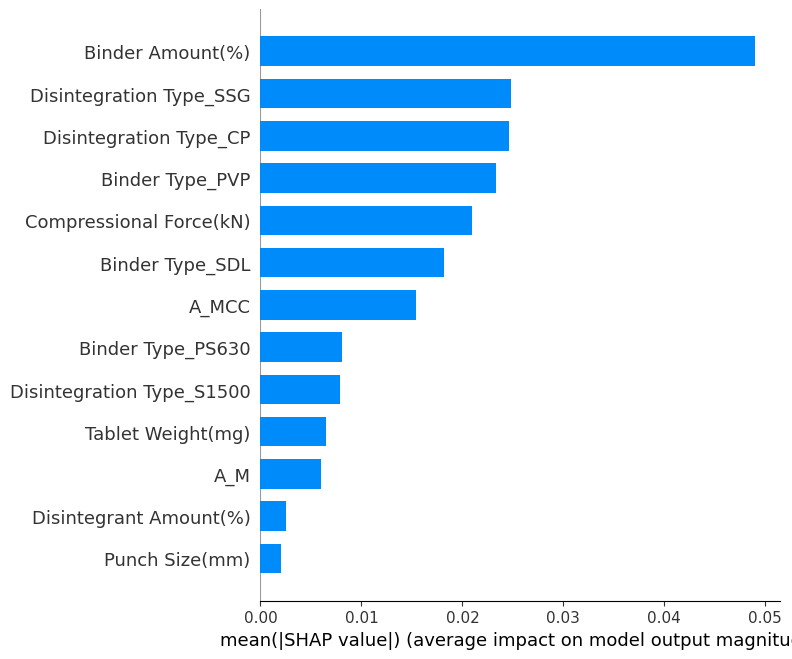

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


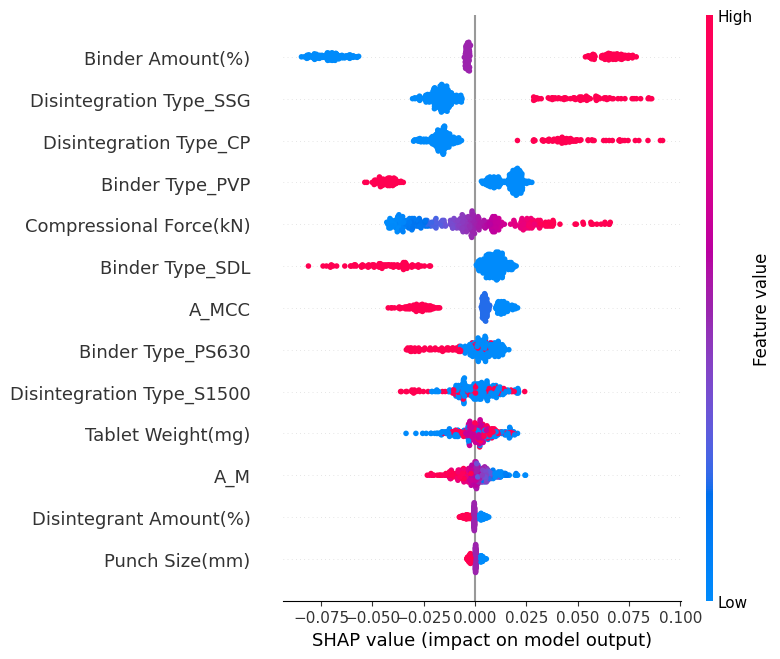

In [ ]:
import shap

# Wrap the ANN model in a function to make it callable by SHAP
def ann_predict(input_data):
    return ann_y3.predict(input_data)

# Create an explainer object for the ANN model
explainer = shap.Explainer(ann_predict, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot for feature importances
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_encoded.columns)

# Summary plot for individual feature impact on y3 output
shap.summary_plot(shap_values, X_test, feature_names=X_encoded.columns)


In [24]:
import tensorflow as tf
from sklearn.metrics import r2_score

# Custom callback to monitor validation R-squared and save the best model
class R2Callback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, filepath, patience=10):
        super(R2Callback, self).__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.filepath = filepath
        self.patience = patience
        self.best_r2 = -float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        y_pred_val = self.model.predict(self.X_val)
        r2_val = r2_score(self.y_val, y_pred_val)
        print(f'Validation R^2: {r2_val}')
        if r2_val > self.best_r2:
            self.best_r2 = r2_val
            self.wait = 0
            self.model.save(self.filepath, overwrite=True)
            print("Model saved with validation R^2:", r2_val)
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Early stopping due to no improvement in validation R^2.")

# Define file path to save the best model
filepath_y1 = '/content/drive/My Drive/y1.hdf5'

# Define custom callback to monitor validation R-squared
r2_callback = R2Callback(X_test, y1_test, filepath_y1, patience=369)

# Define and compile ANN model for y1
ann_y1 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Train the ANN model with the custom callback
hist = ann_y1.fit(X_train, y1_train, epochs=10000, callbacks=[r2_callback], validation_data=(X_test, y1_test), batch_size=None)

# Load the best model
ann_y1 = tf.keras.models.load_model(filepath_y1)

# Predict using the best model
y1_pred_ann = ann_y1.predict(X_test)


Epoch 1/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.3982088803597197
Model saved with validation R^2: -0.3982088803597197
17/17 [==============================] - 2s 52ms/step - loss: 0.0038 - root_mean_squared_error: 0.0615 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0386
Epoch 2/10000
13/17 [=====================>........] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.17818673403444008
Model saved with validation R^2: -0.17818673403444008
17/17 [==============================] - 1s 31ms/step - loss: 0.0014 - root_mean_squared_error: 0.0372 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0354
Epoch 3/10000
15/17 [=========================>....] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0348

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: -0.3916243913330768
17/17 [==============================] - 1s 31ms/step - loss: 0.0012 - root_mean_squared_error: 0.0349 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0385
Epoch 4/10000
11/11 [==============================] - 0s 7ms/step
Validation R^2: -0.1758100423084601
Model saved with validation R^2: -0.1758100423084601
17/17 [==============================] - 1s 54ms/step - loss: 0.0012 - root_mean_squared_error: 0.0343 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0354
Epoch 5/10000
16/17 [===========================>..] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0341

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: -0.31157839851206326
17/17 [==============================] - 0s 27ms/step - loss: 0.0012 - root_mean_squared_error: 0.0341 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0374
Epoch 6/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.00972262931052248
Model saved with validation R^2: 0.00972262931052248
17/17 [==============================] - 0s 24ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 7/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0341    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.028350157269544374
Model saved with validation R^2: 0.028350157269544374
17/17 [==============================] - 0s 17ms/step - loss: 0.0011 - root_mean_squared_error: 0.0336 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0322
Epoch 8/10000
13/17 [=====================>........] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0327    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.035524823117737636
Model saved with validation R^2: 0.035524823117737636
17/17 [==============================] - 0s 23ms/step - loss: 0.0011 - root_mean_squared_error: 0.0332 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 9/10000
17/17 [==============================] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0331

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.03451240448684334
17/17 [==============================] - 0s 23ms/step - loss: 0.0011 - root_mean_squared_error: 0.0331 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 10/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.039285290264033046
Model saved with validation R^2: 0.039285290264033046
17/17 [==============================] - 0s 25ms/step - loss: 0.0011 - root_mean_squared_error: 0.0330 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0320
Epoch 11/10000
16/17 [===========================>..] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0329

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.04410610836340734
17/17 [==============================] - 0s 23ms/step - loss: 0.0011 - root_mean_squared_error: 0.0329 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 12/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.034275405787983715
17/17 [==============================] - 0s 23ms/step - loss: 0.0011 - root_mean_squared_error: 0.0331 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 13/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.020639878087154395
17/17 [==============================] - 0s 25ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0330
Epoch 14/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.04101076833349837
Model saved with validation R^2: 0.04101076833349837
17/17 [==============================] - 0s 24ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.04546868389493375
Model saved with validation R^2: 0.04546868389493375
17/17 [==============================] - 0s 16ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0319
Epoch 16/10000
13/17 [=====================>........] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0326

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.05011917958777001
Model saved with validation R^2: 0.05011917958777001
17/17 [==============================] - 0s 18ms/step - loss: 0.0011 - root_mean_squared_error: 0.0327 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 17/10000
13/17 [=====================>........] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0324    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.060985723001538705
17/17 [==============================] - 0s 15ms/step - loss: 0.0011 - root_mean_squared_error: 0.0326 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0336
Epoch 18/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.07726959041547676
17/17 [==============================] - 0s 18ms/step - loss: 0.0011 - root_mean_squared_error: 0.0327 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0339
Epoch 19/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.055011667647395956
Model saved with validation R^2: 0.055011667647395956
17/17 [==============================] - 0s 19ms/step - loss: 0.0011 - root_mean_squared_error: 0.0326 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 20/10000
12/17 [====================>.........] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0323

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.023059820708752565
17/17 [==============================] - 0s 17ms/step - loss: 0.0011 - root_mean_squared_error: 0.0326 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0323
Epoch 21/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.13641701629768366
17/17 [==============================] - 0s 16ms/step - loss: 0.0011 - root_mean_squared_error: 0.0326 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0348
Epoch 22/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.26964167769318825
17/17 [==============================] - 0s 16ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0368
Epoch 23/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.04288373701218695
17/17 [==============================] - 0s 19ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - val_loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.06490847444430081
Model saved with validation R^2: 0.06490847444430081
17/17 [==============================] - 0s 18ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 9.9655e-04 - val_root_mean_squared_error: 0.0316
Epoch 26/10000
10/17 [================>.............] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0333    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.05863648723418846
17/17 [==============================] - 0s 16ms/step - loss: 0.0010 - root_mean_squared_error: 0.0323 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 27/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.0645405216679853
17/17 [==============================] - 0s 15ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val_loss: 9.9694e-04 - val_root_mean_squared_error: 0.0316
Epoch 28/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.07100026728479814
Model saved with validation R^2: 0.07100026728479814
17/17 [==============================] - 0s 18ms/step - loss: 0.0010 - root_mean_squared_error: 0.0323 - val_loss: 9.9006e-04 - val_root_mean_squared_error: 0.0315
Epoch 29/10000
14/17 [=======================>......] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0325

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.07747979868599486
Model saved with validation R^2: 0.07747979868599486
17/17 [==============================] - 0s 20ms/step - loss: 0.0010 - root_mean_squared_error: 0.0323 - val_loss: 9.8315e-04 - val_root_mean_squared_error: 0.0314
Epoch 30/10000
13/17 [=====================>........] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0322    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.15616410888167676
17/17 [==============================] - 0s 16ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0351
Epoch 31/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.04868543845419693
17/17 [==============================] - 0s 15ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 32/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.05358085221796072
17/17 [==============================] - 0s 17ms/step - loss: 0.0010 - root_mean_squared_error: 0.0320 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 33/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.06039839819127901
17/17 [==============================] - 0s 18ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.08044103477170794
17/17 [==============================] - 0s 17ms/step - loss: 0.0010 - root_mean_squared_error: 0.0319 - val_loss: 9.8000e-04 - val_root_mean_squared_error: 0.0313
Epoch 50/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.04713060239489042
17/17 [==============================] - 0s 28ms/step - loss: 0.0010 - root_mean_squared_error: 0.0320 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0319
Epoch 51/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.014030225629979465
17/17 [==============================] - 0s 25ms/step - loss: 0.0010 - root_mean_squared_error: 0.0318 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0324
Epoch 52/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.0650303442071779
17/17 [==============================] - 0s 25ms/step - loss: 0.0010 - root_mean_squared_error: 0.0320 - val_loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.0719904958987797
17/17 [==============================] - 0s 17ms/step - loss: 9.8654e-04 - root_mean_squared_error: 0.0314 - val_loss: 9.8900e-04 - val_root_mean_squared_error: 0.0314
Epoch 62/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.07839978643820766
17/17 [==============================] - 0s 16ms/step - loss: 0.0010 - root_mean_squared_error: 0.0317 - val_loss: 9.8217e-04 - val_root_mean_squared_error: 0.0313
Epoch 63/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.09977926651456026
17/17 [==============================] - 0s 18ms/step - loss: 9.8581e-04 - root_mean_squared_error: 0.0314 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0342
Epoch 64/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.0027132923240839046
17/17 [==============================] - 0s 14ms/step - loss: 0.0010 - root_mean_squared_error: 0.031

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.05166495245321501
17/17 [==============================] - 0s 16ms/step - loss: 9.9334e-04 - root_mean_squared_error: 0.0315 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 69/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.05880569448446915
17/17 [==============================] - 0s 17ms/step - loss: 9.8244e-04 - root_mean_squared_error: 0.0313 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 70/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.2184421489895516
17/17 [==============================] - 0s 14ms/step - loss: 9.9370e-04 - root_mean_squared_error: 0.0315 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 71/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.07540576354757877
17/17 [==============================] - 0s 17ms/step - loss: 0.0010 - root_mean_squared_error: 0.0318 - va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.22712657431047534
17/17 [==============================] - 0s 19ms/step - loss: 9.7549e-04 - root_mean_squared_error: 0.0312 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0362
Epoch 75/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.24762684085768294
17/17 [==============================] - 0s 17ms/step - loss: 0.0010 - root_mean_squared_error: 0.0317 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0365
Epoch 76/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.04138735374975144
17/17 [==============================] - 0s 16ms/step - loss: 0.0010 - root_mean_squared_error: 0.0318 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0320
Epoch 77/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.08676865825213687
17/17 [==============================] - 0s 15ms/step - loss: 9.8290e-04 - root_mean_squared_error: 0.0314 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.08307404162888887
17/17 [==============================] - 0s 15ms/step - loss: 9.7316e-04 - root_mean_squared_error: 0.0312 - val_loss: 9.7719e-04 - val_root_mean_squared_error: 0.0313
Epoch 82/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.08577523132050624
17/17 [==============================] - 0s 18ms/step - loss: 9.7759e-04 - root_mean_squared_error: 0.0313 - val_loss: 9.7431e-04 - val_root_mean_squared_error: 0.0312
Epoch 83/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.021778801836209838
17/17 [==============================] - 0s 16ms/step - loss: 9.8663e-04 - root_mean_squared_error: 0.0314 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0323
Epoch 84/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.0440259531412972
17/17 [==============================] - 0s 18ms/step - loss: 0.0010 - root_mean_squared_error: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.05142728075080649
17/17 [==============================] - 0s 14ms/step - loss: 9.6680e-04 - root_mean_squared_error: 0.0311 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0335
Epoch 92/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.011153368195224611
17/17 [==============================] - 0s 20ms/step - loss: 9.9571e-04 - root_mean_squared_error: 0.0316 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 93/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.09022145676246907
17/17 [==============================] - 0s 25ms/step - loss: 9.8418e-04 - root_mean_squared_error: 0.0314 - val_loss: 9.6957e-04 - val_root_mean_squared_error: 0.0311
Epoch 94/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.08954403415748757
17/17 [==============================] - 0s 24ms/step - loss: 9.8719e-04 - root_mean_squared_error: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.11107851875845332
17/17 [==============================] - 0s 14ms/step - loss: 9.6029e-04 - root_mean_squared_error: 0.0310 - val_loss: 9.4734e-04 - val_root_mean_squared_error: 0.0308
Epoch 112/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.09255550923826317
17/17 [==============================] - 0s 17ms/step - loss: 9.5091e-04 - root_mean_squared_error: 0.0308 - val_loss: 9.6709e-04 - val_root_mean_squared_error: 0.0311
Epoch 113/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.08040424772571697
17/17 [==============================] - 0s 16ms/step - loss: 9.6023e-04 - root_mean_squared_error: 0.0310 - val_loss: 9.8004e-04 - val_root_mean_squared_error: 0.0313
Epoch 114/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.023427134499755642
17/17 [==============================] - 0s 15ms/step - loss: 9.4732e-04 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.028123315338373533
17/17 [==============================] - 0s 15ms/step - loss: 9.2918e-04 - root_mean_squared_error: 0.0305 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0322
Epoch 131/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.10175577259221558
17/17 [==============================] - 0s 19ms/step - loss: 9.6078e-04 - root_mean_squared_error: 0.0310 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0343
Epoch 132/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.08699410368463123
17/17 [==============================] - 0s 17ms/step - loss: 9.4186e-04 - root_mean_squared_error: 0.0307 - val_loss: 9.7301e-04 - val_root_mean_squared_error: 0.0312
Epoch 133/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.2251158022280313
17/17 [==============================] - 0s 15ms/step - loss: 9.5128e-04 - root_mean_squared_error

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.12246127690483
Model saved with validation R^2: 0.12246127690483
17/17 [==============================] - 0s 16ms/step - loss: 9.2015e-04 - root_mean_squared_error: 0.0303 - val_loss: 9.3521e-04 - val_root_mean_squared_error: 0.0306
Epoch 143/10000
14/17 [=======================>......] - ETA: 0s - loss: 9.2633e-04 - root_mean_squared_error: 0.0304

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.07280706322143149
17/17 [==============================] - 0s 16ms/step - loss: 9.4102e-04 - root_mean_squared_error: 0.0307 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0338
Epoch 144/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.11405161473632575
17/17 [==============================] - 0s 17ms/step - loss: 9.5471e-04 - root_mean_squared_error: 0.0309 - val_loss: 9.4418e-04 - val_root_mean_squared_error: 0.0307
Epoch 145/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.106634074454514
17/17 [==============================] - 0s 15ms/step - loss: 9.4841e-04 - root_mean_squared_error: 0.0308 - val_loss: 9.5208e-04 - val_root_mean_squared_error: 0.0309
Epoch 146/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.08861289896597546
17/17 [==============================] - 0s 18ms/step - loss: 9.2142e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.04914774753038098
17/17 [==============================] - 0s 19ms/step - loss: 9.1885e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 154/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.15550580013239834
17/17 [==============================] - 0s 17ms/step - loss: 9.4245e-04 - root_mean_squared_error: 0.0307 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0351
Epoch 155/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.06453469369529008
17/17 [==============================] - 0s 17ms/step - loss: 9.1837e-04 - root_mean_squared_error: 0.0303 - val_loss: 9.9695e-04 - val_root_mean_squared_error: 0.0316
Epoch 156/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.029124506237954928
17/17 [==============================] - 0s 19ms/step - loss: 9.2647e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.11706522312758239
17/17 [==============================] - 0s 19ms/step - loss: 9.2149e-04 - root_mean_squared_error: 0.0304 - val_loss: 9.4096e-04 - val_root_mean_squared_error: 0.0307
Epoch 164/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.10128459845397486
17/17 [==============================] - 0s 14ms/step - loss: 9.1026e-04 - root_mean_squared_error: 0.0302 - val_loss: 9.5778e-04 - val_root_mean_squared_error: 0.0309
Epoch 165/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.13039902063396047
17/17 [==============================] - 0s 18ms/step - loss: 9.2220e-04 - root_mean_squared_error: 0.0304 - val_loss: 9.2675e-04 - val_root_mean_squared_error: 0.0304
Epoch 166/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.14206217066580373
Model saved with validation R^2: 0.14206217066580373
17/17 [==============================] 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.02657221460251713
17/17 [==============================] - 0s 15ms/step - loss: 9.2049e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0331
Epoch 168/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.08677343611247734
17/17 [==============================] - 0s 15ms/step - loss: 9.3075e-04 - root_mean_squared_error: 0.0305 - val_loss: 9.7325e-04 - val_root_mean_squared_error: 0.0312
Epoch 169/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.025393807929157575
17/17 [==============================] - 0s 16ms/step - loss: 9.1799e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0322
Epoch 170/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.09366563880028655
17/17 [==============================] - 0s 17ms/step - loss: 9.3098e-04 - root_mean_squared_error

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.10510731342555346
17/17 [==============================] - 0s 17ms/step - loss: 8.9322e-04 - root_mean_squared_error: 0.0299 - val_loss: 9.5371e-04 - val_root_mean_squared_error: 0.0309
Epoch 198/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13122227514504725
17/17 [==============================] - 0s 15ms/step - loss: 9.1924e-04 - root_mean_squared_error: 0.0303 - val_loss: 9.2588e-04 - val_root_mean_squared_error: 0.0304
Epoch 199/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14397353436724214
17/17 [==============================] - 0s 16ms/step - loss: 8.8805e-04 - root_mean_squared_error: 0.0298 - val_loss: 9.1229e-04 - val_root_mean_squared_error: 0.0302
Epoch 200/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.09820160249050691
17/17 [==============================] - 0s 17ms/step - loss: 8.9961e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.11745008860963024
17/17 [==============================] - 0s 15ms/step - loss: 9.0955e-04 - root_mean_squared_error: 0.0302 - val_loss: 9.4055e-04 - val_root_mean_squared_error: 0.0307
Epoch 209/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.045387935456648654
17/17 [==============================] - 0s 18ms/step - loss: 8.9835e-04 - root_mean_squared_error: 0.0300 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 210/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13295859233012908
17/17 [==============================] - 0s 17ms/step - loss: 8.9120e-04 - root_mean_squared_error: 0.0299 - val_loss: 9.2403e-04 - val_root_mean_squared_error: 0.0304
Epoch 211/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.08280436942377811
17/17 [==============================] - 0s 17ms/step - loss: 8.9455e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.13977875808937068
17/17 [==============================] - 0s 25ms/step - loss: 8.8572e-04 - root_mean_squared_error: 0.0298 - val_loss: 9.1676e-04 - val_root_mean_squared_error: 0.0303
Epoch 225/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.073511663421023
17/17 [==============================] - 0s 17ms/step - loss: 8.8593e-04 - root_mean_squared_error: 0.0298 - val_loss: 9.8738e-04 - val_root_mean_squared_error: 0.0314
Epoch 226/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1523115197788517
17/17 [==============================] - 0s 17ms/step - loss: 8.9050e-04 - root_mean_squared_error: 0.0298 - val_loss: 9.0340e-04 - val_root_mean_squared_error: 0.0301
Epoch 227/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.02877629352349298
17/17 [==============================] - 0s 17ms/step - loss: 8.8421e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1640730897593521
Model saved with validation R^2: 0.1640730897593521
17/17 [==============================] - 0s 19ms/step - loss: 8.6236e-04 - root_mean_squared_error: 0.0294 - val_loss: 8.9087e-04 - val_root_mean_squared_error: 0.0298
Epoch 245/10000
11/17 [==================>...........] - ETA: 0s - loss: 9.2614e-04 - root_mean_squared_error: 0.0304

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.0137080729864143
17/17 [==============================] - 0s 17ms/step - loss: 8.7840e-04 - root_mean_squared_error: 0.0296 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0329
Epoch 246/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.16177275913699263
17/17 [==============================] - 0s 18ms/step - loss: 9.0487e-04 - root_mean_squared_error: 0.0301 - val_loss: 8.9332e-04 - val_root_mean_squared_error: 0.0299
Epoch 247/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1569793108480959
17/17 [==============================] - 0s 17ms/step - loss: 8.6269e-04 - root_mean_squared_error: 0.0294 - val_loss: 8.9843e-04 - val_root_mean_squared_error: 0.0300
Epoch 248/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13659113093592934
17/17 [==============================] - 0s 15ms/step - loss: 8.5240e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.16965870488292456
17/17 [==============================] - 0s 17ms/step - loss: 8.7210e-04 - root_mean_squared_error: 0.0295 - val_loss: 8.8491e-04 - val_root_mean_squared_error: 0.0297
Epoch 255/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.11776811836317824
17/17 [==============================] - 0s 20ms/step - loss: 8.6300e-04 - root_mean_squared_error: 0.0294 - val_loss: 9.4022e-04 - val_root_mean_squared_error: 0.0307
Epoch 256/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.16751464915605008
17/17 [==============================] - 0s 15ms/step - loss: 8.7179e-04 - root_mean_squared_error: 0.0295 - val_loss: 8.8720e-04 - val_root_mean_squared_error: 0.0298
Epoch 257/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.10347104360829718
17/17 [==============================] - 0s 16ms/step - loss: 8.7009e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.14006568808525655
17/17 [==============================] - 0s 19ms/step - loss: 8.4940e-04 - root_mean_squared_error: 0.0291 - val_loss: 9.1645e-04 - val_root_mean_squared_error: 0.0303
Epoch 271/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.10944467436844452
17/17 [==============================] - 0s 16ms/step - loss: 8.5382e-04 - root_mean_squared_error: 0.0292 - val_loss: 9.4909e-04 - val_root_mean_squared_error: 0.0308
Epoch 272/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.06102641812792653
17/17 [==============================] - 0s 17ms/step - loss: 8.4221e-04 - root_mean_squared_error: 0.0290 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0316
Epoch 273/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.032368092817360306
17/17 [==============================] - 0s 17ms/step - loss: 8.7443e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.17545686567087382
17/17 [==============================] - 0s 16ms/step - loss: 8.4139e-04 - root_mean_squared_error: 0.0290 - val_loss: 8.7874e-04 - val_root_mean_squared_error: 0.0296
Epoch 282/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.15636519884855493
17/17 [==============================] - 0s 15ms/step - loss: 8.3940e-04 - root_mean_squared_error: 0.0290 - val_loss: 8.9908e-04 - val_root_mean_squared_error: 0.0300
Epoch 283/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.17733673070362066
17/17 [==============================] - 0s 19ms/step - loss: 8.6843e-04 - root_mean_squared_error: 0.0295 - val_loss: 8.7673e-04 - val_root_mean_squared_error: 0.0296
Epoch 284/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1350110069678191
17/17 [==============================] - 0s 16ms/step - loss: 8.6002e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1130886801835429
17/17 [==============================] - 0s 17ms/step - loss: 8.3328e-04 - root_mean_squared_error: 0.0289 - val_loss: 9.4520e-04 - val_root_mean_squared_error: 0.0307
Epoch 300/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.16457975789274049
17/17 [==============================] - 0s 20ms/step - loss: 8.5579e-04 - root_mean_squared_error: 0.0293 - val_loss: 8.9033e-04 - val_root_mean_squared_error: 0.0298
Epoch 301/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.14737729003157818
17/17 [==============================] - 0s 24ms/step - loss: 8.3743e-04 - root_mean_squared_error: 0.0289 - val_loss: 9.0866e-04 - val_root_mean_squared_error: 0.0301
Epoch 302/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.17167630196859285
17/17 [==============================] - 0s 23ms/step - loss: 8.2665e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.06736665636895434
17/17 [==============================] - 0s 17ms/step - loss: 8.3584e-04 - root_mean_squared_error: 0.0289 - val_loss: 9.9393e-04 - val_root_mean_squared_error: 0.0315
Epoch 310/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.05160207465490818
17/17 [==============================] - 0s 16ms/step - loss: 8.4116e-04 - root_mean_squared_error: 0.0290 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 311/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.15793204146591
17/17 [==============================] - 0s 15ms/step - loss: 8.3184e-04 - root_mean_squared_error: 0.0288 - val_loss: 8.9741e-04 - val_root_mean_squared_error: 0.0300
Epoch 312/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.19441877816830622
Model saved with validation R^2: 0.19441877816830622
17/17 [==============================] - 0s 17

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.18973742394395632
17/17 [==============================] - 0s 17ms/step - loss: 8.1152e-04 - root_mean_squared_error: 0.0285 - val_loss: 8.6352e-04 - val_root_mean_squared_error: 0.0294
Epoch 314/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.04069792542178141
17/17 [==============================] - 0s 18ms/step - loss: 8.1704e-04 - root_mean_squared_error: 0.0286 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 315/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.18843759579017794
17/17 [==============================] - 0s 16ms/step - loss: 8.4414e-04 - root_mean_squared_error: 0.0291 - val_loss: 8.6490e-04 - val_root_mean_squared_error: 0.0294
Epoch 316/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.18856387128861096
17/17 [==============================] - 0s 18ms/step - loss: 8.1170e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.09484197775320102
17/17 [==============================] - 0s 15ms/step - loss: 8.1406e-04 - root_mean_squared_error: 0.0285 - val_loss: 9.6465e-04 - val_root_mean_squared_error: 0.0311
Epoch 323/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.19463913399944333
17/17 [==============================] - 0s 18ms/step - loss: 8.1879e-04 - root_mean_squared_error: 0.0286 - val_loss: 8.5829e-04 - val_root_mean_squared_error: 0.0293
Epoch 324/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.19021452750964019
17/17 [==============================] - 0s 16ms/step - loss: 8.1925e-04 - root_mean_squared_error: 0.0286 - val_loss: 8.6301e-04 - val_root_mean_squared_error: 0.0294
Epoch 325/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.2915581072278004
17/17 [==============================] - 0s 20ms/step - loss: 8.1103e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.17851914411836345
17/17 [==============================] - 0s 23ms/step - loss: 8.0532e-04 - root_mean_squared_error: 0.0284 - val_loss: 8.7547e-04 - val_root_mean_squared_error: 0.0296
Epoch 345/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.1933511664613129
17/17 [==============================] - 0s 26ms/step - loss: 8.1679e-04 - root_mean_squared_error: 0.0286 - val_loss: 8.5966e-04 - val_root_mean_squared_error: 0.0293
Epoch 346/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.02472969096989064
17/17 [==============================] - 0s 25ms/step - loss: 8.2920e-04 - root_mean_squared_error: 0.0288 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0322
Epoch 347/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.046575278599589764
17/17 [==============================] - 0s 22ms/step - loss: 8.1849e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.21078420360836292
Model saved with validation R^2: 0.21078420360836292
17/17 [==============================] - 0s 17ms/step - loss: 7.9995e-04 - root_mean_squared_error: 0.0283 - val_loss: 8.4109e-04 - val_root_mean_squared_error: 0.0290
Epoch 351/10000
13/17 [=====================>........] - ETA: 0s - loss: 8.2655e-04 - root_mean_squared_error: 0.0287

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1969158622935565
17/17 [==============================] - 0s 16ms/step - loss: 7.8992e-04 - root_mean_squared_error: 0.0281 - val_loss: 8.5587e-04 - val_root_mean_squared_error: 0.0293
Epoch 352/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20351820183071423
17/17 [==============================] - 0s 16ms/step - loss: 7.9198e-04 - root_mean_squared_error: 0.0281 - val_loss: 8.4883e-04 - val_root_mean_squared_error: 0.0291
Epoch 353/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.18237251956764888
17/17 [==============================] - 0s 16ms/step - loss: 7.9951e-04 - root_mean_squared_error: 0.0283 - val_loss: 8.7137e-04 - val_root_mean_squared_error: 0.0295
Epoch 354/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.18200889055185365
17/17 [==============================] - 0s 19ms/step - loss: 8.0873e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.19681078561455567
17/17 [==============================] - 0s 18ms/step - loss: 7.9787e-04 - root_mean_squared_error: 0.0282 - val_loss: 8.5598e-04 - val_root_mean_squared_error: 0.0293
Epoch 363/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1603106849811604
17/17 [==============================] - 0s 17ms/step - loss: 7.8556e-04 - root_mean_squared_error: 0.0280 - val_loss: 8.9488e-04 - val_root_mean_squared_error: 0.0299
Epoch 364/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.22005875276387898
Model saved with validation R^2: 0.22005875276387898
17/17 [==============================] - 0s 20ms/step - loss: 7.9871e-04 - root_mean_squared_error: 0.0283 - val_loss: 8.3120e-04 - val_root_mean_squared_error: 0.0288
Epoch 365/10000
12/17 [====================>.........] - ETA: 0s - loss: 7.8788e-04 - root_mean_squared_error: 0.0281

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20555179124995804
17/17 [==============================] - 0s 18ms/step - loss: 8.1324e-04 - root_mean_squared_error: 0.0285 - val_loss: 8.4666e-04 - val_root_mean_squared_error: 0.0291
Epoch 366/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.043052616195061844
17/17 [==============================] - 0s 15ms/step - loss: 7.9372e-04 - root_mean_squared_error: 0.0282 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0319
Epoch 367/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20204244455336962
17/17 [==============================] - 0s 20ms/step - loss: 8.0127e-04 - root_mean_squared_error: 0.0283 - val_loss: 8.5040e-04 - val_root_mean_squared_error: 0.0292
Epoch 368/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.016935615094750944
17/17 [==============================] - 0s 16ms/step - loss: 8.1022e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.10292531060405796
17/17 [==============================] - 0s 15ms/step - loss: 7.8716e-04 - root_mean_squared_error: 0.0281 - val_loss: 9.5603e-04 - val_root_mean_squared_error: 0.0309
Epoch 373/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.17930785726195375
17/17 [==============================] - 0s 19ms/step - loss: 7.9229e-04 - root_mean_squared_error: 0.0281 - val_loss: 8.7463e-04 - val_root_mean_squared_error: 0.0296
Epoch 374/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.19261511945602416
17/17 [==============================] - 0s 16ms/step - loss: 7.8651e-04 - root_mean_squared_error: 0.0280 - val_loss: 8.6045e-04 - val_root_mean_squared_error: 0.0293
Epoch 375/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.20736141874116698
17/17 [==============================] - 0s 17ms/step - loss: 8.0539e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.21658684371203252
17/17 [==============================] - 0s 26ms/step - loss: 8.1527e-04 - root_mean_squared_error: 0.0286 - val_loss: 8.3490e-04 - val_root_mean_squared_error: 0.0289
Epoch 388/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1860511113641835
17/17 [==============================] - 0s 15ms/step - loss: 7.7218e-04 - root_mean_squared_error: 0.0278 - val_loss: 8.6744e-04 - val_root_mean_squared_error: 0.0295
Epoch 389/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.22235007309671317
17/17 [==============================] - 0s 18ms/step - loss: 7.7825e-04 - root_mean_squared_error: 0.0279 - val_loss: 8.2876e-04 - val_root_mean_squared_error: 0.0288
Epoch 390/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2047753310260847
17/17 [==============================] - 0s 15ms/step - loss: 8.0411e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1647983896545211
17/17 [==============================] - 0s 17ms/step - loss: 7.8109e-04 - root_mean_squared_error: 0.0279 - val_loss: 8.9009e-04 - val_root_mean_squared_error: 0.0298
Epoch 393/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1476689489162324
17/17 [==============================] - 0s 17ms/step - loss: 7.7335e-04 - root_mean_squared_error: 0.0278 - val_loss: 9.0835e-04 - val_root_mean_squared_error: 0.0301
Epoch 394/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.19917707251433514
17/17 [==============================] - 0s 15ms/step - loss: 7.8676e-04 - root_mean_squared_error: 0.0280 - val_loss: 8.5346e-04 - val_root_mean_squared_error: 0.0292
Epoch 395/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.05337894407036914
17/17 [==============================] - 0s 16ms/step - loss: 7.7576e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1828263523094864
17/17 [==============================] - 0s 18ms/step - loss: 7.6931e-04 - root_mean_squared_error: 0.0277 - val_loss: 8.7088e-04 - val_root_mean_squared_error: 0.0295
Epoch 400/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.10934322860491452
17/17 [==============================] - 0s 16ms/step - loss: 7.8733e-04 - root_mean_squared_error: 0.0281 - val_loss: 9.4919e-04 - val_root_mean_squared_error: 0.0308
Epoch 401/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.22261654174526146
17/17 [==============================] - 0s 15ms/step - loss: 7.7702e-04 - root_mean_squared_error: 0.0279 - val_loss: 8.2848e-04 - val_root_mean_squared_error: 0.0288
Epoch 402/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.226634040751724
17/17 [==============================] - 0s 17ms/step - loss: 7.6192e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.1583712450464554
17/17 [==============================] - 0s 18ms/step - loss: 7.4836e-04 - root_mean_squared_error: 0.0274 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0351
Epoch 420/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.08879991112956143
17/17 [==============================] - 0s 17ms/step - loss: 7.9751e-04 - root_mean_squared_error: 0.0282 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0341
Epoch 421/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.12076012974015637
17/17 [==============================] - 0s 16ms/step - loss: 7.7521e-04 - root_mean_squared_error: 0.0278 - val_loss: 9.3703e-04 - val_root_mean_squared_error: 0.0306
Epoch 422/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.16939119885395892
17/17 [==============================] - 0s 26ms/step - loss: 7.7248e-04 - root_mean_squared_error:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.07039659088977857
17/17 [==============================] - 0s 24ms/step - loss: 7.4264e-04 - root_mean_squared_error: 0.0273 - val_loss: 9.9070e-04 - val_root_mean_squared_error: 0.0315
Epoch 425/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.11425135437063416
17/17 [==============================] - 0s 22ms/step - loss: 7.4758e-04 - root_mean_squared_error: 0.0273 - val_loss: 9.4396e-04 - val_root_mean_squared_error: 0.0307
Epoch 426/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.24347488606716272
17/17 [==============================] - 1s 31ms/step - loss: 7.7362e-04 - root_mean_squared_error: 0.0278 - val_loss: 8.0625e-04 - val_root_mean_squared_error: 0.0284
Epoch 427/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.2178077825790523
17/17 [==============================] - 0s 25ms/step - loss: 7.3961e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.24571599330065996
17/17 [==============================] - 0s 19ms/step - loss: 7.4955e-04 - root_mean_squared_error: 0.0274 - val_loss: 8.0386e-04 - val_root_mean_squared_error: 0.0284
Epoch 430/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20089529585980626
17/17 [==============================] - 0s 15ms/step - loss: 7.4078e-04 - root_mean_squared_error: 0.0272 - val_loss: 8.5162e-04 - val_root_mean_squared_error: 0.0292
Epoch 431/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14243231957165103
17/17 [==============================] - 0s 17ms/step - loss: 7.2954e-04 - root_mean_squared_error: 0.0270 - val_loss: 9.1393e-04 - val_root_mean_squared_error: 0.0302
Epoch 432/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.10917748811548467
17/17 [==============================] - 0s 19ms/step - loss: 7.5596e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2559199341274533
17/17 [==============================] - 0s 16ms/step - loss: 7.3096e-04 - root_mean_squared_error: 0.0270 - val_loss: 7.9298e-04 - val_root_mean_squared_error: 0.0282
Epoch 448/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.25695990795345236
17/17 [==============================] - 0s 17ms/step - loss: 7.4640e-04 - root_mean_squared_error: 0.0273 - val_loss: 7.9188e-04 - val_root_mean_squared_error: 0.0281
Epoch 449/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2526172190411534
17/17 [==============================] - 0s 16ms/step - loss: 7.4118e-04 - root_mean_squared_error: 0.0272 - val_loss: 7.9650e-04 - val_root_mean_squared_error: 0.0282
Epoch 450/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13124769878118459
17/17 [==============================] - 0s 16ms/step - loss: 7.4040e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.25507706407659536
17/17 [==============================] - 0s 15ms/step - loss: 7.3472e-04 - root_mean_squared_error: 0.0271 - val_loss: 7.9388e-04 - val_root_mean_squared_error: 0.0282
Epoch 457/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.24051857606522353
17/17 [==============================] - 0s 16ms/step - loss: 7.3711e-04 - root_mean_squared_error: 0.0271 - val_loss: 8.0940e-04 - val_root_mean_squared_error: 0.0284
Epoch 458/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2169955390744479
17/17 [==============================] - 0s 16ms/step - loss: 7.2108e-04 - root_mean_squared_error: 0.0269 - val_loss: 8.3447e-04 - val_root_mean_squared_error: 0.0289
Epoch 459/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.23240427451833912
17/17 [==============================] - 0s 16ms/step - loss: 7.3724e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2762637195877189
Model saved with validation R^2: 0.2762637195877189
17/17 [==============================] - 0s 17ms/step - loss: 7.3895e-04 - root_mean_squared_error: 0.0272 - val_loss: 7.7130e-04 - val_root_mean_squared_error: 0.0278
Epoch 475/10000
12/17 [====================>.........] - ETA: 0s - loss: 7.1959e-04 - root_mean_squared_error: 0.0268

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.057892317637115
17/17 [==============================] - 0s 16ms/step - loss: 7.2532e-04 - root_mean_squared_error: 0.0269 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 476/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.23920388030835738
17/17 [==============================] - 0s 17ms/step - loss: 7.1935e-04 - root_mean_squared_error: 0.0268 - val_loss: 8.1080e-04 - val_root_mean_squared_error: 0.0285
Epoch 477/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2122018904630485
17/17 [==============================] - 0s 17ms/step - loss: 7.2625e-04 - root_mean_squared_error: 0.0269 - val_loss: 8.3958e-04 - val_root_mean_squared_error: 0.0290
Epoch 478/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1136785886633982
17/17 [==============================] - 0s 15ms/step - loss: 7.2540e-04 - root_mean_squared_error: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.1360070419356938
17/17 [==============================] - 0s 21ms/step - loss: 6.9625e-04 - root_mean_squared_error: 0.0264 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0348
Epoch 498/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.06318914236363737
17/17 [==============================] - 0s 15ms/step - loss: 7.5383e-04 - root_mean_squared_error: 0.0275 - val_loss: 9.9838e-04 - val_root_mean_squared_error: 0.0316
Epoch 499/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2821393861981283
Model saved with validation R^2: 0.2821393861981283
17/17 [==============================] - 0s 18ms/step - loss: 7.1571e-04 - root_mean_squared_error: 0.0268 - val_loss: 7.6504e-04 - val_root_mean_squared_error: 0.0277
Epoch 500/10000
12/17 [====================>.........] - ETA: 0s - loss: 7.0455e-04 - root_mean_squared_error: 0.0265

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.003907474380195453
17/17 [==============================] - 0s 16ms/step - loss: 6.9777e-04 - root_mean_squared_error: 0.0264 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0327
Epoch 501/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2451154905356019
17/17 [==============================] - 0s 19ms/step - loss: 7.1151e-04 - root_mean_squared_error: 0.0267 - val_loss: 8.0450e-04 - val_root_mean_squared_error: 0.0284
Epoch 502/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.22706617782437777
17/17 [==============================] - 0s 16ms/step - loss: 7.0009e-04 - root_mean_squared_error: 0.0265 - val_loss: 8.2373e-04 - val_root_mean_squared_error: 0.0287
Epoch 503/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.27559767015477377
17/17 [==============================] - 0s 22ms/step - loss: 7.1992e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.19895144373896645
17/17 [==============================] - 0s 25ms/step - loss: 7.2040e-04 - root_mean_squared_error: 0.0268 - val_loss: 8.5370e-04 - val_root_mean_squared_error: 0.0292
Epoch 507/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.28594472406001215
Model saved with validation R^2: 0.28594472406001215
17/17 [==============================] - 0s 28ms/step - loss: 7.1664e-04 - root_mean_squared_error: 0.0268 - val_loss: 7.6099e-04 - val_root_mean_squared_error: 0.0276
Epoch 508/10000
13/17 [=====================>........] - ETA: 0s - loss: 6.9073e-04 - root_mean_squared_error: 0.0263

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.19851266558244796
17/17 [==============================] - 1s 31ms/step - loss: 6.9273e-04 - root_mean_squared_error: 0.0263 - val_loss: 8.5416e-04 - val_root_mean_squared_error: 0.0292
Epoch 509/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2915651496651287
Model saved with validation R^2: 0.2915651496651287
17/17 [==============================] - 0s 21ms/step - loss: 7.0700e-04 - root_mean_squared_error: 0.0266 - val_loss: 7.5500e-04 - val_root_mean_squared_error: 0.0275
Epoch 510/10000
12/17 [====================>.........] - ETA: 0s - loss: 6.6798e-04 - root_mean_squared_error: 0.0258

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2300071578343379
17/17 [==============================] - 0s 18ms/step - loss: 6.9379e-04 - root_mean_squared_error: 0.0263 - val_loss: 8.2060e-04 - val_root_mean_squared_error: 0.0286
Epoch 511/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3049754870624116
Model saved with validation R^2: 0.3049754870624116
17/17 [==============================] - 0s 21ms/step - loss: 6.9955e-04 - root_mean_squared_error: 0.0264 - val_loss: 7.4070e-04 - val_root_mean_squared_error: 0.0272
Epoch 512/10000
12/17 [====================>.........] - ETA: 0s - loss: 7.0027e-04 - root_mean_squared_error: 0.0265

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.28012915126038884
17/17 [==============================] - 0s 18ms/step - loss: 6.8250e-04 - root_mean_squared_error: 0.0261 - val_loss: 7.6718e-04 - val_root_mean_squared_error: 0.0277
Epoch 513/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.26086190755855987
17/17 [==============================] - 0s 19ms/step - loss: 7.0784e-04 - root_mean_squared_error: 0.0266 - val_loss: 7.8772e-04 - val_root_mean_squared_error: 0.0281
Epoch 514/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2975452815283227
17/17 [==============================] - 0s 20ms/step - loss: 6.9157e-04 - root_mean_squared_error: 0.0263 - val_loss: 7.4862e-04 - val_root_mean_squared_error: 0.0274
Epoch 515/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.11637331297828757
17/17 [==============================] - 0s 17ms/step - loss: 6.9808e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.2775521848721212
17/17 [==============================] - 0s 19ms/step - loss: 6.7734e-04 - root_mean_squared_error: 0.0260 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0369
Epoch 534/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.29022392552988563
17/17 [==============================] - 0s 17ms/step - loss: 7.2792e-04 - root_mean_squared_error: 0.0270 - val_loss: 7.5643e-04 - val_root_mean_squared_error: 0.0275
Epoch 535/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3000109279779626
17/17 [==============================] - 0s 18ms/step - loss: 6.8850e-04 - root_mean_squared_error: 0.0262 - val_loss: 7.4600e-04 - val_root_mean_squared_error: 0.0273
Epoch 536/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.0685616238590474
17/17 [==============================] - 0s 16ms/step - loss: 6.7021e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1491914909910983
17/17 [==============================] - 0s 26ms/step - loss: 6.7064e-04 - root_mean_squared_error: 0.0259 - val_loss: 9.0673e-04 - val_root_mean_squared_error: 0.0301
Epoch 545/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1684376476047994
17/17 [==============================] - 0s 23ms/step - loss: 6.7791e-04 - root_mean_squared_error: 0.0260 - val_loss: 8.8622e-04 - val_root_mean_squared_error: 0.0298
Epoch 546/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.17525246634696645
17/17 [==============================] - 0s 23ms/step - loss: 6.6451e-04 - root_mean_squared_error: 0.0258 - val_loss: 8.7895e-04 - val_root_mean_squared_error: 0.0296
Epoch 547/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3182711093235949
Model saved with validation R^2: 0.3182711093235949
17/17 [==============================] - 0s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.24719466704413384
17/17 [==============================] - 0s 27ms/step - loss: 6.6669e-04 - root_mean_squared_error: 0.0258 - val_loss: 8.0228e-04 - val_root_mean_squared_error: 0.0283
Epoch 549/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.30593163642308574
17/17 [==============================] - 0s 23ms/step - loss: 6.6107e-04 - root_mean_squared_error: 0.0257 - val_loss: 7.3969e-04 - val_root_mean_squared_error: 0.0272
Epoch 550/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3111547895411365
17/17 [==============================] - 0s 17ms/step - loss: 6.5914e-04 - root_mean_squared_error: 0.0257 - val_loss: 7.3412e-04 - val_root_mean_squared_error: 0.0271
Epoch 551/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.00927403509334157
17/17 [==============================] - 0s 17ms/step - loss: 6.7412e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2720855127719036
17/17 [==============================] - 0s 17ms/step - loss: 6.3549e-04 - root_mean_squared_error: 0.0252 - val_loss: 7.7576e-04 - val_root_mean_squared_error: 0.0279
Epoch 570/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.22167013337749053
17/17 [==============================] - 0s 15ms/step - loss: 6.6684e-04 - root_mean_squared_error: 0.0258 - val_loss: 8.2948e-04 - val_root_mean_squared_error: 0.0288
Epoch 571/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.07120548995403775
17/17 [==============================] - 0s 17ms/step - loss: 6.4737e-04 - root_mean_squared_error: 0.0254 - val_loss: 9.8984e-04 - val_root_mean_squared_error: 0.0315
Epoch 572/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.23013684970425674
17/17 [==============================] - 0s 18ms/step - loss: 6.6915e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.04837267596121253
17/17 [==============================] - 0s 19ms/step - loss: 6.4124e-04 - root_mean_squared_error: 0.0253 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 576/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3289501442543211
Model saved with validation R^2: 0.3289501442543211
17/17 [==============================] - 0s 20ms/step - loss: 6.7219e-04 - root_mean_squared_error: 0.0259 - val_loss: 7.1515e-04 - val_root_mean_squared_error: 0.0267
Epoch 577/10000
 9/17 [==============>...............] - ETA: 0s - loss: 6.5331e-04 - root_mean_squared_error: 0.0256

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3301578596103164
Model saved with validation R^2: 0.3301578596103164
17/17 [==============================] - 0s 19ms/step - loss: 6.6695e-04 - root_mean_squared_error: 0.0258 - val_loss: 7.1387e-04 - val_root_mean_squared_error: 0.0267
Epoch 578/10000
11/17 [==================>...........] - ETA: 0s - loss: 6.1343e-04 - root_mean_squared_error: 0.0248

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.21463171596556407
17/17 [==============================] - 0s 19ms/step - loss: 6.3099e-04 - root_mean_squared_error: 0.0251 - val_loss: 8.3699e-04 - val_root_mean_squared_error: 0.0289
Epoch 579/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20015322552132764
17/17 [==============================] - 0s 15ms/step - loss: 6.4965e-04 - root_mean_squared_error: 0.0255 - val_loss: 8.5242e-04 - val_root_mean_squared_error: 0.0292
Epoch 580/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.286619037277156
17/17 [==============================] - 0s 17ms/step - loss: 6.5611e-04 - root_mean_squared_error: 0.0256 - val_loss: 7.6027e-04 - val_root_mean_squared_error: 0.0276
Epoch 581/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.25981238445001253
17/17 [==============================] - 0s 15ms/step - loss: 6.3970e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.33262687709038163
17/17 [==============================] - 0s 20ms/step - loss: 6.3659e-04 - root_mean_squared_error: 0.0252 - val_loss: 7.1124e-04 - val_root_mean_squared_error: 0.0267
Epoch 584/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.30080542098693674
17/17 [==============================] - 0s 24ms/step - loss: 6.3541e-04 - root_mean_squared_error: 0.0252 - val_loss: 7.4515e-04 - val_root_mean_squared_error: 0.0273
Epoch 585/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.006848081646447346
17/17 [==============================] - 0s 23ms/step - loss: 6.4556e-04 - root_mean_squared_error: 0.0254 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 586/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.03076452920758488
17/17 [==============================] - 0s 24ms/step - loss: 6.3813e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3379946731756349
17/17 [==============================] - 0s 18ms/step - loss: 6.3271e-04 - root_mean_squared_error: 0.0252 - val_loss: 7.0551e-04 - val_root_mean_squared_error: 0.0266
Epoch 593/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.2414194568505672
17/17 [==============================] - 0s 17ms/step - loss: 6.1827e-04 - root_mean_squared_error: 0.0249 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0364
Epoch 594/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2470228856845872
17/17 [==============================] - 0s 15ms/step - loss: 6.7868e-04 - root_mean_squared_error: 0.0261 - val_loss: 8.0247e-04 - val_root_mean_squared_error: 0.0283
Epoch 595/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.039163860132673145
17/17 [==============================] - 0s 18ms/step - loss: 6.2171e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3295986237195081
17/17 [==============================] - 0s 15ms/step - loss: 6.2425e-04 - root_mean_squared_error: 0.0250 - val_loss: 7.1446e-04 - val_root_mean_squared_error: 0.0267
Epoch 600/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.21043283465918772
17/17 [==============================] - 0s 19ms/step - loss: 6.3041e-04 - root_mean_squared_error: 0.0251 - val_loss: 8.4146e-04 - val_root_mean_squared_error: 0.0290
Epoch 601/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.32199577045803174
17/17 [==============================] - 0s 17ms/step - loss: 6.4728e-04 - root_mean_squared_error: 0.0254 - val_loss: 7.2257e-04 - val_root_mean_squared_error: 0.0269
Epoch 602/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.34875283894756737
Model saved with validation R^2: 0.34875283894756737
17/17 [==============================] -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.33385076256584545
17/17 [==============================] - 0s 17ms/step - loss: 6.2518e-04 - root_mean_squared_error: 0.0250 - val_loss: 7.0993e-04 - val_root_mean_squared_error: 0.0266
Epoch 604/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.34990945403862916
Model saved with validation R^2: 0.34990945403862916
17/17 [==============================] - 0s 17ms/step - loss: 6.1549e-04 - root_mean_squared_error: 0.0248 - val_loss: 6.9282e-04 - val_root_mean_squared_error: 0.0263
Epoch 605/10000
13/17 [=====================>........] - ETA: 0s - loss: 6.1254e-04 - root_mean_squared_error: 0.0247

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.028602247370259848
17/17 [==============================] - 0s 17ms/step - loss: 6.2971e-04 - root_mean_squared_error: 0.0251 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0331
Epoch 606/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3554352570178828
Model saved with validation R^2: 0.3554352570178828
17/17 [==============================] - 0s 19ms/step - loss: 6.5180e-04 - root_mean_squared_error: 0.0255 - val_loss: 6.8693e-04 - val_root_mean_squared_error: 0.0262
Epoch 607/10000
13/17 [=====================>........] - ETA: 0s - loss: 6.3109e-04 - root_mean_squared_error: 0.0251

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2928173281753448
17/17 [==============================] - 0s 16ms/step - loss: 6.4065e-04 - root_mean_squared_error: 0.0253 - val_loss: 7.5366e-04 - val_root_mean_squared_error: 0.0275
Epoch 608/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.33641262424894647
17/17 [==============================] - 0s 17ms/step - loss: 6.1154e-04 - root_mean_squared_error: 0.0247 - val_loss: 7.0720e-04 - val_root_mean_squared_error: 0.0266
Epoch 609/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.34359658255364844
17/17 [==============================] - 0s 15ms/step - loss: 6.2534e-04 - root_mean_squared_error: 0.0250 - val_loss: 6.9954e-04 - val_root_mean_squared_error: 0.0264
Epoch 610/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.10605958024927098
17/17 [==============================] - 0s 17ms/step - loss: 6.2222e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.34857271021257075
17/17 [==============================] - 0s 15ms/step - loss: 6.1827e-04 - root_mean_squared_error: 0.0249 - val_loss: 6.9424e-04 - val_root_mean_squared_error: 0.0263
Epoch 619/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.502418186266963
17/17 [==============================] - 0s 18ms/step - loss: 6.1626e-04 - root_mean_squared_error: 0.0248 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0400
Epoch 620/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.393774087763624
17/17 [==============================] - 0s 17ms/step - loss: 6.4251e-04 - root_mean_squared_error: 0.0253 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0385
Epoch 621/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.28139121111645715
17/17 [==============================] - 0s 20ms/step - loss: 6.5013e-04 - root_mean_squared_error: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.17230006078740157
17/17 [==============================] - 0s 22ms/step - loss: 6.2768e-04 - root_mean_squared_error: 0.0251 - val_loss: 8.8210e-04 - val_root_mean_squared_error: 0.0297
Epoch 626/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.0337512301657541
17/17 [==============================] - 0s 25ms/step - loss: 6.0876e-04 - root_mean_squared_error: 0.0247 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0332
Epoch 627/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: -0.17153330182074678
17/17 [==============================] - 0s 30ms/step - loss: 6.4346e-04 - root_mean_squared_error: 0.0254 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0353
Epoch 628/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.1834690401135156
17/17 [==============================] - 0s 25ms/step - loss: 6.5091e-04 - root_mean_squared_error: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.31728838495186307
17/17 [==============================] - 0s 15ms/step - loss: 6.0329e-04 - root_mean_squared_error: 0.0246 - val_loss: 7.2758e-04 - val_root_mean_squared_error: 0.0270
Epoch 646/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1671861714257884
17/17 [==============================] - 0s 19ms/step - loss: 5.9101e-04 - root_mean_squared_error: 0.0243 - val_loss: 8.8755e-04 - val_root_mean_squared_error: 0.0298
Epoch 647/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.18756460532846453
17/17 [==============================] - 0s 17ms/step - loss: 5.7259e-04 - root_mean_squared_error: 0.0239 - val_loss: 8.6583e-04 - val_root_mean_squared_error: 0.0294
Epoch 648/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3031955828452174
17/17 [==============================] - 0s 17ms/step - loss: 6.3549e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.3488661887222566
17/17 [==============================] - 0s 25ms/step - loss: 6.0828e-04 - root_mean_squared_error: 0.0247 - val_loss: 6.9393e-04 - val_root_mean_squared_error: 0.0263
Epoch 654/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3587965870743818
17/17 [==============================] - 0s 25ms/step - loss: 6.0829e-04 - root_mean_squared_error: 0.0247 - val_loss: 6.8335e-04 - val_root_mean_squared_error: 0.0261
Epoch 655/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.3343251070204014
17/17 [==============================] - 1s 31ms/step - loss: 5.9675e-04 - root_mean_squared_error: 0.0244 - val_loss: 7.0943e-04 - val_root_mean_squared_error: 0.0266
Epoch 656/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.22744516195654263
17/17 [==============================] - 0s 25ms/step - loss: 6.1440e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.37832924431515713
17/17 [==============================] - 0s 19ms/step - loss: 5.8003e-04 - root_mean_squared_error: 0.0241 - val_loss: 6.6253e-04 - val_root_mean_squared_error: 0.0257
Epoch 659/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3265248723333961
17/17 [==============================] - 0s 16ms/step - loss: 5.7142e-04 - root_mean_squared_error: 0.0239 - val_loss: 7.1774e-04 - val_root_mean_squared_error: 0.0268
Epoch 660/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.39447831116244003
17/17 [==============================] - 0s 16ms/step - loss: 5.7379e-04 - root_mean_squared_error: 0.0240 - val_loss: 6.4532e-04 - val_root_mean_squared_error: 0.0254
Epoch 661/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3827976443985761
17/17 [==============================] - 0s 20ms/step - loss: 5.7882e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14678825332798295
17/17 [==============================] - 0s 16ms/step - loss: 5.6380e-04 - root_mean_squared_error: 0.0237 - val_loss: 9.0929e-04 - val_root_mean_squared_error: 0.0302
Epoch 671/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.36266611685614947
17/17 [==============================] - 0s 18ms/step - loss: 6.0434e-04 - root_mean_squared_error: 0.0246 - val_loss: 6.7922e-04 - val_root_mean_squared_error: 0.0261
Epoch 672/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.39971966817190496
Model saved with validation R^2: 0.39971966817190496
17/17 [==============================] - 0s 21ms/step - loss: 5.6716e-04 - root_mean_squared_error: 0.0238 - val_loss: 6.3973e-04 - val_root_mean_squared_error: 0.0253
Epoch 673/10000
12/17 [====================>.........] - ETA: 0s - loss: 5.7933e-04 - root_mean_squared_error: 0.0241

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.29803904398181835
17/17 [==============================] - 0s 17ms/step - loss: 5.5971e-04 - root_mean_squared_error: 0.0237 - val_loss: 7.4810e-04 - val_root_mean_squared_error: 0.0274
Epoch 674/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.32558382718684475
17/17 [==============================] - 0s 17ms/step - loss: 5.5544e-04 - root_mean_squared_error: 0.0236 - val_loss: 7.1874e-04 - val_root_mean_squared_error: 0.0268
Epoch 675/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.36370767882109123
17/17 [==============================] - 0s 16ms/step - loss: 5.6951e-04 - root_mean_squared_error: 0.0239 - val_loss: 6.7811e-04 - val_root_mean_squared_error: 0.0260
Epoch 676/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.396889024254774
17/17 [==============================] - 0s 20ms/step - loss: 5.8285e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.0789503493060486
17/17 [==============================] - 0s 18ms/step - loss: 5.4680e-04 - root_mean_squared_error: 0.0234 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0339
Epoch 686/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1701053278955571
17/17 [==============================] - 0s 18ms/step - loss: 5.8568e-04 - root_mean_squared_error: 0.0242 - val_loss: 8.8444e-04 - val_root_mean_squared_error: 0.0297
Epoch 687/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3992191200820625
17/17 [==============================] - 0s 16ms/step - loss: 5.8535e-04 - root_mean_squared_error: 0.0242 - val_loss: 6.4027e-04 - val_root_mean_squared_error: 0.0253
Epoch 688/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.06868530932220684
17/17 [==============================] - 0s 16ms/step - loss: 5.4327e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4194194046680193
17/17 [==============================] - 0s 18ms/step - loss: 5.3643e-04 - root_mean_squared_error: 0.0232 - val_loss: 6.1874e-04 - val_root_mean_squared_error: 0.0249
Epoch 696/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1599852780590546
17/17 [==============================] - 0s 17ms/step - loss: 5.2637e-04 - root_mean_squared_error: 0.0229 - val_loss: 8.9522e-04 - val_root_mean_squared_error: 0.0299
Epoch 697/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.38133030199838136
17/17 [==============================] - 0s 19ms/step - loss: 6.0658e-04 - root_mean_squared_error: 0.0246 - val_loss: 6.5933e-04 - val_root_mean_squared_error: 0.0257
Epoch 698/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.37599582991111535
17/17 [==============================] - 0s 17ms/step - loss: 5.9368e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3939496102311437
17/17 [==============================] - 0s 20ms/step - loss: 5.5353e-04 - root_mean_squared_error: 0.0235 - val_loss: 6.4588e-04 - val_root_mean_squared_error: 0.0254
Epoch 715/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4359543283436611
Model saved with validation R^2: 0.4359543283436611
17/17 [==============================] - 0s 17ms/step - loss: 5.4758e-04 - root_mean_squared_error: 0.0234 - val_loss: 6.0112e-04 - val_root_mean_squared_error: 0.0245
Epoch 716/10000
12/17 [====================>.........] - ETA: 0s - loss: 5.5007e-04 - root_mean_squared_error: 0.0235

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.33999462704486816
17/17 [==============================] - 0s 15ms/step - loss: 5.2672e-04 - root_mean_squared_error: 0.0230 - val_loss: 7.0338e-04 - val_root_mean_squared_error: 0.0265
Epoch 717/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.05705837158663307
17/17 [==============================] - 0s 15ms/step - loss: 5.3900e-04 - root_mean_squared_error: 0.0232 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 718/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.35067104134232985
17/17 [==============================] - 0s 16ms/step - loss: 5.4135e-04 - root_mean_squared_error: 0.0233 - val_loss: 6.9201e-04 - val_root_mean_squared_error: 0.0263
Epoch 719/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.41867114289990737
17/17 [==============================] - 0s 15ms/step - loss: 5.2289e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3623187547703113
17/17 [==============================] - 0s 17ms/step - loss: 5.1329e-04 - root_mean_squared_error: 0.0227 - val_loss: 6.7959e-04 - val_root_mean_squared_error: 0.0261
Epoch 731/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4221110225691975
17/17 [==============================] - 0s 15ms/step - loss: 5.1805e-04 - root_mean_squared_error: 0.0228 - val_loss: 6.1587e-04 - val_root_mean_squared_error: 0.0248
Epoch 732/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4455571784304917
Model saved with validation R^2: 0.4455571784304917
17/17 [==============================] - 0s 20ms/step - loss: 5.5576e-04 - root_mean_squared_error: 0.0236 - val_loss: 5.9088e-04 - val_root_mean_squared_error: 0.0243
Epoch 733/10000
11/17 [==================>...........] - ETA: 0s - loss: 4.8203e-04 - root_mean_squared_error: 0.0220

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2115405842616872
17/17 [==============================] - 0s 16ms/step - loss: 5.0786e-04 - root_mean_squared_error: 0.0225 - val_loss: 8.4028e-04 - val_root_mean_squared_error: 0.0290
Epoch 734/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4225448242019363
17/17 [==============================] - 0s 14ms/step - loss: 5.8708e-04 - root_mean_squared_error: 0.0242 - val_loss: 6.1541e-04 - val_root_mean_squared_error: 0.0248
Epoch 735/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4495860624561573
Model saved with validation R^2: 0.4495860624561573
17/17 [==============================] - 0s 18ms/step - loss: 5.1384e-04 - root_mean_squared_error: 0.0227 - val_loss: 5.8659e-04 - val_root_mean_squared_error: 0.0242
Epoch 736/10000
 9/17 [==============>...............] - ETA: 0s - loss: 4.7292e-04 - root_mean_squared_error: 0.0217

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.443326960293973
17/17 [==============================] - 0s 18ms/step - loss: 4.9987e-04 - root_mean_squared_error: 0.0224 - val_loss: 5.9326e-04 - val_root_mean_squared_error: 0.0244
Epoch 737/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4568652197249041
Model saved with validation R^2: 0.4568652197249041
17/17 [==============================] - 0s 17ms/step - loss: 5.0981e-04 - root_mean_squared_error: 0.0226 - val_loss: 5.7883e-04 - val_root_mean_squared_error: 0.0241
Epoch 738/10000
11/17 [==================>...........] - ETA: 0s - loss: 4.7842e-04 - root_mean_squared_error: 0.0219

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.08443849141062953
17/17 [==============================] - 0s 16ms/step - loss: 5.2929e-04 - root_mean_squared_error: 0.0230 - val_loss: 9.7574e-04 - val_root_mean_squared_error: 0.0312
Epoch 739/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.04586781821170183
17/17 [==============================] - 0s 19ms/step - loss: 5.2421e-04 - root_mean_squared_error: 0.0229 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0334
Epoch 740/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -1.2122524620909854
17/17 [==============================] - 0s 16ms/step - loss: 5.3875e-04 - root_mean_squared_error: 0.0232 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0486
Epoch 741/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2790580971404544
17/17 [==============================] - 0s 16ms/step - loss: 6.4821e-04 - root_mean_squared_error: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4432625920873289
17/17 [==============================] - 0s 21ms/step - loss: 4.8598e-04 - root_mean_squared_error: 0.0220 - val_loss: 5.9333e-04 - val_root_mean_squared_error: 0.0244
Epoch 750/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4559047074591739
17/17 [==============================] - 0s 21ms/step - loss: 5.1411e-04 - root_mean_squared_error: 0.0227 - val_loss: 5.7986e-04 - val_root_mean_squared_error: 0.0241
Epoch 751/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3541573853486548
17/17 [==============================] - 0s 17ms/step - loss: 4.9944e-04 - root_mean_squared_error: 0.0223 - val_loss: 6.8829e-04 - val_root_mean_squared_error: 0.0262
Epoch 752/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4613412124749332
Model saved with validation R^2: 0.4613412124749332
17/17 [==============================] - 0s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.46114604164980955
17/17 [==============================] - 0s 19ms/step - loss: 5.1817e-04 - root_mean_squared_error: 0.0228 - val_loss: 5.7427e-04 - val_root_mean_squared_error: 0.0240
Epoch 754/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.41586736089663945
17/17 [==============================] - 0s 21ms/step - loss: 4.8561e-04 - root_mean_squared_error: 0.0220 - val_loss: 6.2252e-04 - val_root_mean_squared_error: 0.0250
Epoch 755/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.19074808570316237
17/17 [==============================] - 0s 16ms/step - loss: 5.0092e-04 - root_mean_squared_error: 0.0224 - val_loss: 8.6244e-04 - val_root_mean_squared_error: 0.0294
Epoch 756/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4246227565925248
17/17 [==============================] - 0s 15ms/step - loss: 5.5659e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.37294794922106256
17/17 [==============================] - 0s 20ms/step - loss: 4.7711e-04 - root_mean_squared_error: 0.0218 - val_loss: 6.6826e-04 - val_root_mean_squared_error: 0.0259
Epoch 765/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4629965973957193
Model saved with validation R^2: 0.4629965973957193
17/17 [==============================] - 0s 19ms/step - loss: 5.0203e-04 - root_mean_squared_error: 0.0224 - val_loss: 5.7230e-04 - val_root_mean_squared_error: 0.0239
Epoch 766/10000
12/17 [====================>.........] - ETA: 0s - loss: 5.0830e-04 - root_mean_squared_error: 0.0225

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.47594524558464957
Model saved with validation R^2: 0.47594524558464957
17/17 [==============================] - 0s 21ms/step - loss: 4.9366e-04 - root_mean_squared_error: 0.0222 - val_loss: 5.5850e-04 - val_root_mean_squared_error: 0.0236
Epoch 767/10000
12/17 [====================>.........] - ETA: 0s - loss: 5.0018e-04 - root_mean_squared_error: 0.0224

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.2268310522545094
17/17 [==============================] - 0s 16ms/step - loss: 5.0278e-04 - root_mean_squared_error: 0.0224 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0362
Epoch 768/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3459560067048276
17/17 [==============================] - 0s 17ms/step - loss: 5.6871e-04 - root_mean_squared_error: 0.0238 - val_loss: 6.9703e-04 - val_root_mean_squared_error: 0.0264
Epoch 769/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.4703741007917295
17/17 [==============================] - 0s 15ms/step - loss: 5.2823e-04 - root_mean_squared_error: 0.0230 - val_loss: 5.6443e-04 - val_root_mean_squared_error: 0.0238
Epoch 770/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4041356956029738
17/17 [==============================] - 0s 16ms/step - loss: 4.6789e-04 - root_mean_squared_error:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.1497156469439933
17/17 [==============================] - 1s 35ms/step - loss: 4.6674e-04 - root_mean_squared_error: 0.0216 - val_loss: 9.0617e-04 - val_root_mean_squared_error: 0.0301
Epoch 778/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.41391894263262086
17/17 [==============================] - 1s 47ms/step - loss: 5.2935e-04 - root_mean_squared_error: 0.0230 - val_loss: 6.2460e-04 - val_root_mean_squared_error: 0.0250
Epoch 779/10000
11/11 [==============================] - 0s 12ms/step
Validation R^2: 0.29699764274172014
17/17 [==============================] - 1s 46ms/step - loss: 4.6572e-04 - root_mean_squared_error: 0.0216 - val_loss: 7.4921e-04 - val_root_mean_squared_error: 0.0274
Epoch 780/10000
11/11 [==============================] - 0s 8ms/step
Validation R^2: 0.4173915213833711
17/17 [==============================] - 1s 38ms/step - loss: 4.9762e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.46277067451286225
17/17 [==============================] - 1s 39ms/step - loss: 4.6344e-04 - root_mean_squared_error: 0.0215 - val_loss: 5.7254e-04 - val_root_mean_squared_error: 0.0239
Epoch 790/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.2980778717735669
17/17 [==============================] - 1s 31ms/step - loss: 4.8579e-04 - root_mean_squared_error: 0.0220 - val_loss: 7.4806e-04 - val_root_mean_squared_error: 0.0274
Epoch 791/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3583770680769566
17/17 [==============================] - 0s 30ms/step - loss: 5.0002e-04 - root_mean_squared_error: 0.0224 - val_loss: 6.8379e-04 - val_root_mean_squared_error: 0.0261
Epoch 792/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4013151697147205
17/17 [==============================] - 0s 22ms/step - loss: 4.7695e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.500158024055481
Model saved with validation R^2: 0.500158024055481
17/17 [==============================] - 0s 18ms/step - loss: 4.4900e-04 - root_mean_squared_error: 0.0212 - val_loss: 5.3269e-04 - val_root_mean_squared_error: 0.0231
Epoch 795/10000
12/17 [====================>.........] - ETA: 0s - loss: 4.9774e-04 - root_mean_squared_error: 0.0223

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.46548620249408235
17/17 [==============================] - 0s 16ms/step - loss: 4.7275e-04 - root_mean_squared_error: 0.0217 - val_loss: 5.6964e-04 - val_root_mean_squared_error: 0.0239
Epoch 796/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.37702782505242627
17/17 [==============================] - 0s 20ms/step - loss: 4.9011e-04 - root_mean_squared_error: 0.0221 - val_loss: 6.6392e-04 - val_root_mean_squared_error: 0.0258
Epoch 797/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4968013953618997
17/17 [==============================] - 0s 19ms/step - loss: 4.7547e-04 - root_mean_squared_error: 0.0218 - val_loss: 5.3627e-04 - val_root_mean_squared_error: 0.0232
Epoch 798/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.42950684624931446
17/17 [==============================] - 0s 17ms/step - loss: 4.6987e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.4749043787308981
17/17 [==============================] - 0s 25ms/step - loss: 4.9053e-04 - root_mean_squared_error: 0.0221 - val_loss: 5.5961e-04 - val_root_mean_squared_error: 0.0237
Epoch 804/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.003566299031693032
17/17 [==============================] - 0s 23ms/step - loss: 4.4963e-04 - root_mean_squared_error: 0.0212 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0326
Epoch 805/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.48471611417928717
17/17 [==============================] - 0s 26ms/step - loss: 4.8135e-04 - root_mean_squared_error: 0.0219 - val_loss: 5.4915e-04 - val_root_mean_squared_error: 0.0234
Epoch 806/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.45405450776248213
17/17 [==============================] - 0s 24ms/step - loss: 4.5365e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5176287944280825
Model saved with validation R^2: 0.5176287944280825
17/17 [==============================] - 0s 19ms/step - loss: 4.4019e-04 - root_mean_squared_error: 0.0210 - val_loss: 5.1407e-04 - val_root_mean_squared_error: 0.0227
Epoch 815/10000
11/17 [==================>...........] - ETA: 0s - loss: 4.3903e-04 - root_mean_squared_error: 0.0210

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3670872092537405
17/17 [==============================] - 0s 18ms/step - loss: 4.3952e-04 - root_mean_squared_error: 0.0210 - val_loss: 6.7451e-04 - val_root_mean_squared_error: 0.0260
Epoch 816/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.04282103483999
17/17 [==============================] - 0s 16ms/step - loss: 4.8818e-04 - root_mean_squared_error: 0.0221 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 817/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5001790077151964
17/17 [==============================] - 0s 17ms/step - loss: 5.1166e-04 - root_mean_squared_error: 0.0226 - val_loss: 5.3267e-04 - val_root_mean_squared_error: 0.0231
Epoch 818/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.5083552918520866
17/17 [==============================] - 0s 20ms/step - loss: 4.5430e-04 - root_mean_squared_error: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5168563236098127
17/17 [==============================] - 0s 17ms/step - loss: 5.0982e-04 - root_mean_squared_error: 0.0226 - val_loss: 5.1490e-04 - val_root_mean_squared_error: 0.0227
Epoch 831/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.521989805297578
17/17 [==============================] - 0s 17ms/step - loss: 4.2993e-04 - root_mean_squared_error: 0.0207 - val_loss: 5.0943e-04 - val_root_mean_squared_error: 0.0226
Epoch 832/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.47969695990522854
17/17 [==============================] - 0s 15ms/step - loss: 4.5104e-04 - root_mean_squared_error: 0.0212 - val_loss: 5.5450e-04 - val_root_mean_squared_error: 0.0235
Epoch 833/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4264763821973532
17/17 [==============================] - 0s 19ms/step - loss: 4.5535e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.34153871854880424
17/17 [==============================] - 0s 24ms/step - loss: 4.2101e-04 - root_mean_squared_error: 0.0205 - val_loss: 7.0174e-04 - val_root_mean_squared_error: 0.0265
Epoch 847/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5177251751071674
17/17 [==============================] - 0s 16ms/step - loss: 4.3801e-04 - root_mean_squared_error: 0.0209 - val_loss: 5.1397e-04 - val_root_mean_squared_error: 0.0227
Epoch 848/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3496840207413209
17/17 [==============================] - 0s 16ms/step - loss: 4.3799e-04 - root_mean_squared_error: 0.0209 - val_loss: 6.9306e-04 - val_root_mean_squared_error: 0.0263
Epoch 849/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4719661847230394
17/17 [==============================] - 0s 18ms/step - loss: 4.5038e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4637327322125384
17/17 [==============================] - 0s 17ms/step - loss: 4.0730e-04 - root_mean_squared_error: 0.0202 - val_loss: 5.7151e-04 - val_root_mean_squared_error: 0.0239
Epoch 868/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5032770442617336
17/17 [==============================] - 0s 16ms/step - loss: 3.9878e-04 - root_mean_squared_error: 0.0200 - val_loss: 5.2937e-04 - val_root_mean_squared_error: 0.0230
Epoch 869/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.014398711768430661
17/17 [==============================] - 0s 20ms/step - loss: 4.2679e-04 - root_mean_squared_error: 0.0207 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0324
Epoch 870/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.20131018451690252
17/17 [==============================] - 0s 16ms/step - loss: 4.5886e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.48367480868074897
17/17 [==============================] - 1s 31ms/step - loss: 4.0808e-04 - root_mean_squared_error: 0.0202 - val_loss: 5.5026e-04 - val_root_mean_squared_error: 0.0235
Epoch 885/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4651385702385049
17/17 [==============================] - 0s 18ms/step - loss: 4.0484e-04 - root_mean_squared_error: 0.0201 - val_loss: 5.7001e-04 - val_root_mean_squared_error: 0.0239
Epoch 886/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5576684018057737
17/17 [==============================] - 0s 18ms/step - loss: 4.2097e-04 - root_mean_squared_error: 0.0205 - val_loss: 4.7140e-04 - val_root_mean_squared_error: 0.0217
Epoch 887/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5462861383438409
17/17 [==============================] - 0s 20ms/step - loss: 4.0535e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.5741390232624367
Model saved with validation R^2: 0.5741390232624367
17/17 [==============================] - 1s 37ms/step - loss: 3.6848e-04 - root_mean_squared_error: 0.0192 - val_loss: 4.5385e-04 - val_root_mean_squared_error: 0.0213
Epoch 904/10000
11/17 [==================>...........] - ETA: 0s - loss: 3.8096e-04 - root_mean_squared_error: 0.0195

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.58421652707051
Model saved with validation R^2: 0.58421652707051
17/17 [==============================] - 0s 29ms/step - loss: 3.6141e-04 - root_mean_squared_error: 0.0190 - val_loss: 4.4311e-04 - val_root_mean_squared_error: 0.0211
Epoch 905/10000
11/17 [==================>...........] - ETA: 0s - loss: 4.4968e-04 - root_mean_squared_error: 0.0212

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.5596442021908373
17/17 [==============================] - 1s 34ms/step - loss: 4.7826e-04 - root_mean_squared_error: 0.0219 - val_loss: 4.6930e-04 - val_root_mean_squared_error: 0.0217
Epoch 906/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.44332565496452225
17/17 [==============================] - 1s 30ms/step - loss: 3.9929e-04 - root_mean_squared_error: 0.0200 - val_loss: 5.9326e-04 - val_root_mean_squared_error: 0.0244
Epoch 907/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.14454843039028298
17/17 [==============================] - 1s 33ms/step - loss: 4.3959e-04 - root_mean_squared_error: 0.0210 - val_loss: 9.1168e-04 - val_root_mean_squared_error: 0.0302
Epoch 908/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.22013597075839098
17/17 [==============================] - 0s 27ms/step - loss: 4.7046e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5217090452142656
17/17 [==============================] - 0s 17ms/step - loss: 4.0665e-04 - root_mean_squared_error: 0.0202 - val_loss: 5.0973e-04 - val_root_mean_squared_error: 0.0226
Epoch 923/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4465206284422617
17/17 [==============================] - 0s 17ms/step - loss: 3.6363e-04 - root_mean_squared_error: 0.0191 - val_loss: 5.8986e-04 - val_root_mean_squared_error: 0.0243
Epoch 924/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.26643132158019667
17/17 [==============================] - 0s 27ms/step - loss: 4.6920e-04 - root_mean_squared_error: 0.0217 - val_loss: 7.8178e-04 - val_root_mean_squared_error: 0.0280
Epoch 925/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5901697791300158
Model saved with validation R^2: 0.5901697791300158
17/17 [==============================] - 1s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5305080122485275
17/17 [==============================] - 1s 31ms/step - loss: 3.5813e-04 - root_mean_squared_error: 0.0189 - val_loss: 5.0035e-04 - val_root_mean_squared_error: 0.0224
Epoch 927/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.07635689338254958
17/17 [==============================] - 0s 29ms/step - loss: 4.6867e-04 - root_mean_squared_error: 0.0216 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0339
Epoch 928/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5596404852522754
17/17 [==============================] - 1s 34ms/step - loss: 4.0625e-04 - root_mean_squared_error: 0.0202 - val_loss: 4.6930e-04 - val_root_mean_squared_error: 0.0217
Epoch 929/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5927310746262717
Model saved with validation R^2: 0.5927310746262717
17/17 [==============================] - 0s 28

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.4247424112368192
17/17 [==============================] - 0s 29ms/step - loss: 4.2065e-04 - root_mean_squared_error: 0.0205 - val_loss: 6.1307e-04 - val_root_mean_squared_error: 0.0248
Epoch 931/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6060341903278381
Model saved with validation R^2: 0.6060341903278381
17/17 [==============================] - 1s 34ms/step - loss: 3.7477e-04 - root_mean_squared_error: 0.0194 - val_loss: 4.1986e-04 - val_root_mean_squared_error: 0.0205
Epoch 932/10000
12/17 [====================>.........] - ETA: 0s - loss: 3.5861e-04 - root_mean_squared_error: 0.0189

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.5846601371232845
17/17 [==============================] - 1s 32ms/step - loss: 3.6649e-04 - root_mean_squared_error: 0.0191 - val_loss: 4.4264e-04 - val_root_mean_squared_error: 0.0210
Epoch 933/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5941159633830875
17/17 [==============================] - 0s 27ms/step - loss: 3.5735e-04 - root_mean_squared_error: 0.0189 - val_loss: 4.3256e-04 - val_root_mean_squared_error: 0.0208
Epoch 934/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5794302794391527
17/17 [==============================] - 0s 27ms/step - loss: 3.7952e-04 - root_mean_squared_error: 0.0195 - val_loss: 4.4821e-04 - val_root_mean_squared_error: 0.0212
Epoch 935/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.2744299491293698
17/17 [==============================] - 0s 23ms/step - loss: 3.3529e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.4087670160812863
17/17 [==============================] - 0s 26ms/step - loss: 4.2123e-04 - root_mean_squared_error: 0.0205 - val_loss: 6.3009e-04 - val_root_mean_squared_error: 0.0251
Epoch 957/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.19492064620151772
17/17 [==============================] - 0s 25ms/step - loss: 4.4578e-04 - root_mean_squared_error: 0.0211 - val_loss: 8.5799e-04 - val_root_mean_squared_error: 0.0293
Epoch 958/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5986397212939767
17/17 [==============================] - 0s 29ms/step - loss: 4.5746e-04 - root_mean_squared_error: 0.0214 - val_loss: 4.2774e-04 - val_root_mean_squared_error: 0.0207
Epoch 959/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: -0.028218128775962636
17/17 [==============================] - 1s 35ms/step - loss: 3.7993e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.5510326796921988
17/17 [==============================] - 1s 49ms/step - loss: 3.3827e-04 - root_mean_squared_error: 0.0184 - val_loss: 4.7848e-04 - val_root_mean_squared_error: 0.0219
Epoch 970/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.47794053950551807
17/17 [==============================] - 1s 41ms/step - loss: 3.7202e-04 - root_mean_squared_error: 0.0193 - val_loss: 5.5637e-04 - val_root_mean_squared_error: 0.0236
Epoch 971/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.42378243933758164
17/17 [==============================] - 0s 26ms/step - loss: 3.4959e-04 - root_mean_squared_error: 0.0187 - val_loss: 6.1409e-04 - val_root_mean_squared_error: 0.0248
Epoch 972/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.2559458371770834
17/17 [==============================] - 0s 27ms/step - loss: 4.1770e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.07266183850433383
17/17 [==============================] - 0s 20ms/step - loss: 4.8570e-04 - root_mean_squared_error: 0.0220 - val_loss: 9.8829e-04 - val_root_mean_squared_error: 0.0314
Epoch 980/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4228187392054904
17/17 [==============================] - 0s 20ms/step - loss: 4.7137e-04 - root_mean_squared_error: 0.0217 - val_loss: 6.1512e-04 - val_root_mean_squared_error: 0.0248
Epoch 981/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5469802101123719
17/17 [==============================] - 0s 18ms/step - loss: 3.3151e-04 - root_mean_squared_error: 0.0182 - val_loss: 4.8279e-04 - val_root_mean_squared_error: 0.0220
Epoch 982/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.351434719365913
17/17 [==============================] - 0s 18ms/step - loss: 3.3849e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6262219514419951
Model saved with validation R^2: 0.6262219514419951
17/17 [==============================] - 0s 20ms/step - loss: 3.1288e-04 - root_mean_squared_error: 0.0177 - val_loss: 3.9834e-04 - val_root_mean_squared_error: 0.0200
Epoch 989/10000
11/17 [==================>...........] - ETA: 0s - loss: 3.5885e-04 - root_mean_squared_error: 0.0189

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3914610113305873
17/17 [==============================] - 0s 18ms/step - loss: 3.3750e-04 - root_mean_squared_error: 0.0184 - val_loss: 6.4853e-04 - val_root_mean_squared_error: 0.0255
Epoch 990/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5725261363281677
17/17 [==============================] - 0s 16ms/step - loss: 4.9355e-04 - root_mean_squared_error: 0.0222 - val_loss: 4.5557e-04 - val_root_mean_squared_error: 0.0213
Epoch 991/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6290386825547702
Model saved with validation R^2: 0.6290386825547702
17/17 [==============================] - 0s 18ms/step - loss: 3.3530e-04 - root_mean_squared_error: 0.0183 - val_loss: 3.9534e-04 - val_root_mean_squared_error: 0.0199
Epoch 992/10000
12/17 [====================>.........] - ETA: 0s - loss: 3.1323e-04 - root_mean_squared_error: 0.0177

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6408311563249841
Model saved with validation R^2: 0.6408311563249841
17/17 [==============================] - 0s 18ms/step - loss: 3.1749e-04 - root_mean_squared_error: 0.0178 - val_loss: 3.8277e-04 - val_root_mean_squared_error: 0.0196
Epoch 993/10000
11/17 [==================>...........] - ETA: 0s - loss: 3.0116e-04 - root_mean_squared_error: 0.0174

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.05604468549061403
17/17 [==============================] - 0s 17ms/step - loss: 3.4138e-04 - root_mean_squared_error: 0.0185 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0335
Epoch 994/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.32551332938034416
17/17 [==============================] - 0s 16ms/step - loss: 3.6811e-04 - root_mean_squared_error: 0.0192 - val_loss: 7.1882e-04 - val_root_mean_squared_error: 0.0268
Epoch 995/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5747439663465433
17/17 [==============================] - 0s 16ms/step - loss: 4.3026e-04 - root_mean_squared_error: 0.0207 - val_loss: 4.5321e-04 - val_root_mean_squared_error: 0.0213
Epoch 996/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5713661413511052
17/17 [==============================] - 0s 15ms/step - loss: 3.0608e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.648983281701115
Model saved with validation R^2: 0.648983281701115
17/17 [==============================] - 0s 17ms/step - loss: 5.8325e-04 - root_mean_squared_error: 0.0242 - val_loss: 3.7409e-04 - val_root_mean_squared_error: 0.0193
Epoch 1019/10000
13/17 [=====================>........] - ETA: 0s - loss: 3.0377e-04 - root_mean_squared_error: 0.0174

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.65770690820306
Model saved with validation R^2: 0.65770690820306
17/17 [==============================] - 0s 17ms/step - loss: 3.0574e-04 - root_mean_squared_error: 0.0175 - val_loss: 3.6479e-04 - val_root_mean_squared_error: 0.0191
Epoch 1020/10000
11/17 [==================>...........] - ETA: 0s - loss: 3.0512e-04 - root_mean_squared_error: 0.0175

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5183771386391599
17/17 [==============================] - 0s 17ms/step - loss: 3.0311e-04 - root_mean_squared_error: 0.0174 - val_loss: 5.1328e-04 - val_root_mean_squared_error: 0.0227
Epoch 1021/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.6538730099201714
17/17 [==============================] - 0s 16ms/step - loss: 3.7495e-04 - root_mean_squared_error: 0.0194 - val_loss: 3.6888e-04 - val_root_mean_squared_error: 0.0192
Epoch 1022/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6088816082461995
17/17 [==============================] - 0s 17ms/step - loss: 3.3932e-04 - root_mean_squared_error: 0.0184 - val_loss: 4.1682e-04 - val_root_mean_squared_error: 0.0204
Epoch 1023/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5936233044048442
17/17 [==============================] - 0s 17ms/step - loss: 4.8397e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.6008804653005839
17/17 [==============================] - 0s 28ms/step - loss: 2.8549e-04 - root_mean_squared_error: 0.0169 - val_loss: 4.2535e-04 - val_root_mean_squared_error: 0.0206
Epoch 1051/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6398901109500397
17/17 [==============================] - 0s 24ms/step - loss: 3.3772e-04 - root_mean_squared_error: 0.0184 - val_loss: 3.8378e-04 - val_root_mean_squared_error: 0.0196
Epoch 1052/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6095207664768889
17/17 [==============================] - 0s 16ms/step - loss: 2.8063e-04 - root_mean_squared_error: 0.0168 - val_loss: 4.1614e-04 - val_root_mean_squared_error: 0.0204
Epoch 1053/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2217055706448091
17/17 [==============================] - 0s 17ms/step - loss: 3.1009e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5952350270435998
17/17 [==============================] - 0s 19ms/step - loss: 4.3021e-04 - root_mean_squared_error: 0.0207 - val_loss: 4.3137e-04 - val_root_mean_squared_error: 0.0208
Epoch 1075/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.21744936879432675
17/17 [==============================] - 0s 18ms/step - loss: 3.4402e-04 - root_mean_squared_error: 0.0185 - val_loss: 8.3398e-04 - val_root_mean_squared_error: 0.0289
Epoch 1076/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6111722330372911
17/17 [==============================] - 0s 17ms/step - loss: 4.4101e-04 - root_mean_squared_error: 0.0210 - val_loss: 4.1438e-04 - val_root_mean_squared_error: 0.0204
Epoch 1077/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.0018624021373164767
17/17 [==============================] - 0s 19ms/step - loss: 2.9852e-04 - root_mean_squa

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6284835743520532
17/17 [==============================] - 0s 20ms/step - loss: 2.5763e-04 - root_mean_squared_error: 0.0161 - val_loss: 3.9593e-04 - val_root_mean_squared_error: 0.0199
Epoch 1107/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4478260144847036
17/17 [==============================] - 0s 18ms/step - loss: 3.4867e-04 - root_mean_squared_error: 0.0187 - val_loss: 5.8847e-04 - val_root_mean_squared_error: 0.0243
Epoch 1108/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.683970803766939
17/17 [==============================] - 0s 17ms/step - loss: 3.6718e-04 - root_mean_squared_error: 0.0192 - val_loss: 3.3680e-04 - val_root_mean_squared_error: 0.0184
Epoch 1109/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5891043108852703
17/17 [==============================] - 0s 17ms/step - loss: 3.2770e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6944806425762784
17/17 [==============================] - 0s 20ms/step - loss: 2.5902e-04 - root_mean_squared_error: 0.0161 - val_loss: 3.2560e-04 - val_root_mean_squared_error: 0.0180
Epoch 1121/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.687723533652794
17/17 [==============================] - 0s 17ms/step - loss: 3.2579e-04 - root_mean_squared_error: 0.0180 - val_loss: 3.3280e-04 - val_root_mean_squared_error: 0.0182
Epoch 1122/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.486672413612002
17/17 [==============================] - 0s 18ms/step - loss: 2.9267e-04 - root_mean_squared_error: 0.0171 - val_loss: 5.4707e-04 - val_root_mean_squared_error: 0.0234
Epoch 1123/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6940574455502603
17/17 [==============================] - 0s 17ms/step - loss: 3.0172e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6373357132789634
17/17 [==============================] - 0s 16ms/step - loss: 2.5852e-04 - root_mean_squared_error: 0.0161 - val_loss: 3.8650e-04 - val_root_mean_squared_error: 0.0197
Epoch 1135/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.028609710403366906
17/17 [==============================] - 0s 17ms/step - loss: 3.7961e-04 - root_mean_squared_error: 0.0195 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0331
Epoch 1136/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6117248716368431
17/17 [==============================] - 0s 17ms/step - loss: 3.9826e-04 - root_mean_squared_error: 0.0200 - val_loss: 4.1379e-04 - val_root_mean_squared_error: 0.0203
Epoch 1137/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5488662066418133
17/17 [==============================] - 0s 17ms/step - loss: 3.3238e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6812158085014787
17/17 [==============================] - 0s 16ms/step - loss: 2.3866e-04 - root_mean_squared_error: 0.0154 - val_loss: 3.3974e-04 - val_root_mean_squared_error: 0.0184
Epoch 1151/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.36156684851306786
17/17 [==============================] - 0s 20ms/step - loss: 3.0587e-04 - root_mean_squared_error: 0.0175 - val_loss: 6.8039e-04 - val_root_mean_squared_error: 0.0261
Epoch 1152/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.694110954473891
17/17 [==============================] - 0s 19ms/step - loss: 5.3098e-04 - root_mean_squared_error: 0.0230 - val_loss: 3.2599e-04 - val_root_mean_squared_error: 0.0181
Epoch 1153/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.05303991280946829
17/17 [==============================] - 0s 17ms/step - loss: 3.1012e-04 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.688356681367855
17/17 [==============================] - 0s 19ms/step - loss: 2.3241e-04 - root_mean_squared_error: 0.0152 - val_loss: 3.3213e-04 - val_root_mean_squared_error: 0.0182
Epoch 1200/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6553358649580867
17/17 [==============================] - 0s 18ms/step - loss: 3.0258e-04 - root_mean_squared_error: 0.0174 - val_loss: 3.6732e-04 - val_root_mean_squared_error: 0.0192
Epoch 1201/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.47238588398031267
17/17 [==============================] - 0s 18ms/step - loss: 3.0058e-04 - root_mean_squared_error: 0.0173 - val_loss: 5.6229e-04 - val_root_mean_squared_error: 0.0237
Epoch 1202/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.1421776587895751
17/17 [==============================] - 0s 17ms/step - loss: 3.7453e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20918888777038425
17/17 [==============================] - 0s 17ms/step - loss: 4.0225e-04 - root_mean_squared_error: 0.0201 - val_loss: 8.4279e-04 - val_root_mean_squared_error: 0.0290
Epoch 1224/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7205040091659758
Model saved with validation R^2: 0.7205040091659758
17/17 [==============================] - 0s 20ms/step - loss: 2.8311e-04 - root_mean_squared_error: 0.0168 - val_loss: 2.9787e-04 - val_root_mean_squared_error: 0.0173
Epoch 1225/10000
12/17 [====================>.........] - ETA: 0s - loss: 3.6073e-04 - root_mean_squared_error: 0.0190

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.05619343850378877
17/17 [==============================] - 0s 17ms/step - loss: 3.7021e-04 - root_mean_squared_error: 0.0192 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0336
Epoch 1226/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4583419620996695
17/17 [==============================] - 0s 26ms/step - loss: 5.5819e-04 - root_mean_squared_error: 0.0236 - val_loss: 5.7726e-04 - val_root_mean_squared_error: 0.0240
Epoch 1227/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.34998999429103517
17/17 [==============================] - 0s 25ms/step - loss: 3.4766e-04 - root_mean_squared_error: 0.0186 - val_loss: 6.9273e-04 - val_root_mean_squared_error: 0.0263
Epoch 1228/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7159996584438927
17/17 [==============================] - 0s 22ms/step - loss: 3.8643e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13969423888289978
17/17 [==============================] - 0s 22ms/step - loss: 2.5607e-04 - root_mean_squared_error: 0.0160 - val_loss: 9.1685e-04 - val_root_mean_squared_error: 0.0303
Epoch 1235/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.41949055170360916
17/17 [==============================] - 0s 27ms/step - loss: 3.4738e-04 - root_mean_squared_error: 0.0186 - val_loss: 6.1866e-04 - val_root_mean_squared_error: 0.0249
Epoch 1236/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.17399361561422322
17/17 [==============================] - 0s 21ms/step - loss: 3.7609e-04 - root_mean_squared_error: 0.0194 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0354
Epoch 1237/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3517657997350161
17/17 [==============================] - 0s 20ms/step - loss: 3.8437e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.12050425199828751
17/17 [==============================] - 0s 16ms/step - loss: 2.7421e-04 - root_mean_squared_error: 0.0166 - val_loss: 9.3730e-04 - val_root_mean_squared_error: 0.0306
Epoch 1262/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7001642299927697
17/17 [==============================] - 0s 17ms/step - loss: 4.1475e-04 - root_mean_squared_error: 0.0204 - val_loss: 3.1954e-04 - val_root_mean_squared_error: 0.0179
Epoch 1263/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.40991973790070624
17/17 [==============================] - 0s 18ms/step - loss: 2.3990e-04 - root_mean_squared_error: 0.0155 - val_loss: 6.2886e-04 - val_root_mean_squared_error: 0.0251
Epoch 1264/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.719352559647062
17/17 [==============================] - 0s 19ms/step - loss: 5.4567e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6903258647470539
17/17 [==============================] - 0s 16ms/step - loss: 3.2217e-04 - root_mean_squared_error: 0.0179 - val_loss: 3.3003e-04 - val_root_mean_squared_error: 0.0182
Epoch 1305/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7304306550324808
17/17 [==============================] - 0s 16ms/step - loss: 3.4337e-04 - root_mean_squared_error: 0.0185 - val_loss: 2.8729e-04 - val_root_mean_squared_error: 0.0169
Epoch 1306/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7249227002374847
17/17 [==============================] - 0s 17ms/step - loss: 2.4495e-04 - root_mean_squared_error: 0.0157 - val_loss: 2.9316e-04 - val_root_mean_squared_error: 0.0171
Epoch 1307/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5404277628419958
17/17 [==============================] - 0s 18ms/step - loss: 4.6802e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.71408326989117
17/17 [==============================] - 0s 24ms/step - loss: 2.0021e-04 - root_mean_squared_error: 0.0141 - val_loss: 3.0471e-04 - val_root_mean_squared_error: 0.0175
Epoch 1321/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6504327162787027
17/17 [==============================] - 0s 29ms/step - loss: 2.1517e-04 - root_mean_squared_error: 0.0147 - val_loss: 3.7254e-04 - val_root_mean_squared_error: 0.0193
Epoch 1322/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6976397578749147
17/17 [==============================] - 0s 24ms/step - loss: 4.1984e-04 - root_mean_squared_error: 0.0205 - val_loss: 3.2223e-04 - val_root_mean_squared_error: 0.0180
Epoch 1323/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.050195847457589204
17/17 [==============================] - 0s 24ms/step - loss: 3.5587e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6133218492061169
17/17 [==============================] - 0s 18ms/step - loss: 6.5091e-04 - root_mean_squared_error: 0.0255 - val_loss: 4.1209e-04 - val_root_mean_squared_error: 0.0203
Epoch 1381/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3625281373168039
17/17 [==============================] - 0s 17ms/step - loss: 3.1219e-04 - root_mean_squared_error: 0.0177 - val_loss: 6.7937e-04 - val_root_mean_squared_error: 0.0261
Epoch 1382/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.5196355368583621
17/17 [==============================] - 0s 15ms/step - loss: 4.5591e-04 - root_mean_squared_error: 0.0214 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0402
Epoch 1383/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4276293443127188
17/17 [==============================] - 0s 16ms/step - loss: 3.8356e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7403662438706697
17/17 [==============================] - 0s 18ms/step - loss: 2.5177e-04 - root_mean_squared_error: 0.0159 - val_loss: 2.7670e-04 - val_root_mean_squared_error: 0.0166
Epoch 1389/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.660954309585639
17/17 [==============================] - 0s 18ms/step - loss: 4.6831e-04 - root_mean_squared_error: 0.0216 - val_loss: 3.6133e-04 - val_root_mean_squared_error: 0.0190
Epoch 1390/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6831445252496865
17/17 [==============================] - 0s 17ms/step - loss: 2.0564e-04 - root_mean_squared_error: 0.0143 - val_loss: 3.3768e-04 - val_root_mean_squared_error: 0.0184
Epoch 1391/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6349069983413933
17/17 [==============================] - 0s 18ms/step - loss: 2.8915e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7406653456087577
17/17 [==============================] - 0s 20ms/step - loss: 2.1551e-04 - root_mean_squared_error: 0.0147 - val_loss: 2.7638e-04 - val_root_mean_squared_error: 0.0166
Epoch 1415/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.690989646816585
17/17 [==============================] - 0s 18ms/step - loss: 2.8836e-04 - root_mean_squared_error: 0.0170 - val_loss: 3.2932e-04 - val_root_mean_squared_error: 0.0181
Epoch 1416/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7570522960789694
Model saved with validation R^2: 0.7570522960789694
17/17 [==============================] - 0s 19ms/step - loss: 2.5333e-04 - root_mean_squared_error: 0.0159 - val_loss: 2.5892e-04 - val_root_mean_squared_error: 0.0161
Epoch 1417/10000
11/17 [==================>...........] - ETA: 0s - loss: 2.2610e-04 - root_mean_squared_error: 0.0150

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.43928401841779385
17/17 [==============================] - 0s 19ms/step - loss: 2.4660e-04 - root_mean_squared_error: 0.0157 - val_loss: 5.9757e-04 - val_root_mean_squared_error: 0.0244
Epoch 1418/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.46091381421717803
17/17 [==============================] - 0s 20ms/step - loss: 3.2630e-04 - root_mean_squared_error: 0.0181 - val_loss: 5.7452e-04 - val_root_mean_squared_error: 0.0240
Epoch 1419/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6426636664601598
17/17 [==============================] - 0s 17ms/step - loss: 4.0412e-04 - root_mean_squared_error: 0.0201 - val_loss: 3.8082e-04 - val_root_mean_squared_error: 0.0195
Epoch 1420/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.11492850821252176
17/17 [==============================] - 0s 17ms/step - loss: 2.2544e-04 - root_mean_squa

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5890825724781801
17/17 [==============================] - 0s 27ms/step - loss: 2.4246e-04 - root_mean_squared_error: 0.0156 - val_loss: 4.3792e-04 - val_root_mean_squared_error: 0.0209
Epoch 1439/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6977204687053677
17/17 [==============================] - 0s 24ms/step - loss: 3.4670e-04 - root_mean_squared_error: 0.0186 - val_loss: 3.2215e-04 - val_root_mean_squared_error: 0.0179
Epoch 1440/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6786343363865595
17/17 [==============================] - 0s 17ms/step - loss: 4.9863e-04 - root_mean_squared_error: 0.0223 - val_loss: 3.4249e-04 - val_root_mean_squared_error: 0.0185
Epoch 1441/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7286560058979348
17/17 [==============================] - 0s 19ms/step - loss: 2.6349e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.444453700666516
17/17 [==============================] - 0s 18ms/step - loss: 2.0338e-04 - root_mean_squared_error: 0.0143 - val_loss: 5.9206e-04 - val_root_mean_squared_error: 0.0243
Epoch 1501/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6898856053371059
17/17 [==============================] - 0s 17ms/step - loss: 2.8878e-04 - root_mean_squared_error: 0.0170 - val_loss: 3.3050e-04 - val_root_mean_squared_error: 0.0182
Epoch 1502/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.27951878527529683
17/17 [==============================] - 0s 21ms/step - loss: 2.0303e-04 - root_mean_squared_error: 0.0142 - val_loss: 7.6783e-04 - val_root_mean_squared_error: 0.0277
Epoch 1503/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3752246648008881
17/17 [==============================] - 0s 16ms/step - loss: 3.1401e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7388926456758977
17/17 [==============================] - 0s 17ms/step - loss: 2.1979e-04 - root_mean_squared_error: 0.0148 - val_loss: 2.7827e-04 - val_root_mean_squared_error: 0.0167
Epoch 1527/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7593334050739949
17/17 [==============================] - 0s 19ms/step - loss: 2.2458e-04 - root_mean_squared_error: 0.0150 - val_loss: 2.5648e-04 - val_root_mean_squared_error: 0.0160
Epoch 1528/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4134317545862066
17/17 [==============================] - 0s 21ms/step - loss: 3.2281e-04 - root_mean_squared_error: 0.0180 - val_loss: 6.2512e-04 - val_root_mean_squared_error: 0.0250
Epoch 1529/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.749085230656102
17/17 [==============================] - 0s 20ms/step - loss: 3.0047e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.1371545972586503
17/17 [==============================] - 0s 26ms/step - loss: 2.2584e-04 - root_mean_squared_error: 0.0150 - val_loss: 9.1956e-04 - val_root_mean_squared_error: 0.0303
Epoch 1552/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6634933008785835
17/17 [==============================] - 0s 25ms/step - loss: 5.8255e-04 - root_mean_squared_error: 0.0241 - val_loss: 3.5862e-04 - val_root_mean_squared_error: 0.0189
Epoch 1553/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.63213925892624
17/17 [==============================] - 1s 32ms/step - loss: 2.4006e-04 - root_mean_squared_error: 0.0155 - val_loss: 3.9204e-04 - val_root_mean_squared_error: 0.0198
Epoch 1554/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.5169220893898732
17/17 [==============================] - 0s 26ms/step - loss: 3.6269e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7577536139623465
17/17 [==============================] - 0s 19ms/step - loss: 2.2993e-04 - root_mean_squared_error: 0.0152 - val_loss: 2.5817e-04 - val_root_mean_squared_error: 0.0161
Epoch 1564/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7342658690007322
17/17 [==============================] - 0s 20ms/step - loss: 1.7036e-04 - root_mean_squared_error: 0.0131 - val_loss: 2.8320e-04 - val_root_mean_squared_error: 0.0168
Epoch 1565/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.43782578323186083
17/17 [==============================] - 0s 19ms/step - loss: 1.9778e-04 - root_mean_squared_error: 0.0141 - val_loss: 5.9912e-04 - val_root_mean_squared_error: 0.0245
Epoch 1566/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.22294520356307723
17/17 [==============================] - 0s 17ms/step - loss: 3.2917e-04 - root_mean_squar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.757631920833814
17/17 [==============================] - 0s 29ms/step - loss: 1.7546e-04 - root_mean_squared_error: 0.0132 - val_loss: 2.5830e-04 - val_root_mean_squared_error: 0.0161
Epoch 1592/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.43803150685410674
17/17 [==============================] - 0s 25ms/step - loss: 2.5560e-04 - root_mean_squared_error: 0.0160 - val_loss: 5.9890e-04 - val_root_mean_squared_error: 0.0245
Epoch 1593/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7656114145316157
17/17 [==============================] - 0s 26ms/step - loss: 3.7522e-04 - root_mean_squared_error: 0.0194 - val_loss: 2.4979e-04 - val_root_mean_squared_error: 0.0158
Epoch 1594/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.761252636556915
17/17 [==============================] - 0s 18ms/step - loss: 1.8727e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6217667215834549
17/17 [==============================] - 0s 20ms/step - loss: 1.6885e-04 - root_mean_squared_error: 0.0130 - val_loss: 4.0309e-04 - val_root_mean_squared_error: 0.0201
Epoch 1612/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6672680787755381
17/17 [==============================] - 0s 17ms/step - loss: 3.9509e-04 - root_mean_squared_error: 0.0199 - val_loss: 3.5460e-04 - val_root_mean_squared_error: 0.0188
Epoch 1613/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7238098855112554
17/17 [==============================] - 0s 20ms/step - loss: 2.7051e-04 - root_mean_squared_error: 0.0164 - val_loss: 2.9434e-04 - val_root_mean_squared_error: 0.0172
Epoch 1614/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5556778497272161
17/17 [==============================] - 0s 19ms/step - loss: 1.8871e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7608103100592996
17/17 [==============================] - 0s 19ms/step - loss: 3.2669e-04 - root_mean_squared_error: 0.0181 - val_loss: 2.5491e-04 - val_root_mean_squared_error: 0.0160
Epoch 1655/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7383575607638291
17/17 [==============================] - 0s 19ms/step - loss: 2.2379e-04 - root_mean_squared_error: 0.0150 - val_loss: 2.7884e-04 - val_root_mean_squared_error: 0.0167
Epoch 1656/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.03894861984756459
17/17 [==============================] - 0s 18ms/step - loss: 2.6501e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 1657/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6999172227561596
17/17 [==============================] - 0s 17ms/step - loss: 5.6308e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7872775827255573
Model saved with validation R^2: 0.7872775827255573
17/17 [==============================] - 0s 20ms/step - loss: 2.8137e-04 - root_mean_squared_error: 0.0168 - val_loss: 2.2670e-04 - val_root_mean_squared_error: 0.0151
Epoch 1720/10000
10/17 [================>.............] - ETA: 0s - loss: 1.5463e-04 - root_mean_squared_error: 0.0124

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5560784955689756
17/17 [==============================] - 0s 18ms/step - loss: 2.0681e-04 - root_mean_squared_error: 0.0144 - val_loss: 4.7310e-04 - val_root_mean_squared_error: 0.0218
Epoch 1721/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5371790763182864
17/17 [==============================] - 0s 19ms/step - loss: 5.3148e-04 - root_mean_squared_error: 0.0231 - val_loss: 4.9324e-04 - val_root_mean_squared_error: 0.0222
Epoch 1722/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5835443837506495
17/17 [==============================] - 0s 17ms/step - loss: 4.4963e-04 - root_mean_squared_error: 0.0212 - val_loss: 4.4383e-04 - val_root_mean_squared_error: 0.0211
Epoch 1723/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6571713898498859
17/17 [==============================] - 0s 16ms/step - loss: 2.0251e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7648125930793361
17/17 [==============================] - 0s 29ms/step - loss: 1.7855e-04 - root_mean_squared_error: 0.0134 - val_loss: 2.5064e-04 - val_root_mean_squared_error: 0.0158
Epoch 1783/10000
11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.6753071025295275
17/17 [==============================] - 0s 27ms/step - loss: 1.7855e-04 - root_mean_squared_error: 0.0134 - val_loss: 3.4603e-04 - val_root_mean_squared_error: 0.0186
Epoch 1784/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5964546281023242
17/17 [==============================] - 0s 25ms/step - loss: 3.8832e-04 - root_mean_squared_error: 0.0197 - val_loss: 4.3007e-04 - val_root_mean_squared_error: 0.0207
Epoch 1785/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.5421391490099867
17/17 [==============================] - 0s 25ms/step - loss: 2.3927e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5966358878398228
17/17 [==============================] - 0s 18ms/step - loss: 1.4767e-04 - root_mean_squared_error: 0.0122 - val_loss: 4.2987e-04 - val_root_mean_squared_error: 0.0207
Epoch 1832/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7589235413078168
17/17 [==============================] - 0s 17ms/step - loss: 1.9256e-04 - root_mean_squared_error: 0.0139 - val_loss: 2.5692e-04 - val_root_mean_squared_error: 0.0160
Epoch 1833/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.22638281547717387
17/17 [==============================] - 0s 17ms/step - loss: 3.1030e-04 - root_mean_squared_error: 0.0176 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0362
Epoch 1834/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6482077841440662
17/17 [==============================] - 0s 20ms/step - loss: 4.0195e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.47692309866747307
17/17 [==============================] - 0s 19ms/step - loss: 3.7519e-04 - root_mean_squared_error: 0.0194 - val_loss: 5.5746e-04 - val_root_mean_squared_error: 0.0236
Epoch 1869/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6414038908935049
17/17 [==============================] - 0s 19ms/step - loss: 2.3842e-04 - root_mean_squared_error: 0.0154 - val_loss: 3.8216e-04 - val_root_mean_squared_error: 0.0195
Epoch 1870/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6254904657650624
17/17 [==============================] - 0s 18ms/step - loss: 1.8204e-04 - root_mean_squared_error: 0.0135 - val_loss: 3.9912e-04 - val_root_mean_squared_error: 0.0200
Epoch 1871/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4831547220053324
17/17 [==============================] - 0s 22ms/step - loss: 1.6354e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6170015647147171
17/17 [==============================] - 0s 19ms/step - loss: 1.5622e-04 - root_mean_squared_error: 0.0125 - val_loss: 4.0817e-04 - val_root_mean_squared_error: 0.0202
Epoch 1979/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.35995376605326923
17/17 [==============================] - 0s 21ms/step - loss: 2.2980e-04 - root_mean_squared_error: 0.0152 - val_loss: 6.8211e-04 - val_root_mean_squared_error: 0.0261
Epoch 1980/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6327094658571852
17/17 [==============================] - 0s 18ms/step - loss: 2.4613e-04 - root_mean_squared_error: 0.0157 - val_loss: 3.9143e-04 - val_root_mean_squared_error: 0.0198
Epoch 1981/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.35869801331903717
17/17 [==============================] - 0s 19ms/step - loss: 4.3471e-04 - root_mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3184198577398506
17/17 [==============================] - 0s 18ms/step - loss: 2.7694e-04 - root_mean_squared_error: 0.0166 - val_loss: 7.2638e-04 - val_root_mean_squared_error: 0.0270
Epoch 2015/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5723578287234999
17/17 [==============================] - 0s 20ms/step - loss: 3.4835e-04 - root_mean_squared_error: 0.0187 - val_loss: 4.5575e-04 - val_root_mean_squared_error: 0.0213
Epoch 2016/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7884337620602134
17/17 [==============================] - 0s 20ms/step - loss: 2.7760e-04 - root_mean_squared_error: 0.0167 - val_loss: 2.2547e-04 - val_root_mean_squared_error: 0.0150
Epoch 2017/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7688452641010626
17/17 [==============================] - 0s 17ms/step - loss: 1.9076e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7819922456048654
17/17 [==============================] - 0s 18ms/step - loss: 1.6887e-04 - root_mean_squared_error: 0.0130 - val_loss: 2.3234e-04 - val_root_mean_squared_error: 0.0152
Epoch 2027/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7995274160453139
17/17 [==============================] - 0s 17ms/step - loss: 1.3668e-04 - root_mean_squared_error: 0.0117 - val_loss: 2.1365e-04 - val_root_mean_squared_error: 0.0146
Epoch 2028/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7858407842866163
17/17 [==============================] - 0s 17ms/step - loss: 1.5826e-04 - root_mean_squared_error: 0.0126 - val_loss: 2.2823e-04 - val_root_mean_squared_error: 0.0151
Epoch 2029/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6899725195344518
17/17 [==============================] - 0s 22ms/step - loss: 1.7820e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7658930123828664
17/17 [==============================] - 0s 24ms/step - loss: 1.4152e-04 - root_mean_squared_error: 0.0119 - val_loss: 2.4949e-04 - val_root_mean_squared_error: 0.0158
Epoch 2042/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.32633515404591407
17/17 [==============================] - 0s 28ms/step - loss: 1.4548e-04 - root_mean_squared_error: 0.0121 - val_loss: 7.1794e-04 - val_root_mean_squared_error: 0.0268
Epoch 2043/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.49862123936120106
17/17 [==============================] - 1s 32ms/step - loss: 3.0442e-04 - root_mean_squared_error: 0.0174 - val_loss: 5.3433e-04 - val_root_mean_squared_error: 0.0231
Epoch 2044/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.606840588161204
17/17 [==============================] - 0s 28ms/step - loss: 3.1622e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5618184006560701
17/17 [==============================] - 0s 20ms/step - loss: 1.4623e-04 - root_mean_squared_error: 0.0121 - val_loss: 4.6698e-04 - val_root_mean_squared_error: 0.0216
Epoch 2094/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7801189192866671
17/17 [==============================] - 0s 20ms/step - loss: 2.9723e-04 - root_mean_squared_error: 0.0172 - val_loss: 2.3433e-04 - val_root_mean_squared_error: 0.0153
Epoch 2095/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7756190341712463
17/17 [==============================] - 0s 17ms/step - loss: 2.2804e-04 - root_mean_squared_error: 0.0151 - val_loss: 2.3913e-04 - val_root_mean_squared_error: 0.0155
Epoch 2096/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.47639008804515703
17/17 [==============================] - 0s 19ms/step - loss: 2.8281e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7679213345395701
17/17 [==============================] - 0s 17ms/step - loss: 2.0486e-04 - root_mean_squared_error: 0.0143 - val_loss: 2.4733e-04 - val_root_mean_squared_error: 0.0157
Epoch 2129/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.80048162382493
17/17 [==============================] - 0s 20ms/step - loss: 1.7239e-04 - root_mean_squared_error: 0.0131 - val_loss: 2.1263e-04 - val_root_mean_squared_error: 0.0146
Epoch 2130/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6524867160263552
17/17 [==============================] - 0s 19ms/step - loss: 2.4706e-04 - root_mean_squared_error: 0.0157 - val_loss: 3.7035e-04 - val_root_mean_squared_error: 0.0192
Epoch 2131/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7189777674033648
17/17 [==============================] - 0s 20ms/step - loss: 2.2521e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5035291744928855
17/17 [==============================] - 0s 18ms/step - loss: 1.3481e-04 - root_mean_squared_error: 0.0116 - val_loss: 5.2910e-04 - val_root_mean_squared_error: 0.0230
Epoch 2150/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7092410354558842
17/17 [==============================] - 0s 18ms/step - loss: 1.7011e-04 - root_mean_squared_error: 0.0130 - val_loss: 3.0987e-04 - val_root_mean_squared_error: 0.0176
Epoch 2151/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7755480699746623
17/17 [==============================] - 0s 20ms/step - loss: 3.1349e-04 - root_mean_squared_error: 0.0177 - val_loss: 2.3920e-04 - val_root_mean_squared_error: 0.0155
Epoch 2152/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7886113908842259
17/17 [==============================] - 0s 18ms/step - loss: 2.4010e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4968047244108278
17/17 [==============================] - 0s 21ms/step - loss: 1.5324e-04 - root_mean_squared_error: 0.0124 - val_loss: 5.3627e-04 - val_root_mean_squared_error: 0.0232
Epoch 2191/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7130525164578692
17/17 [==============================] - 0s 19ms/step - loss: 2.0999e-04 - root_mean_squared_error: 0.0145 - val_loss: 3.0581e-04 - val_root_mean_squared_error: 0.0175
Epoch 2192/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6812118016837957
17/17 [==============================] - 0s 30ms/step - loss: 1.5930e-04 - root_mean_squared_error: 0.0126 - val_loss: 3.3974e-04 - val_root_mean_squared_error: 0.0184
Epoch 2193/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8054097833298275
17/17 [==============================] - 0s 30ms/step - loss: 1.9038e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5490642739074079
17/17 [==============================] - 0s 18ms/step - loss: 1.3011e-04 - root_mean_squared_error: 0.0114 - val_loss: 4.8057e-04 - val_root_mean_squared_error: 0.0219
Epoch 2255/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7928883318993944
17/17 [==============================] - 0s 17ms/step - loss: 3.3152e-04 - root_mean_squared_error: 0.0182 - val_loss: 2.2072e-04 - val_root_mean_squared_error: 0.0149
Epoch 2256/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7941594126588929
17/17 [==============================] - 0s 17ms/step - loss: 1.8159e-04 - root_mean_squared_error: 0.0135 - val_loss: 2.1937e-04 - val_root_mean_squared_error: 0.0148
Epoch 2257/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7041530217497223
17/17 [==============================] - 0s 20ms/step - loss: 1.5050e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8141822709997216
17/17 [==============================] - 0s 18ms/step - loss: 1.7231e-04 - root_mean_squared_error: 0.0131 - val_loss: 1.9803e-04 - val_root_mean_squared_error: 0.0141
Epoch 2282/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7870676539875852
17/17 [==============================] - 0s 19ms/step - loss: 1.4851e-04 - root_mean_squared_error: 0.0122 - val_loss: 2.2693e-04 - val_root_mean_squared_error: 0.0151
Epoch 2283/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7821867214391192
17/17 [==============================] - 0s 18ms/step - loss: 1.3727e-04 - root_mean_squared_error: 0.0117 - val_loss: 2.3213e-04 - val_root_mean_squared_error: 0.0152
Epoch 2284/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.37867359973244397
17/17 [==============================] - 0s 21ms/step - loss: 1.6358e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8118887008497814
17/17 [==============================] - 0s 28ms/step - loss: 1.4241e-04 - root_mean_squared_error: 0.0119 - val_loss: 2.0047e-04 - val_root_mean_squared_error: 0.0142
Epoch 2351/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5857636209503656
17/17 [==============================] - 0s 26ms/step - loss: 2.8799e-04 - root_mean_squared_error: 0.0170 - val_loss: 4.4146e-04 - val_root_mean_squared_error: 0.0210
Epoch 2352/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7985075491742433
17/17 [==============================] - 0s 21ms/step - loss: 2.1555e-04 - root_mean_squared_error: 0.0147 - val_loss: 2.1474e-04 - val_root_mean_squared_error: 0.0147
Epoch 2353/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6980290691897415
17/17 [==============================] - 0s 18ms/step - loss: 1.2153e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.129638983948009
17/17 [==============================] - 0s 20ms/step - loss: 1.3875e-04 - root_mean_squared_error: 0.0118 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0347
Epoch 2381/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8059048446279579
17/17 [==============================] - 0s 20ms/step - loss: 3.0854e-04 - root_mean_squared_error: 0.0176 - val_loss: 2.0685e-04 - val_root_mean_squared_error: 0.0144
Epoch 2382/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8059278415599259
17/17 [==============================] - 0s 17ms/step - loss: 1.5178e-04 - root_mean_squared_error: 0.0123 - val_loss: 2.0683e-04 - val_root_mean_squared_error: 0.0144
Epoch 2383/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8080208588142181
17/17 [==============================] - 0s 27ms/step - loss: 1.3629e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8127135383339804
17/17 [==============================] - 0s 20ms/step - loss: 1.3843e-04 - root_mean_squared_error: 0.0118 - val_loss: 1.9960e-04 - val_root_mean_squared_error: 0.0141
Epoch 2412/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5285304633646848
17/17 [==============================] - 0s 17ms/step - loss: 1.2065e-04 - root_mean_squared_error: 0.0110 - val_loss: 5.0246e-04 - val_root_mean_squared_error: 0.0224
Epoch 2413/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7209311073594531
17/17 [==============================] - 0s 20ms/step - loss: 1.9929e-04 - root_mean_squared_error: 0.0141 - val_loss: 2.9741e-04 - val_root_mean_squared_error: 0.0172
Epoch 2414/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5935906018207604
17/17 [==============================] - 0s 19ms/step - loss: 2.8913e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8127630807084061
17/17 [==============================] - 0s 17ms/step - loss: 1.4766e-04 - root_mean_squared_error: 0.0122 - val_loss: 1.9954e-04 - val_root_mean_squared_error: 0.0141
Epoch 2477/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7977976318749529
17/17 [==============================] - 0s 16ms/step - loss: 1.3637e-04 - root_mean_squared_error: 0.0117 - val_loss: 2.1549e-04 - val_root_mean_squared_error: 0.0147
Epoch 2478/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8191000111207531
17/17 [==============================] - 0s 22ms/step - loss: 1.5298e-04 - root_mean_squared_error: 0.0124 - val_loss: 1.9279e-04 - val_root_mean_squared_error: 0.0139
Epoch 2479/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8185673901310424
17/17 [==============================] - 0s 19ms/step - loss: 1.4861e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8131578377358485
17/17 [==============================] - 0s 21ms/step - loss: 1.1669e-04 - root_mean_squared_error: 0.0108 - val_loss: 1.9912e-04 - val_root_mean_squared_error: 0.0141
Epoch 2519/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.657734515412745
17/17 [==============================] - 0s 19ms/step - loss: 1.2152e-04 - root_mean_squared_error: 0.0110 - val_loss: 3.6476e-04 - val_root_mean_squared_error: 0.0191
Epoch 2520/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6693927251223182
17/17 [==============================] - 0s 17ms/step - loss: 2.4018e-04 - root_mean_squared_error: 0.0155 - val_loss: 3.5234e-04 - val_root_mean_squared_error: 0.0188
Epoch 2521/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8222953092096328
17/17 [==============================] - 0s 18ms/step - loss: 1.3578e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7918144131228975
17/17 [==============================] - 0s 18ms/step - loss: 1.6838e-04 - root_mean_squared_error: 0.0130 - val_loss: 2.2187e-04 - val_root_mean_squared_error: 0.0149
Epoch 2588/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8167051218645975
17/17 [==============================] - 0s 20ms/step - loss: 1.1905e-04 - root_mean_squared_error: 0.0109 - val_loss: 1.9534e-04 - val_root_mean_squared_error: 0.0140
Epoch 2589/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6956139251481825
17/17 [==============================] - 0s 17ms/step - loss: 1.2363e-04 - root_mean_squared_error: 0.0111 - val_loss: 3.2439e-04 - val_root_mean_squared_error: 0.0180
Epoch 2590/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8030453778267357
17/17 [==============================] - 0s 17ms/step - loss: 2.6365e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8163425591913733
17/17 [==============================] - 0s 19ms/step - loss: 1.9963e-04 - root_mean_squared_error: 0.0141 - val_loss: 1.9573e-04 - val_root_mean_squared_error: 0.0140
Epoch 2606/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5259790970544818
17/17 [==============================] - 0s 18ms/step - loss: 1.2414e-04 - root_mean_squared_error: 0.0111 - val_loss: 5.0518e-04 - val_root_mean_squared_error: 0.0225
Epoch 2607/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8174936649766388
17/17 [==============================] - 0s 17ms/step - loss: 2.5236e-04 - root_mean_squared_error: 0.0159 - val_loss: 1.9450e-04 - val_root_mean_squared_error: 0.0139
Epoch 2608/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8108354250880687
17/17 [==============================] - 0s 18ms/step - loss: 1.3349e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8074872910862593
17/17 [==============================] - 0s 21ms/step - loss: 1.1462e-04 - root_mean_squared_error: 0.0107 - val_loss: 2.0517e-04 - val_root_mean_squared_error: 0.0143
Epoch 2636/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.783398438084614
17/17 [==============================] - 0s 17ms/step - loss: 1.6270e-04 - root_mean_squared_error: 0.0128 - val_loss: 2.3084e-04 - val_root_mean_squared_error: 0.0152
Epoch 2637/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8239730994335273
17/17 [==============================] - 0s 17ms/step - loss: 1.1209e-04 - root_mean_squared_error: 0.0106 - val_loss: 1.8760e-04 - val_root_mean_squared_error: 0.0137
Epoch 2638/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7882205942781254
17/17 [==============================] - 0s 17ms/step - loss: 1.2752e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8295575163085189
Model saved with validation R^2: 0.8295575163085189
17/17 [==============================] - 0s 26ms/step - loss: 1.1957e-04 - root_mean_squared_error: 0.0109 - val_loss: 1.8164e-04 - val_root_mean_squared_error: 0.0135
Epoch 2657/10000
 9/17 [==============>...............] - ETA: 0s - loss: 1.9420e-04 - root_mean_squared_error: 0.0139

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7649452730137205
17/17 [==============================] - 0s 18ms/step - loss: 1.8316e-04 - root_mean_squared_error: 0.0135 - val_loss: 2.5050e-04 - val_root_mean_squared_error: 0.0158
Epoch 2658/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7138563677478063
17/17 [==============================] - 0s 18ms/step - loss: 1.5986e-04 - root_mean_squared_error: 0.0126 - val_loss: 3.0495e-04 - val_root_mean_squared_error: 0.0175
Epoch 2659/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7631819077654176
17/17 [==============================] - 0s 17ms/step - loss: 2.1473e-04 - root_mean_squared_error: 0.0147 - val_loss: 2.5238e-04 - val_root_mean_squared_error: 0.0159
Epoch 2660/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8252988426214708
17/17 [==============================] - 0s 20ms/step - loss: 1.1516e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8259277558637323
17/17 [==============================] - 0s 20ms/step - loss: 1.4196e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.8551e-04 - val_root_mean_squared_error: 0.0136
Epoch 2709/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6767974301266508
17/17 [==============================] - 0s 21ms/step - loss: 1.2817e-04 - root_mean_squared_error: 0.0113 - val_loss: 3.4444e-04 - val_root_mean_squared_error: 0.0186
Epoch 2710/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6088446439761082
17/17 [==============================] - 0s 20ms/step - loss: 1.9231e-04 - root_mean_squared_error: 0.0139 - val_loss: 4.1686e-04 - val_root_mean_squared_error: 0.0204
Epoch 2711/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.816120430303835
17/17 [==============================] - 0s 20ms/step - loss: 3.2179e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7844693359830673
17/17 [==============================] - 0s 26ms/step - loss: 1.2396e-04 - root_mean_squared_error: 0.0111 - val_loss: 2.2970e-04 - val_root_mean_squared_error: 0.0152
Epoch 2727/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.684653701790588
17/17 [==============================] - 0s 25ms/step - loss: 1.8254e-04 - root_mean_squared_error: 0.0135 - val_loss: 3.3607e-04 - val_root_mean_squared_error: 0.0183
Epoch 2728/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6763577281310705
17/17 [==============================] - 0s 26ms/step - loss: 1.4473e-04 - root_mean_squared_error: 0.0120 - val_loss: 3.4491e-04 - val_root_mean_squared_error: 0.0186
Epoch 2729/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7680054851880231
17/17 [==============================] - 0s 25ms/step - loss: 1.6282e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8152230874242767
17/17 [==============================] - 0s 22ms/step - loss: 1.1657e-04 - root_mean_squared_error: 0.0108 - val_loss: 1.9692e-04 - val_root_mean_squared_error: 0.0140
Epoch 2889/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8078843103793727
17/17 [==============================] - 0s 20ms/step - loss: 1.3174e-04 - root_mean_squared_error: 0.0115 - val_loss: 2.0474e-04 - val_root_mean_squared_error: 0.0143
Epoch 2890/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8164584539645061
17/17 [==============================] - 0s 19ms/step - loss: 1.5218e-04 - root_mean_squared_error: 0.0123 - val_loss: 1.9560e-04 - val_root_mean_squared_error: 0.0140
Epoch 2891/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8180142568999159
17/17 [==============================] - 0s 18ms/step - loss: 1.3468e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7894335893595569
17/17 [==============================] - 0s 25ms/step - loss: 1.0558e-04 - root_mean_squared_error: 0.0103 - val_loss: 2.2441e-04 - val_root_mean_squared_error: 0.0150
Epoch 2954/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.7695262484756948
17/17 [==============================] - 1s 31ms/step - loss: 1.5241e-04 - root_mean_squared_error: 0.0123 - val_loss: 2.4562e-04 - val_root_mean_squared_error: 0.0157
Epoch 2955/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8174011233376545
17/17 [==============================] - 0s 31ms/step - loss: 1.8139e-04 - root_mean_squared_error: 0.0135 - val_loss: 1.9460e-04 - val_root_mean_squared_error: 0.0139
Epoch 2956/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.7811381965338663
17/17 [==============================] - 1s 34ms/step - loss: 3.4367e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8015505467227021
17/17 [==============================] - 1s 57ms/step - loss: 1.1049e-04 - root_mean_squared_error: 0.0105 - val_loss: 2.1149e-04 - val_root_mean_squared_error: 0.0145
Epoch 2969/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8016960686910858
17/17 [==============================] - 0s 19ms/step - loss: 1.0165e-04 - root_mean_squared_error: 0.0101 - val_loss: 2.1134e-04 - val_root_mean_squared_error: 0.0145
Epoch 2970/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.792079512200539
17/17 [==============================] - 0s 23ms/step - loss: 1.3296e-04 - root_mean_squared_error: 0.0115 - val_loss: 2.2159e-04 - val_root_mean_squared_error: 0.0149
Epoch 2971/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.640366394516194
17/17 [==============================] - 0s 21ms/step - loss: 1.4354e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8306317932031717
17/17 [==============================] - 0s 28ms/step - loss: 1.5670e-04 - root_mean_squared_error: 0.0125 - val_loss: 1.8050e-04 - val_root_mean_squared_error: 0.0134
Epoch 2989/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5361920033074494
17/17 [==============================] - 0s 26ms/step - loss: 1.1580e-04 - root_mean_squared_error: 0.0108 - val_loss: 4.9429e-04 - val_root_mean_squared_error: 0.0222
Epoch 2990/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7814911139860365
17/17 [==============================] - 1s 32ms/step - loss: 2.0847e-04 - root_mean_squared_error: 0.0144 - val_loss: 2.3287e-04 - val_root_mean_squared_error: 0.0153
Epoch 2991/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8060944521437141
17/17 [==============================] - 0s 28ms/step - loss: 1.6003e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7736456392095387
17/17 [==============================] - 0s 22ms/step - loss: 1.5063e-04 - root_mean_squared_error: 0.0123 - val_loss: 2.4123e-04 - val_root_mean_squared_error: 0.0155
Epoch 3085/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8314657015357693
17/17 [==============================] - 0s 19ms/step - loss: 1.3651e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.7961e-04 - val_root_mean_squared_error: 0.0134
Epoch 3086/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.814745389659438
17/17 [==============================] - 0s 21ms/step - loss: 1.4195e-04 - root_mean_squared_error: 0.0119 - val_loss: 1.9743e-04 - val_root_mean_squared_error: 0.0141
Epoch 3087/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8224135875103421
17/17 [==============================] - 0s 19ms/step - loss: 1.2751e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.77012823404191
17/17 [==============================] - 0s 21ms/step - loss: 1.1599e-04 - root_mean_squared_error: 0.0108 - val_loss: 2.4498e-04 - val_root_mean_squared_error: 0.0157
Epoch 3145/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5457775587771827
17/17 [==============================] - 0s 21ms/step - loss: 1.1274e-04 - root_mean_squared_error: 0.0106 - val_loss: 4.8408e-04 - val_root_mean_squared_error: 0.0220
Epoch 3146/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8009689006422985
17/17 [==============================] - 0s 18ms/step - loss: 2.6329e-04 - root_mean_squared_error: 0.0162 - val_loss: 2.1211e-04 - val_root_mean_squared_error: 0.0146
Epoch 3147/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7063458445663913
17/17 [==============================] - 0s 19ms/step - loss: 1.2893e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7784775584684136
17/17 [==============================] - 0s 20ms/step - loss: 1.0727e-04 - root_mean_squared_error: 0.0104 - val_loss: 2.3608e-04 - val_root_mean_squared_error: 0.0154
Epoch 3156/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7522525143424039
17/17 [==============================] - 0s 19ms/step - loss: 1.4902e-04 - root_mean_squared_error: 0.0122 - val_loss: 2.6403e-04 - val_root_mean_squared_error: 0.0162
Epoch 3157/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7336375735099734
17/17 [==============================] - 0s 21ms/step - loss: 1.1327e-04 - root_mean_squared_error: 0.0106 - val_loss: 2.8387e-04 - val_root_mean_squared_error: 0.0168
Epoch 3158/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8326257850003699
17/17 [==============================] - 0s 22ms/step - loss: 1.6129e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8210060170079678
17/17 [==============================] - 0s 23ms/step - loss: 1.1539e-04 - root_mean_squared_error: 0.0107 - val_loss: 1.9076e-04 - val_root_mean_squared_error: 0.0138
Epoch 3173/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8188820557170827
17/17 [==============================] - 0s 19ms/step - loss: 1.4572e-04 - root_mean_squared_error: 0.0121 - val_loss: 1.9302e-04 - val_root_mean_squared_error: 0.0139
Epoch 3174/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6930714391518107
17/17 [==============================] - 0s 18ms/step - loss: 1.1710e-04 - root_mean_squared_error: 0.0108 - val_loss: 3.2710e-04 - val_root_mean_squared_error: 0.0181
Epoch 3175/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5304469529120479
17/17 [==============================] - 0s 22ms/step - loss: 1.4602e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8388974407523173
Model saved with validation R^2: 0.8388974407523173
17/17 [==============================] - 0s 24ms/step - loss: 1.0636e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.7169e-04 - val_root_mean_squared_error: 0.0131
Epoch 3241/10000
17/17 [==============================] - ETA: 0s - loss: 1.3577e-04 - root_mean_squared_error: 0.0117

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8241394532707933
17/17 [==============================] - 0s 19ms/step - loss: 1.3577e-04 - root_mean_squared_error: 0.0117 - val_loss: 1.8742e-04 - val_root_mean_squared_error: 0.0137
Epoch 3242/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8176149657880724
17/17 [==============================] - 0s 17ms/step - loss: 1.5106e-04 - root_mean_squared_error: 0.0123 - val_loss: 1.9437e-04 - val_root_mean_squared_error: 0.0139
Epoch 3243/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6289943924263952
17/17 [==============================] - 0s 20ms/step - loss: 1.1077e-04 - root_mean_squared_error: 0.0105 - val_loss: 3.9539e-04 - val_root_mean_squared_error: 0.0199
Epoch 3244/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.794016456878219
17/17 [==============================] - 0s 17ms/step - loss: 1.2333e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8380757455019436
17/17 [==============================] - 0s 20ms/step - loss: 1.0611e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.7257e-04 - val_root_mean_squared_error: 0.0131
Epoch 3358/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7864531110127111
17/17 [==============================] - 0s 23ms/step - loss: 1.1664e-04 - root_mean_squared_error: 0.0108 - val_loss: 2.2758e-04 - val_root_mean_squared_error: 0.0151
Epoch 3359/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8209574623878266
17/17 [==============================] - 0s 20ms/step - loss: 1.1765e-04 - root_mean_squared_error: 0.0108 - val_loss: 1.9081e-04 - val_root_mean_squared_error: 0.0138
Epoch 3360/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8290807927454288
17/17 [==============================] - 0s 18ms/step - loss: 1.2302e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6489697762151956
17/17 [==============================] - 0s 29ms/step - loss: 1.3054e-04 - root_mean_squared_error: 0.0114 - val_loss: 3.7410e-04 - val_root_mean_squared_error: 0.0193
Epoch 3387/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8340203213543275
17/17 [==============================] - 0s 28ms/step - loss: 2.5250e-04 - root_mean_squared_error: 0.0159 - val_loss: 1.7689e-04 - val_root_mean_squared_error: 0.0133
Epoch 3388/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7701748038018412
17/17 [==============================] - 0s 19ms/step - loss: 1.2592e-04 - root_mean_squared_error: 0.0112 - val_loss: 2.4493e-04 - val_root_mean_squared_error: 0.0157
Epoch 3389/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.835607811746783
17/17 [==============================] - 0s 17ms/step - loss: 1.4212e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.39771002272289446
17/17 [==============================] - 0s 19ms/step - loss: 1.1324e-04 - root_mean_squared_error: 0.0106 - val_loss: 6.4187e-04 - val_root_mean_squared_error: 0.0253
Epoch 3472/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7559618907253632
17/17 [==============================] - 0s 19ms/step - loss: 3.5652e-04 - root_mean_squared_error: 0.0189 - val_loss: 2.6008e-04 - val_root_mean_squared_error: 0.0161
Epoch 3473/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8337674743818311
17/17 [==============================] - 0s 19ms/step - loss: 1.1406e-04 - root_mean_squared_error: 0.0107 - val_loss: 1.7716e-04 - val_root_mean_squared_error: 0.0133
Epoch 3474/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8373267450637952
17/17 [==============================] - 0s 20ms/step - loss: 1.8615e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7939457210316988
17/17 [==============================] - 0s 20ms/step - loss: 1.1234e-04 - root_mean_squared_error: 0.0106 - val_loss: 2.1960e-04 - val_root_mean_squared_error: 0.0148
Epoch 3491/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.841088913045316
17/17 [==============================] - 0s 26ms/step - loss: 1.7226e-04 - root_mean_squared_error: 0.0131 - val_loss: 1.6936e-04 - val_root_mean_squared_error: 0.0130
Epoch 3492/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8424223654011636
17/17 [==============================] - 0s 29ms/step - loss: 1.3908e-04 - root_mean_squared_error: 0.0118 - val_loss: 1.6793e-04 - val_root_mean_squared_error: 0.0130
Epoch 3493/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8348804777134743
17/17 [==============================] - 0s 26ms/step - loss: 9.7046e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8160385307606234
17/17 [==============================] - 0s 21ms/step - loss: 9.7149e-05 - root_mean_squared_error: 0.0099 - val_loss: 1.9605e-04 - val_root_mean_squared_error: 0.0140
Epoch 3518/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8425450765319848
17/17 [==============================] - 0s 21ms/step - loss: 1.0957e-04 - root_mean_squared_error: 0.0105 - val_loss: 1.6780e-04 - val_root_mean_squared_error: 0.0130
Epoch 3519/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8271251670438058
17/17 [==============================] - 0s 19ms/step - loss: 1.0779e-04 - root_mean_squared_error: 0.0104 - val_loss: 1.8424e-04 - val_root_mean_squared_error: 0.0136
Epoch 3520/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7975770547133865
17/17 [==============================] - 0s 20ms/step - loss: 1.4186e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.7750554319510379
17/17 [==============================] - 1s 34ms/step - loss: 1.2919e-04 - root_mean_squared_error: 0.0114 - val_loss: 2.3973e-04 - val_root_mean_squared_error: 0.0155
Epoch 3599/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.8257217398787855
17/17 [==============================] - 1s 33ms/step - loss: 9.5813e-05 - root_mean_squared_error: 0.0098 - val_loss: 1.8573e-04 - val_root_mean_squared_error: 0.0136
Epoch 3600/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.792926900332156
17/17 [==============================] - 0s 27ms/step - loss: 1.4602e-04 - root_mean_squared_error: 0.0121 - val_loss: 2.2068e-04 - val_root_mean_squared_error: 0.0149
Epoch 3601/10000
11/11 [==============================] - 0s 8ms/step
Validation R^2: 0.7551330977191404
17/17 [==============================] - 1s 34ms/step - loss: 1.0643e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8402554463279482
17/17 [==============================] - 0s 21ms/step - loss: 1.3283e-04 - root_mean_squared_error: 0.0115 - val_loss: 1.7024e-04 - val_root_mean_squared_error: 0.0130
Epoch 3606/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.844576090098825
17/17 [==============================] - 0s 20ms/step - loss: 1.0663e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.6564e-04 - val_root_mean_squared_error: 0.0129
Epoch 3607/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.532113215817207
17/17 [==============================] - 0s 22ms/step - loss: 1.0142e-04 - root_mean_squared_error: 0.0101 - val_loss: 4.9864e-04 - val_root_mean_squared_error: 0.0223
Epoch 3608/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8398802464315291
17/17 [==============================] - 0s 20ms/step - loss: 1.3783e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8286836092837875
17/17 [==============================] - 0s 20ms/step - loss: 1.0594e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.8258e-04 - val_root_mean_squared_error: 0.0135
Epoch 3680/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7418256810307378
17/17 [==============================] - 0s 20ms/step - loss: 1.9501e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.7514e-04 - val_root_mean_squared_error: 0.0166
Epoch 3681/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8416587680222808
17/17 [==============================] - 0s 19ms/step - loss: 1.0363e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.6875e-04 - val_root_mean_squared_error: 0.0130
Epoch 3682/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8314354875116841
17/17 [==============================] - 0s 20ms/step - loss: 1.0988e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8455755184876854
17/17 [==============================] - 0s 21ms/step - loss: 1.1234e-04 - root_mean_squared_error: 0.0106 - val_loss: 1.6457e-04 - val_root_mean_squared_error: 0.0128
Epoch 3738/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8037650176024824
17/17 [==============================] - 0s 20ms/step - loss: 1.1947e-04 - root_mean_squared_error: 0.0109 - val_loss: 2.0913e-04 - val_root_mean_squared_error: 0.0145
Epoch 3739/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8317247727509836
17/17 [==============================] - 0s 19ms/step - loss: 2.1316e-04 - root_mean_squared_error: 0.0146 - val_loss: 1.7933e-04 - val_root_mean_squared_error: 0.0134
Epoch 3740/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7528938937288794
17/17 [==============================] - 0s 27ms/step - loss: 1.0918e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7773348627245373
17/17 [==============================] - 0s 22ms/step - loss: 9.7402e-05 - root_mean_squared_error: 0.0099 - val_loss: 2.3730e-04 - val_root_mean_squared_error: 0.0154
Epoch 3796/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8370773336339168
17/17 [==============================] - 0s 21ms/step - loss: 1.0948e-04 - root_mean_squared_error: 0.0105 - val_loss: 1.7363e-04 - val_root_mean_squared_error: 0.0132
Epoch 3797/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8461128394187829
17/17 [==============================] - 0s 18ms/step - loss: 1.0120e-04 - root_mean_squared_error: 0.0101 - val_loss: 1.6400e-04 - val_root_mean_squared_error: 0.0128
Epoch 3798/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8219124018531838
17/17 [==============================] - 0s 19ms/step - loss: 1.3477e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6433428288071295
17/17 [==============================] - 0s 21ms/step - loss: 9.2280e-05 - root_mean_squared_error: 0.0096 - val_loss: 3.8010e-04 - val_root_mean_squared_error: 0.0195
Epoch 3898/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7761352440006825
17/17 [==============================] - 0s 19ms/step - loss: 1.4369e-04 - root_mean_squared_error: 0.0120 - val_loss: 2.3858e-04 - val_root_mean_squared_error: 0.0154
Epoch 3899/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8369958380599074
17/17 [==============================] - 0s 22ms/step - loss: 1.2659e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.7372e-04 - val_root_mean_squared_error: 0.0132
Epoch 3900/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7307345895833204
17/17 [==============================] - 0s 17ms/step - loss: 1.1176e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6998475216035753
17/17 [==============================] - 0s 20ms/step - loss: 9.6619e-05 - root_mean_squared_error: 0.0098 - val_loss: 3.1988e-04 - val_root_mean_squared_error: 0.0179
Epoch 4046/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7405970685054974
17/17 [==============================] - 0s 22ms/step - loss: 1.6530e-04 - root_mean_squared_error: 0.0129 - val_loss: 2.7645e-04 - val_root_mean_squared_error: 0.0166
Epoch 4047/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8230428185558006
17/17 [==============================] - 0s 22ms/step - loss: 1.0150e-04 - root_mean_squared_error: 0.0101 - val_loss: 1.8859e-04 - val_root_mean_squared_error: 0.0137
Epoch 4048/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6988534000836351
17/17 [==============================] - 0s 20ms/step - loss: 1.1629e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8398315719571325
17/17 [==============================] - 0s 23ms/step - loss: 1.2871e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.7070e-04 - val_root_mean_squared_error: 0.0131
Epoch 4091/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8246181788199831
17/17 [==============================] - 0s 22ms/step - loss: 1.0666e-04 - root_mean_squared_error: 0.0103 - val_loss: 1.8691e-04 - val_root_mean_squared_error: 0.0137
Epoch 4092/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8326623053825948
17/17 [==============================] - 0s 22ms/step - loss: 9.1950e-05 - root_mean_squared_error: 0.0096 - val_loss: 1.7834e-04 - val_root_mean_squared_error: 0.0134
Epoch 4093/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8074879789022142
17/17 [==============================] - 0s 22ms/step - loss: 1.0498e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8311387370007228
17/17 [==============================] - 0s 21ms/step - loss: 1.0075e-04 - root_mean_squared_error: 0.0100 - val_loss: 1.7996e-04 - val_root_mean_squared_error: 0.0134
Epoch 4113/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8401934140048859
17/17 [==============================] - 0s 20ms/step - loss: 1.0305e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.7031e-04 - val_root_mean_squared_error: 0.0131
Epoch 4114/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8018878839720001
17/17 [==============================] - 0s 22ms/step - loss: 1.0455e-04 - root_mean_squared_error: 0.0102 - val_loss: 2.1113e-04 - val_root_mean_squared_error: 0.0145
Epoch 4115/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6990995444015853
17/17 [==============================] - 0s 21ms/step - loss: 1.1471e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8453703417204727
17/17 [==============================] - 0s 21ms/step - loss: 9.8425e-05 - root_mean_squared_error: 0.0099 - val_loss: 1.6479e-04 - val_root_mean_squared_error: 0.0128
Epoch 4244/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8005034831945148
17/17 [==============================] - 0s 19ms/step - loss: 1.0283e-04 - root_mean_squared_error: 0.0101 - val_loss: 2.1261e-04 - val_root_mean_squared_error: 0.0146
Epoch 4245/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8357622689689185
17/17 [==============================] - 0s 23ms/step - loss: 1.4855e-04 - root_mean_squared_error: 0.0122 - val_loss: 1.7503e-04 - val_root_mean_squared_error: 0.0132
Epoch 4246/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8477295074314365
17/17 [==============================] - 0s 21ms/step - loss: 2.0072e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8111809580986816
17/17 [==============================] - 0s 22ms/step - loss: 9.4653e-05 - root_mean_squared_error: 0.0097 - val_loss: 2.0123e-04 - val_root_mean_squared_error: 0.0142
Epoch 4327/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8514805695545291
17/17 [==============================] - 0s 19ms/step - loss: 1.7314e-04 - root_mean_squared_error: 0.0132 - val_loss: 1.5828e-04 - val_root_mean_squared_error: 0.0126
Epoch 4328/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7740498472092858
17/17 [==============================] - 0s 22ms/step - loss: 9.6294e-05 - root_mean_squared_error: 0.0098 - val_loss: 2.4080e-04 - val_root_mean_squared_error: 0.0155
Epoch 4329/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8054410104308862
17/17 [==============================] - 0s 21ms/step - loss: 1.2858e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7370485442390959
17/17 [==============================] - 0s 24ms/step - loss: 9.7763e-05 - root_mean_squared_error: 0.0099 - val_loss: 2.8023e-04 - val_root_mean_squared_error: 0.0167
Epoch 4421/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8447503031704324
17/17 [==============================] - 0s 19ms/step - loss: 1.2852e-04 - root_mean_squared_error: 0.0113 - val_loss: 1.6545e-04 - val_root_mean_squared_error: 0.0129
Epoch 4422/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8419454055268937
17/17 [==============================] - 0s 20ms/step - loss: 8.9567e-05 - root_mean_squared_error: 0.0095 - val_loss: 1.6844e-04 - val_root_mean_squared_error: 0.0130
Epoch 4423/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8249990142970846
17/17 [==============================] - 0s 23ms/step - loss: 9.4358e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7982671668045025
17/17 [==============================] - 0s 19ms/step - loss: 8.6480e-05 - root_mean_squared_error: 0.0093 - val_loss: 2.1499e-04 - val_root_mean_squared_error: 0.0147
Epoch 4562/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7703365240982716
17/17 [==============================] - 0s 20ms/step - loss: 9.3289e-05 - root_mean_squared_error: 0.0097 - val_loss: 2.4476e-04 - val_root_mean_squared_error: 0.0156
Epoch 4563/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8309165385040507
17/17 [==============================] - 0s 22ms/step - loss: 1.5626e-04 - root_mean_squared_error: 0.0125 - val_loss: 1.8020e-04 - val_root_mean_squared_error: 0.0134
Epoch 4564/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8421096537263568
17/17 [==============================] - 0s 23ms/step - loss: 1.0717e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8519235665460896
17/17 [==============================] - 0s 23ms/step - loss: 8.6056e-05 - root_mean_squared_error: 0.0093 - val_loss: 1.5781e-04 - val_root_mean_squared_error: 0.0126
Epoch 4898/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8167542793286492
17/17 [==============================] - 0s 20ms/step - loss: 8.6939e-05 - root_mean_squared_error: 0.0093 - val_loss: 1.9529e-04 - val_root_mean_squared_error: 0.0140
Epoch 4899/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8575909065267302
Model saved with validation R^2: 0.8575909065267302
17/17 [==============================] - 0s 23ms/step - loss: 1.4328e-04 - root_mean_squared_error: 0.0120 - val_loss: 1.5177e-04 - val_root_mean_squared_error: 0.0123
Epoch 4900/10000
16/17 [===========================>..] - ETA: 0s - loss: 8.9915e-05 - root_mean_squared_error: 0.0095

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8313431230397108
17/17 [==============================] - 0s 21ms/step - loss: 8.9578e-05 - root_mean_squared_error: 0.0095 - val_loss: 1.7974e-04 - val_root_mean_squared_error: 0.0134
Epoch 4901/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7629349939537532
17/17 [==============================] - 0s 22ms/step - loss: 1.1194e-04 - root_mean_squared_error: 0.0106 - val_loss: 2.5265e-04 - val_root_mean_squared_error: 0.0159
Epoch 4902/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8333066789246508
17/17 [==============================] - 0s 23ms/step - loss: 9.8561e-05 - root_mean_squared_error: 0.0099 - val_loss: 1.7765e-04 - val_root_mean_squared_error: 0.0133
Epoch 4903/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8548934816654161
17/17 [==============================] - 0s 22ms/step - loss: 8.6944e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8419237210583905
17/17 [==============================] - 0s 27ms/step - loss: 8.2931e-05 - root_mean_squared_error: 0.0091 - val_loss: 1.6847e-04 - val_root_mean_squared_error: 0.0130
Epoch 4921/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.8508702894161796
17/17 [==============================] - 1s 38ms/step - loss: 1.0036e-04 - root_mean_squared_error: 0.0100 - val_loss: 1.5893e-04 - val_root_mean_squared_error: 0.0126
Epoch 4922/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.791034191400718
17/17 [==============================] - 1s 31ms/step - loss: 8.5557e-05 - root_mean_squared_error: 0.0092 - val_loss: 2.2270e-04 - val_root_mean_squared_error: 0.0149
Epoch 4923/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.6254100851160889
17/17 [==============================] - 0s 28ms/step - loss: 1.0687e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8266863443318202
17/17 [==============================] - 0s 21ms/step - loss: 9.6338e-05 - root_mean_squared_error: 0.0098 - val_loss: 1.8470e-04 - val_root_mean_squared_error: 0.0136
Epoch 4951/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8358207850113499
17/17 [==============================] - 0s 20ms/step - loss: 8.8127e-05 - root_mean_squared_error: 0.0094 - val_loss: 1.7497e-04 - val_root_mean_squared_error: 0.0132
Epoch 4952/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8327948524401521
17/17 [==============================] - 0s 20ms/step - loss: 9.0395e-05 - root_mean_squared_error: 0.0095 - val_loss: 1.7819e-04 - val_root_mean_squared_error: 0.0133
Epoch 4953/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8418478278766045
17/17 [==============================] - 0s 19ms/step - loss: 8.4949e-05 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7895396111612474
17/17 [==============================] - 0s 21ms/step - loss: 8.7725e-05 - root_mean_squared_error: 0.0094 - val_loss: 2.2429e-04 - val_root_mean_squared_error: 0.0150
Epoch 5074/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8559313281448544
17/17 [==============================] - 0s 22ms/step - loss: 1.1396e-04 - root_mean_squared_error: 0.0107 - val_loss: 1.5354e-04 - val_root_mean_squared_error: 0.0124
Epoch 5075/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.852566962123736
17/17 [==============================] - 0s 20ms/step - loss: 1.1108e-04 - root_mean_squared_error: 0.0105 - val_loss: 1.5712e-04 - val_root_mean_squared_error: 0.0125
Epoch 5076/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7430125097342624
17/17 [==============================] - 0s 28ms/step - loss: 8.7621e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8254203252483903
17/17 [==============================] - 1s 34ms/step - loss: 8.7036e-05 - root_mean_squared_error: 0.0093 - val_loss: 1.8605e-04 - val_root_mean_squared_error: 0.0136
Epoch 5132/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8434178547462307
17/17 [==============================] - 0s 29ms/step - loss: 1.0224e-04 - root_mean_squared_error: 0.0101 - val_loss: 1.6687e-04 - val_root_mean_squared_error: 0.0129
Epoch 5133/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.854297908845409
17/17 [==============================] - 0s 22ms/step - loss: 1.1558e-04 - root_mean_squared_error: 0.0108 - val_loss: 1.5528e-04 - val_root_mean_squared_error: 0.0125
Epoch 5134/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8374077501894286
17/17 [==============================] - 0s 21ms/step - loss: 9.0697e-05 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7412942459672559
17/17 [==============================] - 0s 22ms/step - loss: 8.8590e-05 - root_mean_squared_error: 0.0094 - val_loss: 2.7571e-04 - val_root_mean_squared_error: 0.0166
Epoch 5174/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8460216676656622
17/17 [==============================] - 0s 22ms/step - loss: 9.9226e-05 - root_mean_squared_error: 0.0100 - val_loss: 1.6410e-04 - val_root_mean_squared_error: 0.0128
Epoch 5175/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8480415736626469
17/17 [==============================] - 0s 20ms/step - loss: 1.0432e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.6195e-04 - val_root_mean_squared_error: 0.0127
Epoch 5176/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7807911077297272
17/17 [==============================] - 0s 21ms/step - loss: 1.4978e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7261949627693964
17/17 [==============================] - 0s 22ms/step - loss: 9.9598e-05 - root_mean_squared_error: 0.0100 - val_loss: 2.9180e-04 - val_root_mean_squared_error: 0.0171
Epoch 5285/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8531797775016707
17/17 [==============================] - 0s 22ms/step - loss: 1.0312e-04 - root_mean_squared_error: 0.0102 - val_loss: 1.5647e-04 - val_root_mean_squared_error: 0.0125
Epoch 5286/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7610939465257145
17/17 [==============================] - 0s 21ms/step - loss: 7.9140e-05 - root_mean_squared_error: 0.0089 - val_loss: 2.5461e-04 - val_root_mean_squared_error: 0.0160
Epoch 5287/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7716215050700711
17/17 [==============================] - 0s 21ms/step - loss: 9.1713e-05 - root_mean_squared_

In [ ]:
############################3
#ANN MODEL USING R-SQUARE VALUE AS MONITORING IN CALLBACK
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Define custom callback to monitor validation R-squared and save the best model
class R2Callback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, filepath, patience=10):
        super(R2Callback, self).__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.filepath = filepath
        self.patience = patience
        self.best_r2 = -float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        y_pred_val = self.model.predict(self.X_val)
        r2_val = r2_score(self.y_val, y_pred_val)
        print(f'Validation R^2: {r2_val}')
        if r2_val > self.best_r2:
            self.best_r2 = r2_val
            self.wait = 0
            self.model.save(self.filepath, overwrite=True)
            print("Model saved with validation R^2:", r2_val)
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Early stopping due to no improvement in validation R^2.")


# Define file paths to save the best models for y1, y2, and y3
filepath_y1 = '/content/drive/My Drive/y1.hdf5'
filepath_y2 = '/content/drive/My Drive/y2.hdf5'
filepath_y3 = '/content/drive/My Drive/y3.hdf5'

# Define custom callback to monitor validation R-squared for y1, y2, and y3
r2_callback_y1 = R2Callback(X_test, y1_test, filepath_y1, patience=369)
r2_callback_y2 = R2Callback(X_test, y2_test, filepath_y2, patience=369)
r2_callback_y3 = R2Callback(X_test, y3_test, filepath_y3, patience=369)

# Define and compile ANN model for y1
ann_y1 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Train the ANN model for y1 with the custom callback
hist_y1 = ann_y1.fit(X_train, y1_train, epochs=10000, callbacks=[r2_callback_y1], validation_data=(X_test, y1_test), batch_size=None)

# Load the best model for y1
ann_y1 = tf.keras.models.load_model(filepath_y1)

# Predict using the best model for y1
y1_pred_ann = ann_y1.predict(X_test)

# Define and compile ANN model for y2
ann_y2 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Train the ANN model for y2 with the custom callback
hist_y2 = ann_y2.fit(X_train, y2_train, epochs=10000, callbacks=[r2_callback_y2], validation_data=(X_test, y2_test), batch_size=None)

# Load the best model for y2
ann_y2 = tf.keras.models.load_model(filepath_y2)

# Predict using the best model for y2
y2_pred_ann = ann_y2.predict(X_test)

# Define and compile ANN model for y3
ann_y3 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Train the ANN model for y3 with the custom callback
hist_y3 = ann_y3.fit(X_train, y3_train, epochs=10000, callbacks=[r2_callback_y3], validation_data=(X_test, y3_test), batch_size=None)

# Load the best model for y3
ann_y3 = tf.keras.models.load_model(filepath_y3)

# Predict using the best model for y3
y3_pred_ann = ann_y3.predict(X_test)


Epoch 1/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: -0.12745156494087095
Model saved with validation R^2: -0.12745156494087095
17/17 [==============================] - 2s 60ms/step - loss: 0.0017 - root_mean_squared_error: 0.0409 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0347
Epoch 2/10000
11/17 [==================>...........] - ETA: 0s - loss: 0.0013 - root_mean_squared_error: 0.0364

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.15870249907390233
17/17 [==============================] - 1s 40ms/step - loss: 0.0013 - root_mean_squared_error: 0.0358 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0351
Epoch 3/10000
11/11 [==============================] - 0s 8ms/step
Validation R^2: 0.03423475980892521
Model saved with validation R^2: 0.03423475980892521
17/17 [==============================] - 1s 53ms/step - loss: 0.0012 - root_mean_squared_error: 0.0346 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 4/10000
 5/17 [=======>......................] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0346

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.03954003137343254
Model saved with validation R^2: 0.03954003137343254
17/17 [==============================] - 1s 80ms/step - loss: 0.0011 - root_mean_squared_error: 0.0338 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0320
Epoch 5/10000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.05707586258052
Model saved with validation R^2: 0.05707586258052
17/17 [==============================] - 1s 56ms/step - loss: 0.0011 - root_mean_squared_error: 0.0334 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 6/10000
 5/17 [=======>......................] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0345

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.04745111545551095
17/17 [==============================] - 1s 44ms/step - loss: 0.0011 - root_mean_squared_error: 0.0331 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0319
Epoch 7/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.040976873841484185
17/17 [==============================] - 1s 35ms/step - loss: 0.0011 - root_mean_squared_error: 0.0330 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0320
Epoch 8/10000
11/11 [==============================] - 0s 7ms/step
Validation R^2: -0.05015250848014774
17/17 [==============================] - 1s 41ms/step - loss: 0.0011 - root_mean_squared_error: 0.0327 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0335
Epoch 9/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.06924099222337976
Model saved with validation R^2: 0.06924099222337976
17/17 [==============================] - 1s 44ms/step - loss: 0.001

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.045878338726742296
17/17 [==============================] - 0s 27ms/step - loss: 0.0011 - root_mean_squared_error: 0.0327 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0319
Epoch 11/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.0713097118652336
Model saved with validation R^2: 0.0713097118652336
17/17 [==============================] - 1s 36ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val_loss: 9.8973e-04 - val_root_mean_squared_error: 0.0315
Epoch 12/10000
15/17 [=========================>....] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0326

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.06530435722075323
17/17 [==============================] - 0s 29ms/step - loss: 0.0011 - root_mean_squared_error: 0.0324 - val_loss: 9.9613e-04 - val_root_mean_squared_error: 0.0316
Epoch 13/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.12855780721097787
17/17 [==============================] - 1s 32ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0347
Epoch 14/10000
11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.05255848102515914
17/17 [==============================] - 1s 37ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 15/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.03616077263249862
17/17 [==============================] - 1s 32ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val_loss:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.08268881944442674
17/17 [==============================] - 1s 34ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 9.7760e-04 - val_root_mean_squared_error: 0.0313
Epoch 19/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.06698131680984676
17/17 [==============================] - 0s 27ms/step - loss: 0.0010 - root_mean_squared_error: 0.0319 - val_loss: 9.9434e-04 - val_root_mean_squared_error: 0.0315
Epoch 20/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.08593272915448247
17/17 [==============================] - 1s 36ms/step - loss: 0.0010 - root_mean_squared_error: 0.0323 - val_loss: 9.7414e-04 - val_root_mean_squared_error: 0.0312
Epoch 21/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.057929814482854614
17/17 [==============================] - 1s 45ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - v

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.03353607005167247
17/17 [==============================] - 1s 59ms/step - loss: 0.0010 - root_mean_squared_error: 0.0317 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 25/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.04791347958975489
17/17 [==============================] - 1s 59ms/step - loss: 0.0010 - root_mean_squared_error: 0.0317 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0319
Epoch 26/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.038891161990372236
17/17 [==============================] - 0s 27ms/step - loss: 9.9443e-04 - root_mean_squared_error: 0.0315 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 27/10000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.08556703268178734
17/17 [==============================] - 1s 43ms/step - loss: 0.0010 - root_mean_squared_error: 0.0317 - val_loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: -0.15958033554901196
17/17 [==============================] - 1s 42ms/step - loss: 0.0010 - root_mean_squared_error: 0.0316 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0352
Epoch 33/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: -0.054773083317774196
17/17 [==============================] - 1s 43ms/step - loss: 0.0010 - root_mean_squared_error: 0.0320 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0335
Epoch 34/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.15760549861534034
17/17 [==============================] - 1s 35ms/step - loss: 9.9948e-04 - root_mean_squared_error: 0.0316 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0351
Epoch 35/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.012466138854025699
17/17 [==============================] - 1s 32ms/step - loss: 0.0010 - root_mean_squared_error: 0.0316 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.0916623801780615
17/17 [==============================] - 0s 28ms/step - loss: 9.8137e-04 - root_mean_squared_error: 0.0313 - val_loss: 9.6804e-04 - val_root_mean_squared_error: 0.0311
Epoch 38/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.12249349325990022
Model saved with validation R^2: 0.12249349325990022
17/17 [==============================] - 1s 35ms/step - loss: 9.7930e-04 - root_mean_squared_error: 0.0313 - val_loss: 9.3518e-04 - val_root_mean_squared_error: 0.0306
Epoch 39/10000
14/17 [=======================>......] - ETA: 0s - loss: 9.9888e-04 - root_mean_squared_error: 0.0316

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.012146964266417037
17/17 [==============================] - 1s 48ms/step - loss: 9.7801e-04 - root_mean_squared_error: 0.0313 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0324
Epoch 40/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.11789285900148083
17/17 [==============================] - 1s 32ms/step - loss: 9.7748e-04 - root_mean_squared_error: 0.0313 - val_loss: 9.4008e-04 - val_root_mean_squared_error: 0.0307
Epoch 41/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.04490607895811005
17/17 [==============================] - 0s 15ms/step - loss: 9.8817e-04 - root_mean_squared_error: 0.0314 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0319
Epoch 42/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1228768621605808
Model saved with validation R^2: 0.1228768621605808
17/17 [==============================] - 0s 17ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.15404658300555973
17/17 [==============================] - 0s 18ms/step - loss: 9.5980e-04 - root_mean_squared_error: 0.0310 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0351
Epoch 44/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.11659043374763423
17/17 [==============================] - 0s 18ms/step - loss: 0.0010 - root_mean_squared_error: 0.0318 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0345
Epoch 45/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.08590063700333406
17/17 [==============================] - 0s 25ms/step - loss: 9.5238e-04 - root_mean_squared_error: 0.0309 - val_loss: 9.7418e-04 - val_root_mean_squared_error: 0.0312
Epoch 46/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.09860202798911777
17/17 [==============================] - 1s 31ms/step - loss: 9.5860e-04 - root_mean_squared_error: 0.031

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.13308055667864593
Model saved with validation R^2: 0.13308055667864593
17/17 [==============================] - 0s 18ms/step - loss: 9.5875e-04 - root_mean_squared_error: 0.0310 - val_loss: 9.2390e-04 - val_root_mean_squared_error: 0.0304
Epoch 52/10000
13/17 [=====================>........] - ETA: 0s - loss: 9.4770e-04 - root_mean_squared_error: 0.0308

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14134013989071792
Model saved with validation R^2: 0.14134013989071792
17/17 [==============================] - 0s 17ms/step - loss: 9.7985e-04 - root_mean_squared_error: 0.0313 - val_loss: 9.1509e-04 - val_root_mean_squared_error: 0.0303
Epoch 53/10000
13/17 [=====================>........] - ETA: 0s - loss: 9.7087e-04 - root_mean_squared_error: 0.0312

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1334378969903217
17/17 [==============================] - 0s 18ms/step - loss: 9.6384e-04 - root_mean_squared_error: 0.0310 - val_loss: 9.2352e-04 - val_root_mean_squared_error: 0.0304
Epoch 54/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.11669880866900928
17/17 [==============================] - 0s 15ms/step - loss: 9.4246e-04 - root_mean_squared_error: 0.0307 - val_loss: 9.4136e-04 - val_root_mean_squared_error: 0.0307
Epoch 55/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.05274688082353007
17/17 [==============================] - 0s 19ms/step - loss: 9.6239e-04 - root_mean_squared_error: 0.0310 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 56/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.10295675665400494
17/17 [==============================] - 0s 17ms/step - loss: 9.3872e-04 - root_mean_squared_error: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.3488531932246004
17/17 [==============================] - 0s 19ms/step - loss: 9.1306e-04 - root_mean_squared_error: 0.0302 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0379
Epoch 70/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13278724511649842
17/17 [==============================] - 0s 17ms/step - loss: 9.8986e-04 - root_mean_squared_error: 0.0315 - val_loss: 9.2421e-04 - val_root_mean_squared_error: 0.0304
Epoch 71/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.11651751403822208
17/17 [==============================] - 0s 18ms/step - loss: 9.6433e-04 - root_mean_squared_error: 0.0311 - val_loss: 9.4155e-04 - val_root_mean_squared_error: 0.0307
Epoch 72/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14132798443475358
17/17 [==============================] - 0s 18ms/step - loss: 9.2035e-04 - root_mean_squared_error:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.11910988014249058
17/17 [==============================] - 0s 17ms/step - loss: 9.0764e-04 - root_mean_squared_error: 0.0301 - val_loss: 9.3879e-04 - val_root_mean_squared_error: 0.0306
Epoch 84/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.09835040534351858
17/17 [==============================] - 0s 20ms/step - loss: 9.1704e-04 - root_mean_squared_error: 0.0303 - val_loss: 9.6091e-04 - val_root_mean_squared_error: 0.0310
Epoch 85/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.14769424068281056
17/17 [==============================] - 0s 25ms/step - loss: 9.2111e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0350
Epoch 86/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.1094382621126665
17/17 [==============================] - 0s 25ms/step - loss: 9.5449e-04 - root_mean_squared_error:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.17782612837138467
17/17 [==============================] - 0s 19ms/step - loss: 8.8853e-04 - root_mean_squared_error: 0.0298 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0354
Epoch 92/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.13010484094076302
17/17 [==============================] - 0s 15ms/step - loss: 9.5290e-04 - root_mean_squared_error: 0.0309 - val_loss: 9.2707e-04 - val_root_mean_squared_error: 0.0304
Epoch 93/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.35654434190979023
17/17 [==============================] - 0s 15ms/step - loss: 9.0539e-04 - root_mean_squared_error: 0.0301 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0380
Epoch 94/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14520801767023406
17/17 [==============================] - 0s 18ms/step - loss: 9.5759e-04 - root_mean_squared_error: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.13056471514018964
17/17 [==============================] - 0s 17ms/step - loss: 9.0455e-04 - root_mean_squared_error: 0.0301 - val_loss: 9.2658e-04 - val_root_mean_squared_error: 0.0304
Epoch 105/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.12820730008501513
17/17 [==============================] - 0s 19ms/step - loss: 8.9515e-04 - root_mean_squared_error: 0.0299 - val_loss: 9.2909e-04 - val_root_mean_squared_error: 0.0305
Epoch 106/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.08795052298623973
17/17 [==============================] - 0s 17ms/step - loss: 8.9836e-04 - root_mean_squared_error: 0.0300 - val_loss: 9.7199e-04 - val_root_mean_squared_error: 0.0312
Epoch 107/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.0628653886788364
17/17 [==============================] - 0s 18ms/step - loss: 8.8844e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.14016440765629612
17/17 [==============================] - 0s 17ms/step - loss: 8.9125e-04 - root_mean_squared_error: 0.0299 - val_loss: 9.1635e-04 - val_root_mean_squared_error: 0.0303
Epoch 113/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.027172733876658306
17/17 [==============================] - 0s 19ms/step - loss: 8.7918e-04 - root_mean_squared_error: 0.0297 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0322
Epoch 114/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.16280513108538075
17/17 [==============================] - 0s 16ms/step - loss: 8.9389e-04 - root_mean_squared_error: 0.0299 - val_loss: 8.9222e-04 - val_root_mean_squared_error: 0.0299
Epoch 115/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.05586771244121791
17/17 [==============================] - 0s 20ms/step - loss: 8.9094e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.30984174566816014
17/17 [==============================] - 0s 18ms/step - loss: 8.8320e-04 - root_mean_squared_error: 0.0297 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0374
Epoch 125/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.17819413134398154
Model saved with validation R^2: 0.17819413134398154
17/17 [==============================] - 0s 23ms/step - loss: 9.0926e-04 - root_mean_squared_error: 0.0302 - val_loss: 8.7582e-04 - val_root_mean_squared_error: 0.0296
Epoch 126/10000
14/17 [=======================>......] - ETA: 0s - loss: 8.8766e-04 - root_mean_squared_error: 0.0298

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.04074758047622429
17/17 [==============================] - 0s 25ms/step - loss: 8.9443e-04 - root_mean_squared_error: 0.0299 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0320
Epoch 127/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.18177468071926317
Model saved with validation R^2: 0.18177468071926317
17/17 [==============================] - 0s 26ms/step - loss: 8.8017e-04 - root_mean_squared_error: 0.0297 - val_loss: 8.7200e-04 - val_root_mean_squared_error: 0.0295
Epoch 128/10000
15/17 [=========================>....] - ETA: 0s - loss: 8.6880e-04 - root_mean_squared_error: 0.0295

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14616110833553986
17/17 [==============================] - 0s 23ms/step - loss: 8.6465e-04 - root_mean_squared_error: 0.0294 - val_loss: 9.0996e-04 - val_root_mean_squared_error: 0.0302
Epoch 129/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.3349937155651075
17/17 [==============================] - 0s 26ms/step - loss: 8.9669e-04 - root_mean_squared_error: 0.0299 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0377
Epoch 130/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.17798306928105234
17/17 [==============================] - 1s 32ms/step - loss: 9.2646e-04 - root_mean_squared_error: 0.0304 - val_loss: 8.7604e-04 - val_root_mean_squared_error: 0.0296
Epoch 131/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.15517783398838314
17/17 [==============================] - 0s 20ms/step - loss: 8.7588e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.09864276488122015
17/17 [==============================] - 0s 16ms/step - loss: 8.7511e-04 - root_mean_squared_error: 0.0296 - val_loss: 9.6060e-04 - val_root_mean_squared_error: 0.0310
Epoch 136/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.12581678025241605
17/17 [==============================] - 0s 17ms/step - loss: 8.7294e-04 - root_mean_squared_error: 0.0295 - val_loss: 9.3164e-04 - val_root_mean_squared_error: 0.0305
Epoch 137/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.0011940031498627324
17/17 [==============================] - 0s 17ms/step - loss: 8.8349e-04 - root_mean_squared_error: 0.0297 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0326
Epoch 138/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.2390558855814886
17/17 [==============================] - 0s 18ms/step - loss: 8.6837e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.150433003522908
17/17 [==============================] - 0s 18ms/step - loss: 8.5809e-04 - root_mean_squared_error: 0.0293 - val_loss: 9.0540e-04 - val_root_mean_squared_error: 0.0301
Epoch 141/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.06854594524686919
17/17 [==============================] - 0s 15ms/step - loss: 8.5804e-04 - root_mean_squared_error: 0.0293 - val_loss: 9.9267e-04 - val_root_mean_squared_error: 0.0315
Epoch 142/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.14675829666074158
17/17 [==============================] - 0s 15ms/step - loss: 8.7800e-04 - root_mean_squared_error: 0.0296 - val_loss: 9.0932e-04 - val_root_mean_squared_error: 0.0302
Epoch 143/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.044090223866170564
17/17 [==============================] - 0s 19ms/step - loss: 8.6870e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.17965173252639732
17/17 [==============================] - 0s 20ms/step - loss: 8.4035e-04 - root_mean_squared_error: 0.0290 - val_loss: 8.7426e-04 - val_root_mean_squared_error: 0.0296
Epoch 149/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.19947070139298628
Model saved with validation R^2: 0.19947070139298628
17/17 [==============================] - 0s 20ms/step - loss: 8.4135e-04 - root_mean_squared_error: 0.0290 - val_loss: 8.5314e-04 - val_root_mean_squared_error: 0.0292
Epoch 150/10000
13/17 [=====================>........] - ETA: 0s - loss: 8.5133e-04 - root_mean_squared_error: 0.0292

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1912827618835503
17/17 [==============================] - 0s 17ms/step - loss: 8.5327e-04 - root_mean_squared_error: 0.0292 - val_loss: 8.6187e-04 - val_root_mean_squared_error: 0.0294
Epoch 151/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.0801074201300227
17/17 [==============================] - 0s 20ms/step - loss: 8.5554e-04 - root_mean_squared_error: 0.0292 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0339
Epoch 152/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.18876791890294875
17/17 [==============================] - 0s 15ms/step - loss: 8.9996e-04 - root_mean_squared_error: 0.0300 - val_loss: 8.6455e-04 - val_root_mean_squared_error: 0.0294
Epoch 153/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.027705560889702552
17/17 [==============================] - 0s 20ms/step - loss: 8.6143e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.04373845317876257
17/17 [==============================] - 0s 19ms/step - loss: 8.5467e-04 - root_mean_squared_error: 0.0292 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0319
Epoch 158/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.19380586054384652
17/17 [==============================] - 0s 19ms/step - loss: 8.1577e-04 - root_mean_squared_error: 0.0286 - val_loss: 8.5918e-04 - val_root_mean_squared_error: 0.0293
Epoch 159/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14900806165522507
17/17 [==============================] - 0s 16ms/step - loss: 8.7153e-04 - root_mean_squared_error: 0.0295 - val_loss: 9.0692e-04 - val_root_mean_squared_error: 0.0301
Epoch 160/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.12519793597934847
17/17 [==============================] - 0s 18ms/step - loss: 8.3936e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1762269935219155
17/17 [==============================] - 0s 16ms/step - loss: 8.2601e-04 - root_mean_squared_error: 0.0287 - val_loss: 8.7791e-04 - val_root_mean_squared_error: 0.0296
Epoch 172/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.16923003432201367
17/17 [==============================] - 0s 19ms/step - loss: 8.3069e-04 - root_mean_squared_error: 0.0288 - val_loss: 8.8537e-04 - val_root_mean_squared_error: 0.0298
Epoch 173/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.21262827398976825
Model saved with validation R^2: 0.21262827398976825
17/17 [==============================] - 0s 18ms/step - loss: 8.3603e-04 - root_mean_squared_error: 0.0289 - val_loss: 8.3912e-04 - val_root_mean_squared_error: 0.0290
Epoch 174/10000
12/17 [====================>.........] - ETA: 0s - loss: 7.9262e-04 - root_mean_squared_error: 0.0282

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.18432724641554854
17/17 [==============================] - 0s 20ms/step - loss: 8.1902e-04 - root_mean_squared_error: 0.0286 - val_loss: 8.6928e-04 - val_root_mean_squared_error: 0.0295
Epoch 175/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1718986269197933
17/17 [==============================] - 0s 18ms/step - loss: 8.7970e-04 - root_mean_squared_error: 0.0297 - val_loss: 8.8253e-04 - val_root_mean_squared_error: 0.0297
Epoch 176/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.18633550198312143
17/17 [==============================] - 0s 16ms/step - loss: 8.2748e-04 - root_mean_squared_error: 0.0288 - val_loss: 8.6714e-04 - val_root_mean_squared_error: 0.0294
Epoch 177/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1547645354534749
17/17 [==============================] - 0s 19ms/step - loss: 8.3444e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.20315925156003878
17/17 [==============================] - 0s 17ms/step - loss: 8.1047e-04 - root_mean_squared_error: 0.0285 - val_loss: 8.4921e-04 - val_root_mean_squared_error: 0.0291
Epoch 196/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.015367741239823318
17/17 [==============================] - 0s 17ms/step - loss: 8.2070e-04 - root_mean_squared_error: 0.0286 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0324
Epoch 197/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1293927146857522
17/17 [==============================] - 0s 16ms/step - loss: 8.4292e-04 - root_mean_squared_error: 0.0290 - val_loss: 9.2783e-04 - val_root_mean_squared_error: 0.0305
Epoch 198/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.11141915940927094
17/17 [==============================] - 0s 15ms/step - loss: 8.1353e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.10609564341959132
17/17 [==============================] - 0s 17ms/step - loss: 8.0871e-04 - root_mean_squared_error: 0.0284 - val_loss: 9.5266e-04 - val_root_mean_squared_error: 0.0309
Epoch 201/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.23283564374937726
Model saved with validation R^2: 0.23283564374937726
17/17 [==============================] - 0s 21ms/step - loss: 8.2259e-04 - root_mean_squared_error: 0.0287 - val_loss: 8.1759e-04 - val_root_mean_squared_error: 0.0286
Epoch 202/10000
12/17 [====================>.........] - ETA: 0s - loss: 7.9626e-04 - root_mean_squared_error: 0.0282

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.4422151217122532
17/17 [==============================] - 0s 16ms/step - loss: 8.0019e-04 - root_mean_squared_error: 0.0283 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0392
Epoch 203/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1504162764523861
17/17 [==============================] - 0s 15ms/step - loss: 8.5628e-04 - root_mean_squared_error: 0.0293 - val_loss: 9.0542e-04 - val_root_mean_squared_error: 0.0301
Epoch 204/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.21160942755827816
17/17 [==============================] - 0s 24ms/step - loss: 8.2412e-04 - root_mean_squared_error: 0.0287 - val_loss: 8.4021e-04 - val_root_mean_squared_error: 0.0290
Epoch 205/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.09550277289482545
17/17 [==============================] - 0s 26ms/step - loss: 8.0708e-04 - root_mean_squared_erro

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.20651805632753473
17/17 [==============================] - 0s 19ms/step - loss: 8.0574e-04 - root_mean_squared_error: 0.0284 - val_loss: 8.4563e-04 - val_root_mean_squared_error: 0.0291
Epoch 219/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.1263385221910709
17/17 [==============================] - 0s 19ms/step - loss: 7.9732e-04 - root_mean_squared_error: 0.0282 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 220/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.22747880262225684
17/17 [==============================] - 0s 16ms/step - loss: 8.2639e-04 - root_mean_squared_error: 0.0287 - val_loss: 8.2329e-04 - val_root_mean_squared_error: 0.0287
Epoch 221/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.12596427146020817
17/17 [==============================] - 0s 20ms/step - loss: 7.9018e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.22725897417368524
17/17 [==============================] - 0s 16ms/step - loss: 7.8309e-04 - root_mean_squared_error: 0.0280 - val_loss: 8.2353e-04 - val_root_mean_squared_error: 0.0287
Epoch 228/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.11597954754766349
17/17 [==============================] - 0s 15ms/step - loss: 7.8816e-04 - root_mean_squared_error: 0.0281 - val_loss: 9.4212e-04 - val_root_mean_squared_error: 0.0307
Epoch 229/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.24858949568048183
Model saved with validation R^2: 0.24858949568048183
17/17 [==============================] - 0s 19ms/step - loss: 7.8657e-04 - root_mean_squared_error: 0.0280 - val_loss: 8.0080e-04 - val_root_mean_squared_error: 0.0283
Epoch 230/10000
13/17 [=====================>........] - ETA: 0s - loss: 7.8307e-04 - root_mean_squared_error: 0.0280

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.21749604924775734
17/17 [==============================] - 0s 16ms/step - loss: 7.8080e-04 - root_mean_squared_error: 0.0279 - val_loss: 8.3393e-04 - val_root_mean_squared_error: 0.0289
Epoch 231/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.23690808571733724
17/17 [==============================] - 0s 16ms/step - loss: 7.8152e-04 - root_mean_squared_error: 0.0280 - val_loss: 8.1325e-04 - val_root_mean_squared_error: 0.0285
Epoch 232/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.16769560752880897
17/17 [==============================] - 0s 18ms/step - loss: 7.9440e-04 - root_mean_squared_error: 0.0282 - val_loss: 8.8701e-04 - val_root_mean_squared_error: 0.0298
Epoch 233/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.24467450727071327
17/17 [==============================] - 0s 16ms/step - loss: 7.7465e-04 - root_mean_squared

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.23204750776141925
17/17 [==============================] - 0s 18ms/step - loss: 7.7023e-04 - root_mean_squared_error: 0.0278 - val_loss: 8.1843e-04 - val_root_mean_squared_error: 0.0286
Epoch 243/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2101922443839822
17/17 [==============================] - 0s 16ms/step - loss: 7.7728e-04 - root_mean_squared_error: 0.0279 - val_loss: 8.4172e-04 - val_root_mean_squared_error: 0.0290
Epoch 244/10000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.2572670366463883
17/17 [==============================] - 0s 27ms/step - loss: 7.6473e-04 - root_mean_squared_error: 0.0277 - val_loss: 7.9155e-04 - val_root_mean_squared_error: 0.0281
Epoch 245/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.07932281242213146
17/17 [==============================] - 0s 23ms/step - loss: 7.6809e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.15950023802618762
17/17 [==============================] - 0s 15ms/step - loss: 7.4828e-04 - root_mean_squared_error: 0.0274 - val_loss: 8.9574e-04 - val_root_mean_squared_error: 0.0299
Epoch 272/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.14740870736340028
17/17 [==============================] - 0s 17ms/step - loss: 7.6183e-04 - root_mean_squared_error: 0.0276 - val_loss: 9.0863e-04 - val_root_mean_squared_error: 0.0301
Epoch 273/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.164252858471586
17/17 [==============================] - 0s 18ms/step - loss: 7.7853e-04 - root_mean_squared_error: 0.0279 - val_loss: 8.9068e-04 - val_root_mean_squared_error: 0.0298
Epoch 274/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2686729789050789
Model saved with validation R^2: 0.2686729789050789
17/17 [==============================] - 0s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1525066759185304
17/17 [==============================] - 0s 15ms/step - loss: 7.4245e-04 - root_mean_squared_error: 0.0272 - val_loss: 9.0319e-04 - val_root_mean_squared_error: 0.0301
Epoch 276/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2633077025011058
17/17 [==============================] - 0s 19ms/step - loss: 7.4576e-04 - root_mean_squared_error: 0.0273 - val_loss: 7.8511e-04 - val_root_mean_squared_error: 0.0280
Epoch 277/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.06440495954260217
17/17 [==============================] - 0s 16ms/step - loss: 7.4555e-04 - root_mean_squared_error: 0.0273 - val_loss: 9.9709e-04 - val_root_mean_squared_error: 0.0316
Epoch 278/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.26606550684717967
17/17 [==============================] - 0s 15ms/step - loss: 7.4105e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2828518446536912
Model saved with validation R^2: 0.2828518446536912
17/17 [==============================] - 0s 18ms/step - loss: 7.5268e-04 - root_mean_squared_error: 0.0274 - val_loss: 7.6428e-04 - val_root_mean_squared_error: 0.0276
Epoch 281/10000
13/17 [=====================>........] - ETA: 0s - loss: 7.7973e-04 - root_mean_squared_error: 0.0279

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.27270094806276435
17/17 [==============================] - 0s 15ms/step - loss: 7.6972e-04 - root_mean_squared_error: 0.0277 - val_loss: 7.7510e-04 - val_root_mean_squared_error: 0.0278
Epoch 282/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2719553204456827
17/17 [==============================] - 0s 17ms/step - loss: 7.3088e-04 - root_mean_squared_error: 0.0270 - val_loss: 7.7589e-04 - val_root_mean_squared_error: 0.0279
Epoch 283/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.27264968001155176
17/17 [==============================] - 0s 21ms/step - loss: 7.2410e-04 - root_mean_squared_error: 0.0269 - val_loss: 7.7515e-04 - val_root_mean_squared_error: 0.0278
Epoch 284/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.2851650987572212
Model saved with validation R^2: 0.2851650987572212
17/17 [==============================] - 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.2230808268409058
17/17 [==============================] - 0s 25ms/step - loss: 7.2789e-04 - root_mean_squared_error: 0.0270 - val_loss: 8.2798e-04 - val_root_mean_squared_error: 0.0288
Epoch 286/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.1114669666567576
17/17 [==============================] - 0s 25ms/step - loss: 7.3231e-04 - root_mean_squared_error: 0.0271 - val_loss: 9.4693e-04 - val_root_mean_squared_error: 0.0308
Epoch 287/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.22194373978942328
17/17 [==============================] - 0s 23ms/step - loss: 7.5584e-04 - root_mean_squared_error: 0.0275 - val_loss: 8.2919e-04 - val_root_mean_squared_error: 0.0288
Epoch 288/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.23420959459977053
17/17 [==============================] - 0s 26ms/step - loss: 7.4573e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.2786039785392669
17/17 [==============================] - 1s 43ms/step - loss: 7.2004e-04 - root_mean_squared_error: 0.0268 - val_loss: 7.6881e-04 - val_root_mean_squared_error: 0.0277
Epoch 303/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.28473878828970267
17/17 [==============================] - 0s 18ms/step - loss: 7.2719e-04 - root_mean_squared_error: 0.0270 - val_loss: 7.6227e-04 - val_root_mean_squared_error: 0.0276
Epoch 304/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2741315956247854
17/17 [==============================] - 0s 20ms/step - loss: 7.2716e-04 - root_mean_squared_error: 0.0270 - val_loss: 7.7358e-04 - val_root_mean_squared_error: 0.0278
Epoch 305/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.17652386721128577
17/17 [==============================] - 0s 15ms/step - loss: 7.4194e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.20826489105053647
17/17 [==============================] - 0s 16ms/step - loss: 7.2466e-04 - root_mean_squared_error: 0.0269 - val_loss: 8.4377e-04 - val_root_mean_squared_error: 0.0290
Epoch 312/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.29186460620521093
17/17 [==============================] - 0s 15ms/step - loss: 7.0971e-04 - root_mean_squared_error: 0.0266 - val_loss: 7.5468e-04 - val_root_mean_squared_error: 0.0275
Epoch 313/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.1863200618698292
17/17 [==============================] - 0s 16ms/step - loss: 7.0541e-04 - root_mean_squared_error: 0.0266 - val_loss: 8.6716e-04 - val_root_mean_squared_error: 0.0294
Epoch 314/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.296752691867456
Model saved with validation R^2: 0.296752691867456
17/17 [==============================] - 0s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.30901633824934827
Model saved with validation R^2: 0.30901633824934827
17/17 [==============================] - 0s 21ms/step - loss: 7.1385e-04 - root_mean_squared_error: 0.0267 - val_loss: 7.3640e-04 - val_root_mean_squared_error: 0.0271
Epoch 316/10000
12/17 [====================>.........] - ETA: 0s - loss: 6.9685e-04 - root_mean_squared_error: 0.0264

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.26822891929376824
17/17 [==============================] - 0s 19ms/step - loss: 7.2830e-04 - root_mean_squared_error: 0.0270 - val_loss: 7.7987e-04 - val_root_mean_squared_error: 0.0279
Epoch 317/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.13038245230343448
17/17 [==============================] - 0s 18ms/step - loss: 7.3225e-04 - root_mean_squared_error: 0.0271 - val_loss: 9.2677e-04 - val_root_mean_squared_error: 0.0304
Epoch 318/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2670343521575792
17/17 [==============================] - 0s 17ms/step - loss: 6.9769e-04 - root_mean_squared_error: 0.0264 - val_loss: 7.8114e-04 - val_root_mean_squared_error: 0.0279
Epoch 319/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.28308376841791316
17/17 [==============================] - 0s 15ms/step - loss: 6.9954e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.24954660787474137
17/17 [==============================] - 0s 25ms/step - loss: 7.0520e-04 - root_mean_squared_error: 0.0266 - val_loss: 7.9978e-04 - val_root_mean_squared_error: 0.0283
Epoch 334/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.05471576863127203
17/17 [==============================] - 0s 21ms/step - loss: 6.9290e-04 - root_mean_squared_error: 0.0263 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0317
Epoch 335/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2592107426703927
17/17 [==============================] - 0s 25ms/step - loss: 7.1532e-04 - root_mean_squared_error: 0.0267 - val_loss: 7.8948e-04 - val_root_mean_squared_error: 0.0281
Epoch 336/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3094683095219286
17/17 [==============================] - 1s 31ms/step - loss: 7.2446e-04 - root_mean_squared_error

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.28582448322210996
17/17 [==============================] - 0s 16ms/step - loss: 6.7843e-04 - root_mean_squared_error: 0.0260 - val_loss: 7.6111e-04 - val_root_mean_squared_error: 0.0276
Epoch 347/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.22123979201446486
17/17 [==============================] - 0s 17ms/step - loss: 6.7883e-04 - root_mean_squared_error: 0.0261 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0361
Epoch 348/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.30951576171925954
17/17 [==============================] - 0s 16ms/step - loss: 7.2725e-04 - root_mean_squared_error: 0.0270 - val_loss: 7.3587e-04 - val_root_mean_squared_error: 0.0271
Epoch 349/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3285742018612343
Model saved with validation R^2: 0.3285742018612343
17/17 [==============================] - 0s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2942208803484925
17/17 [==============================] - 0s 16ms/step - loss: 6.7554e-04 - root_mean_squared_error: 0.0260 - val_loss: 7.5217e-04 - val_root_mean_squared_error: 0.0274
Epoch 351/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.03003324969094301
17/17 [==============================] - 0s 19ms/step - loss: 6.7924e-04 - root_mean_squared_error: 0.0261 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0331
Epoch 352/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.332106175352496
Model saved with validation R^2: 0.332106175352496
17/17 [==============================] - 0s 18ms/step - loss: 6.9873e-04 - root_mean_squared_error: 0.0264 - val_loss: 7.1179e-04 - val_root_mean_squared_error: 0.0267
Epoch 353/10000
10/17 [================>.............] - ETA: 0s - loss: 7.3076e-04 - root_mean_squared_error: 0.0270

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.26280860709179077
17/17 [==============================] - 0s 16ms/step - loss: 7.0683e-04 - root_mean_squared_error: 0.0266 - val_loss: 7.8564e-04 - val_root_mean_squared_error: 0.0280
Epoch 354/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.302550367305937
17/17 [==============================] - 0s 16ms/step - loss: 6.8200e-04 - root_mean_squared_error: 0.0261 - val_loss: 7.4329e-04 - val_root_mean_squared_error: 0.0273
Epoch 355/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2954200424642255
17/17 [==============================] - 0s 15ms/step - loss: 6.8379e-04 - root_mean_squared_error: 0.0261 - val_loss: 7.5089e-04 - val_root_mean_squared_error: 0.0274
Epoch 356/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3049091350598855
17/17 [==============================] - 0s 15ms/step - loss: 6.8718e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.2554981260056228
17/17 [==============================] - 0s 26ms/step - loss: 6.7462e-04 - root_mean_squared_error: 0.0260 - val_loss: 7.9343e-04 - val_root_mean_squared_error: 0.0282
Epoch 366/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2674984221041473
17/17 [==============================] - 0s 22ms/step - loss: 6.7242e-04 - root_mean_squared_error: 0.0259 - val_loss: 7.8064e-04 - val_root_mean_squared_error: 0.0279
Epoch 367/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3247103465756407
17/17 [==============================] - 0s 16ms/step - loss: 7.0793e-04 - root_mean_squared_error: 0.0266 - val_loss: 7.1967e-04 - val_root_mean_squared_error: 0.0268
Epoch 368/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1947677655226503
17/17 [==============================] - 0s 17ms/step - loss: 6.8635e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.28598060390722446
17/17 [==============================] - 0s 18ms/step - loss: 6.8063e-04 - root_mean_squared_error: 0.0261 - val_loss: 7.6095e-04 - val_root_mean_squared_error: 0.0276
Epoch 376/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.30390877147691386
17/17 [==============================] - 0s 18ms/step - loss: 6.6118e-04 - root_mean_squared_error: 0.0257 - val_loss: 7.4184e-04 - val_root_mean_squared_error: 0.0272
Epoch 377/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.15788839016381262
17/17 [==============================] - 0s 16ms/step - loss: 6.5442e-04 - root_mean_squared_error: 0.0256 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0351
Epoch 378/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2311279089215046
17/17 [==============================] - 0s 16ms/step - loss: 6.8515e-04 - root_mean_squared_err

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.3479513174715094
Model saved with validation R^2: 0.3479513174715094
17/17 [==============================] - 0s 19ms/step - loss: 6.5957e-04 - root_mean_squared_error: 0.0257 - val_loss: 6.9490e-04 - val_root_mean_squared_error: 0.0264
Epoch 385/10000
13/17 [=====================>........] - ETA: 0s - loss: 6.5669e-04 - root_mean_squared_error: 0.0256

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.23570013034278414
17/17 [==============================] - 0s 16ms/step - loss: 6.6237e-04 - root_mean_squared_error: 0.0257 - val_loss: 8.1453e-04 - val_root_mean_squared_error: 0.0285
Epoch 386/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.350648170762497
Model saved with validation R^2: 0.350648170762497
17/17 [==============================] - 0s 18ms/step - loss: 6.8774e-04 - root_mean_squared_error: 0.0262 - val_loss: 6.9203e-04 - val_root_mean_squared_error: 0.0263
Epoch 387/10000
12/17 [====================>.........] - ETA: 0s - loss: 6.4672e-04 - root_mean_squared_error: 0.0254

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.13899463680941915
17/17 [==============================] - 0s 18ms/step - loss: 6.4120e-04 - root_mean_squared_error: 0.0253 - val_loss: 9.1759e-04 - val_root_mean_squared_error: 0.0303
Epoch 388/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.332727462588023
17/17 [==============================] - 0s 15ms/step - loss: 6.8227e-04 - root_mean_squared_error: 0.0261 - val_loss: 7.1113e-04 - val_root_mean_squared_error: 0.0267
Epoch 389/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.22187102223309718
17/17 [==============================] - 0s 18ms/step - loss: 6.4474e-04 - root_mean_squared_error: 0.0254 - val_loss: 8.2927e-04 - val_root_mean_squared_error: 0.0288
Epoch 390/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.17395725997951383
17/17 [==============================] - 0s 15ms/step - loss: 6.5788e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3588927804473764
Model saved with validation R^2: 0.3588927804473764
17/17 [==============================] - 0s 21ms/step - loss: 6.5352e-04 - root_mean_squared_error: 0.0256 - val_loss: 6.8324e-04 - val_root_mean_squared_error: 0.0261
Epoch 396/10000
12/17 [====================>.........] - ETA: 0s - loss: 6.4368e-04 - root_mean_squared_error: 0.0254

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.06946011579878775
17/17 [==============================] - 0s 17ms/step - loss: 6.3840e-04 - root_mean_squared_error: 0.0253 - val_loss: 9.9170e-04 - val_root_mean_squared_error: 0.0315
Epoch 397/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.10402865409775175
17/17 [==============================] - 0s 17ms/step - loss: 6.9382e-04 - root_mean_squared_error: 0.0263 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0343
Epoch 398/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3513875525746739
17/17 [==============================] - 0s 15ms/step - loss: 6.7099e-04 - root_mean_squared_error: 0.0259 - val_loss: 6.9124e-04 - val_root_mean_squared_error: 0.0263
Epoch 399/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: -0.10136113093018984
17/17 [==============================] - 0s 16ms/step - loss: 6.3921e-04 - root_mean_squared_er

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2692009633415259
17/17 [==============================] - 0s 19ms/step - loss: 6.1230e-04 - root_mean_squared_error: 0.0247 - val_loss: 7.7883e-04 - val_root_mean_squared_error: 0.0279
Epoch 426/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2521947818872077
17/17 [==============================] - 0s 19ms/step - loss: 6.4288e-04 - root_mean_squared_error: 0.0254 - val_loss: 7.9695e-04 - val_root_mean_squared_error: 0.0282
Epoch 427/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.2744183462776918
17/17 [==============================] - 0s 16ms/step - loss: 6.1806e-04 - root_mean_squared_error: 0.0249 - val_loss: 7.7327e-04 - val_root_mean_squared_error: 0.0278
Epoch 428/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3829290016773731
Model saved with validation R^2: 0.3829290016773731
17/17 [==============================] - 0s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3406619533541977
17/17 [==============================] - 0s 16ms/step - loss: 6.0172e-04 - root_mean_squared_error: 0.0245 - val_loss: 7.0267e-04 - val_root_mean_squared_error: 0.0265
Epoch 430/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.26611726048948414
17/17 [==============================] - 0s 18ms/step - loss: 6.4376e-04 - root_mean_squared_error: 0.0254 - val_loss: 7.8212e-04 - val_root_mean_squared_error: 0.0280
Epoch 431/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2627019923239524
17/17 [==============================] - 0s 15ms/step - loss: 6.3499e-04 - root_mean_squared_error: 0.0252 - val_loss: 7.8576e-04 - val_root_mean_squared_error: 0.0280
Epoch 432/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.36445795518747326
17/17 [==============================] - 0s 17ms/step - loss: 6.0916e-04 - root_mean_squared_e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.25317468063930315
17/17 [==============================] - 0s 25ms/step - loss: 6.1619e-04 - root_mean_squared_error: 0.0248 - val_loss: 7.9591e-04 - val_root_mean_squared_error: 0.0282
Epoch 444/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.24066619042658688
17/17 [==============================] - 0s 24ms/step - loss: 6.1733e-04 - root_mean_squared_error: 0.0248 - val_loss: 8.0924e-04 - val_root_mean_squared_error: 0.0284
Epoch 445/10000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3862807154026331
17/17 [==============================] - 0s 25ms/step - loss: 6.1053e-04 - root_mean_squared_error: 0.0247 - val_loss: 6.5406e-04 - val_root_mean_squared_error: 0.0256
Epoch 446/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.15294135578619839
17/17 [==============================] - 0s 24ms/step - loss: 5.8681e-04 - root_mean_squared_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.2714865732351124
17/17 [==============================] - 0s 17ms/step - loss: 5.8660e-04 - root_mean_squared_error: 0.0242 - val_loss: 7.7639e-04 - val_root_mean_squared_error: 0.0279
Epoch 463/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.35621235690954056
17/17 [==============================] - 0s 15ms/step - loss: 5.8883e-04 - root_mean_squared_error: 0.0243 - val_loss: 6.8610e-04 - val_root_mean_squared_error: 0.0262
Epoch 464/10000
11/11 [==============================] - 0s 2ms/step
Validation R^2: 0.27660149103637577
17/17 [==============================] - 0s 16ms/step - loss: 6.0149e-04 - root_mean_squared_error: 0.0245 - val_loss: 7.7094e-04 - val_root_mean_squared_error: 0.0278
Epoch 465/10000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.056131016520953425
17/17 [==============================] - 0s 20ms/step - loss: 6.3919e-04 - root_mean_squared